In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('PruebaTG_v2.xlsx')

In [4]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [5]:
dups = df.pivot_table(index = ['Diagnosis'], aggfunc ='size') 
  
print(dups)  

Diagnosis
diabetes       668
healthy        441
intolerance    865
dtype: int64


In [6]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnosis'] = df['Diagnosis'].replace({'healthy' : 0}, regex=True)

In [7]:
df['Diagnosis'] = df['Diagnosis'].replace({'prediabetes' : 2}, regex=True)

In [8]:
df['Diagnosis'] = df['Diagnosis'].replace({'intolerance' : 1}, regex=True)


In [9]:
df['Diagnosis'] = df['Diagnosis'].replace({'diabetes' : 2}, regex=True)


In [10]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.30, random_state = 100)

print("Examples used for training: ", len(train))
print("Examples used for test: ", len(test))

Examples used for training:  1381
Examples used for test:  593


In [11]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_train = train.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_test = test.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
#patients = patients.drop(0)
p_train.head(5)


,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
545,70.013398,70.099281,70.310719,70.683925,71.242275,71.998571,72.959478,74.124148,75.486303,77.039402,...,113.144839,112.855551,112.568042,112.282307,111.998337,111.716125,111.435664,111.156945,110.879959,110.604700
1286,99.326902,98.643168,98.049814,97.567919,97.213219,96.996921,96.926422,97.005887,97.236775,97.618391,...,132.713109,132.452772,132.194010,131.936818,131.681190,131.427120,131.174602,130.923631,130.674201,130.426308
438,69.569336,69.162807,68.856940,68.668936,68.607480,68.675065,68.869861,69.186851,69.619011,70.158178,...,91.607970,91.476853,91.346337,91.216420,91.087100,90.958376,90.830246,90.702707,90.575758,90.449397
1202,100.001976,100.014997,100.048060,100.108305,100.201347,100.331566,100.502297,100.716048,100.974581,101.279121,...,137.890610,137.620184,137.351102,137.083366,136.816978,136.551939,136.288252,136.025917,135.764937,135.505311
949,88.904965,87.942021,87.276298,86.898256,86.781386,86.895307,87.210217,87.700239,88.342159,89.116041,...,148.575320,148.236815,147.899187,147.562490,147.226851,146.892187,146.558443,146.225671,145.893947,145.563210


<hr>

In [12]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [13]:
a = [patients.iloc[:,i] for i in range(0,s[1],30)]
x_test = [p_test.iloc[:,i] for i in range(0,s[1],30)]
x_train = [p_train.iloc[:,i] for i in range(0,s[1],30)]
a = np.array(a).T
x_train = np.array(x_train).T
x_test = np.array(x_test).T

x_test.shape


(593, 10)

In [14]:
labels = df[['Diagnosis']]
labels_train = train[['Diagnosis']]
labels_test = test[['Diagnosis']]
#labels = labels.drop(0)
labels_train.head(20)

,Diagnosis
545,1
1286,2
438,0
1202,1
949,1
533,1
1293,1
64,1
202,2
480,2


<hr>

In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [17]:
#for i in range(0, len(labels)):
  #a[i,:]= patients.loc[i,:].to_numpy().T

In [18]:
y_train = labels_train.to_numpy()
y_test = labels_test.to_numpy()

In [19]:
y_train = keras.utils.to_categorical(y_train, 3)#numero de clases
y_test = keras.utils.to_categorical(y_test, 3)

In [20]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [21]:
a
l = labels.to_numpy()


In [22]:
a.shape

(1974, 10)

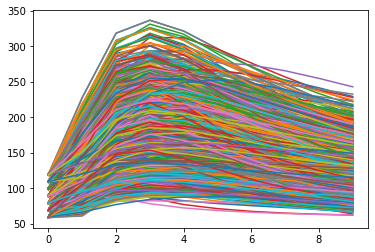

In [23]:
for i in range(0, len(y_train)):
  plt.plot(x_train[i,:])
plt.show()

In [24]:
#a = a.reshape(a.shape[0], 10, 1)
l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
len(np.unique(l))

3

In [25]:
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [26]:

a.shape

(1974, 10)

#Normalize

In [27]:
from tensorflow import keras

a = a.astype('float32')
#x_test = x_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
a /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape, 'l')

x_train shape: (1381, 10)
1381 train samples
593 test samples
(1381, 3) l


#LSTM-FCN

In [28]:
# One hot encoding

train_series = x_train 
test_series = x_test
train_series_labels = y_train
test_series_labels = y_test



#y_test = l
#y_train = l

In [29]:
y_test.shape


(593, 3)

In [30]:
print(train_series[:20])
print('-----------------')
print(train_series.shape)

[[ 70.0134   132.38647  191.76561  202.32079  190.72882  173.98427
  157.51317  142.82002  130.09349  119.31563 ]
 [ 99.326904 129.51721  181.99883  201.7759   197.77774  185.43687
  171.73457  158.98767  147.82812  138.25752 ]
 [ 69.569336  92.1271   116.01486  123.05091  120.85184  115.61738
  109.760765 104.122826  98.96046   94.35916 ]
 [100.001976 117.52131  152.96204  175.87845  183.27417  180.6161
  172.83044  163.04706  152.98657  143.57541 ]
 [ 88.90497  117.87369  160.67975  187.81172  197.38663  195.62965
  187.90884  177.60191  166.48975  155.53386 ]
 [ 70.00622  109.21156  155.48544  173.21524  167.28052  146.52997
  125.219086 108.212204  95.720795  87.05311 ]
 [ 99.19018  128.16779  160.30367  167.45198  160.13667  147.78728
  136.47449  127.04846  119.53378  113.68218 ]
 [ 60.007328 106.411354 160.65573  172.2776   160.73473  143.17863
  126.34722  112.04992  100.42959   91.05226 ]
 [ 60.00524  105.382324 182.92229  219.32336  218.1061   199.64793
  176.41911  153.79187

In [31]:
print(test_series[:20])
print('-----------------')
print(test_series.shape)

[[119.26748  138.32623  157.82811  167.19913  168.74016  166.152
  161.82034  156.93996  152.06346  147.45067 ]
 [ 99.9829   116.07832  135.64705  141.13774  137.99553  131.53537
  125.20488  119.73716  115.244286 111.65499 ]
 [ 79.99244   95.75329  126.02946  143.05759  145.92822  141.32849
  133.93158  126.034706 118.61333  112.052864]
 [120.01008  155.3531   201.84409  232.2537   247.65575  252.53508
  250.66649  244.72978  236.53156  227.25452 ]
 [ 70.00874  101.80347  129.60136  136.83795  134.17844  128.3779
  121.95176  115.76     110.06453  104.95374 ]
 [110.00613  150.63419  198.5876   210.59131  200.88255  183.76216
  167.80429  154.43994  143.81999  135.58795 ]
 [120.06633  183.80838  234.23218  250.77873  248.30338  237.27554
  223.3502   209.25397  196.17719  184.54994 ]
 [ 90.016426 181.05002  274.14633  292.07962  277.56662  255.30635
  232.73741  211.75114  192.97072  176.54694 ]
 [ 69.19018   98.13827  129.73604  135.84102  127.35365  114.61491
  103.16884   93.81297  

In [32]:
!pip install dtw
import warnings
warnings.filterwarnings("ignore")

import dtw
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=8054f83388b70a81fa7341e33e05404b21f285154293d799c67f512fb01e9724
  Stored in directory: /root/.cache/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw


In [33]:
print(train_series.shape)
print(train_series_labels.shape)
print(test_series.shape)

(1381, 10)
(1381, 3)
(593, 10)


# LSTM-FCN model

In [34]:
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.layers import Input, Dense, LSTM, concatenate, Activation
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [35]:
serie = 10
clases = 3

In [36]:
def generate_lstmfcn(MAX_SEQUENCE_LENGTH=serie, NB_CLASS=clases, NUM_CELLS=8):

    ip = Input(shape=(1, MAX_SEQUENCE_LENGTH)) # tensor

    x = LSTM(NUM_CELLS)(ip)
    x = Dropout(0.8)(x)

    y = Permute((2, 1))(ip) # permutes the first and second dimension of the input (connecting RNNs and convnets together)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y) # for temporal convolution
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)
    x = concatenate([x, y])

    out = Dense(NB_CLASS, activation='softmax')(x)

    model = Model(ip, out)
    model.summary()

    return model

In [37]:
model = generate_lstmfcn()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 10)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 10, 1)        0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 10, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 10, 128)     512         ['conv1d[0][0]']                 
 alization)                                                                                   

In [38]:
# Create the tensors
X_train = np.reshape(train_series, (train_series.shape[0], 1, train_series.shape[1]))
X_test = np.reshape(test_series, (test_series.shape[0], 1, test_series.shape[1]))

adam = Adam(lr=1e-3)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='auto', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, callbacks=[chk],
          validation_data=(X_test,y_test))

Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.7647

11/11 [==============================] - 19s 93ms/step - loss: 0.3762 - accuracy: 0.7647 - val_loss: 19.2407 - val_accuracy: 0.3086
Epoch 2/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.2095 - accuracy: 0.9085

11/11 [==============================] - 0s 13ms/step - loss: 0.2064 - accuracy: 0.9030 - val_loss: 14.5151 - val_accuracy: 0.3086
Epoch 3/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.1734 - accuracy: 0.9102

11/11 [==============================] - 0s 13ms/step - loss: 0.1783 - accuracy: 0.9044 - val_loss: 10.8709 - val_accuracy: 0.3086
Epoch 4/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.1361 - accuracy: 0.9307

11/11 [==============================] - 0s 12ms/step - loss: 0.1415 - accuracy: 0.9254 - val_loss: 8.3252 - val_accuracy: 0.3086
Epoch 5/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.1326 - accuracy: 0.9277

11/11 [==============================] - 0s 13ms/step - loss: 0.1313 - accuracy: 0.9290 - val_loss: 6.8225 - val_accuracy: 0.3086
Epoch 6/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.1434 - accuracy: 0.9199

11/11 [==============================] - 0s 12ms/step - loss: 0.1389 - accuracy: 0.9196 - val_loss: 5.2007 - val_accuracy: 0.3086
Epoch 7/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1645 - accuracy: 0.8873

11/11 [==============================] - 0s 14ms/step - loss: 0.1559 - accuracy: 0.8950 - val_loss: 4.4212 - val_accuracy: 0.3086
Epoch 8/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1464 - accuracy: 0.9029

11/11 [==============================] - 0s 13ms/step - loss: 0.1367 - accuracy: 0.9102 - val_loss: 3.7447 - val_accuracy: 0.3086
Epoch 9/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1383 - accuracy: 0.9172

11/11 [==============================] - 0s 20ms/step - loss: 0.1411 - accuracy: 0.9146 - val_loss: 2.9110 - val_accuracy: 0.3137
Epoch 10/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1162 - accuracy: 0.9289

11/11 [==============================] - 0s 21ms/step - loss: 0.1152 - accuracy: 0.9283 - val_loss: 2.6126 - val_accuracy: 0.3288
Epoch 11/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1145 - accuracy: 0.9281

11/11 [==============================] - 0s 23ms/step - loss: 0.1119 - accuracy: 0.9305 - val_loss: 2.0302 - val_accuracy: 0.3457
Epoch 12/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.1120 - accuracy: 0.9306

11/11 [==============================] - 0s 24ms/step - loss: 0.1108 - accuracy: 0.9305 - val_loss: 1.7427 - val_accuracy: 0.3761
Epoch 13/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.1312 - accuracy: 0.9306

11/11 [==============================] - 0s 23ms/step - loss: 0.1312 - accuracy: 0.9247 - val_loss: 1.6026 - val_accuracy: 0.4013
Epoch 14/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1039 - accuracy: 0.9344

11/11 [==============================] - 0s 18ms/step - loss: 0.1044 - accuracy: 0.9341 - val_loss: 1.4350 - val_accuracy: 0.4705
Epoch 15/1000
11/11 [==============================] - ETA: 0s - loss: 0.1120 - accuracy: 0.9254

11/11 [==============================] - 0s 22ms/step - loss: 0.1120 - accuracy: 0.9254 - val_loss: 1.1307 - val_accuracy: 0.5076
Epoch 16/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1392 - accuracy: 0.9031

11/11 [==============================] - 0s 23ms/step - loss: 0.1363 - accuracy: 0.9059 - val_loss: 1.0817 - val_accuracy: 0.5396
Epoch 17/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1159 - accuracy: 0.9273

11/11 [==============================] - 0s 22ms/step - loss: 0.1162 - accuracy: 0.9269 - val_loss: 0.8274 - val_accuracy: 0.6290
Epoch 18/1000
11/11 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9363

11/11 [==============================] - 0s 15ms/step - loss: 0.0992 - accuracy: 0.9363 - val_loss: 0.9264 - val_accuracy: 0.5919
Epoch 19/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1252 - accuracy: 0.9163

11/11 [==============================] - 0s 13ms/step - loss: 0.1331 - accuracy: 0.9146 - val_loss: 0.8437 - val_accuracy: 0.6425
Epoch 20/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.1128 - accuracy: 0.9219

11/11 [==============================] - 0s 14ms/step - loss: 0.1074 - accuracy: 0.9269 - val_loss: 0.7883 - val_accuracy: 0.6577
Epoch 21/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1343 - accuracy: 0.9129

11/11 [==============================] - 0s 13ms/step - loss: 0.1338 - accuracy: 0.9117 - val_loss: 0.6338 - val_accuracy: 0.7218
Epoch 22/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1100 - accuracy: 0.9230

11/11 [==============================] - 0s 15ms/step - loss: 0.1091 - accuracy: 0.9269 - val_loss: 0.6559 - val_accuracy: 0.6981
Epoch 23/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1092 - accuracy: 0.9275

11/11 [==============================] - 0s 13ms/step - loss: 0.1070 - accuracy: 0.9305 - val_loss: 0.5200 - val_accuracy: 0.7521
Epoch 24/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0883 - accuracy: 0.9440

11/11 [==============================] - 0s 14ms/step - loss: 0.1152 - accuracy: 0.9298 - val_loss: 0.4009 - val_accuracy: 0.7909
Epoch 25/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1127 - accuracy: 0.9241

11/11 [==============================] - 0s 14ms/step - loss: 0.1033 - accuracy: 0.9327 - val_loss: 0.4199 - val_accuracy: 0.8010
Epoch 26/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0800 - accuracy: 0.9498

11/11 [==============================] - 0s 13ms/step - loss: 0.0941 - accuracy: 0.9421 - val_loss: 0.3217 - val_accuracy: 0.8179
Epoch 27/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0909 - accuracy: 0.9386

11/11 [==============================] - 0s 14ms/step - loss: 0.0961 - accuracy: 0.9356 - val_loss: 0.3137 - val_accuracy: 0.8263
Epoch 28/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0965 - accuracy: 0.9308

11/11 [==============================] - 0s 14ms/step - loss: 0.0958 - accuracy: 0.9348 - val_loss: 0.2583 - val_accuracy: 0.8263
Epoch 29/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.1194 - accuracy: 0.9232

11/11 [==============================] - 0s 14ms/step - loss: 0.1070 - accuracy: 0.9327 - val_loss: 0.2602 - val_accuracy: 0.8432
Epoch 30/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1137 - accuracy: 0.9275

11/11 [==============================] - 0s 13ms/step - loss: 0.1183 - accuracy: 0.9232 - val_loss: 0.1524 - val_accuracy: 0.8988
Epoch 31/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1114 - accuracy: 0.9364

11/11 [==============================] - 0s 13ms/step - loss: 0.1093 - accuracy: 0.9341 - val_loss: 0.1525 - val_accuracy: 0.8938
Epoch 32/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0996 - accuracy: 0.9401

11/11 [==============================] - 0s 14ms/step - loss: 0.0940 - accuracy: 0.9421 - val_loss: 0.1434 - val_accuracy: 0.9039
Epoch 33/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1072 - accuracy: 0.9408

11/11 [==============================] - 0s 14ms/step - loss: 0.1063 - accuracy: 0.9377 - val_loss: 0.1202 - val_accuracy: 0.9359
Epoch 34/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0997 - accuracy: 0.9364

11/11 [==============================] - 0s 14ms/step - loss: 0.1021 - accuracy: 0.9356 - val_loss: 0.1592 - val_accuracy: 0.8887
Epoch 35/1000
11/11 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9500

11/11 [==============================] - 0s 15ms/step - loss: 0.0878 - accuracy: 0.9500 - val_loss: 0.1221 - val_accuracy: 0.9174
Epoch 36/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1257 - accuracy: 0.9118

11/11 [==============================] - 0s 13ms/step - loss: 0.1201 - accuracy: 0.9196 - val_loss: 0.2219 - val_accuracy: 0.8685
Epoch 37/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0914 - accuracy: 0.9431

11/11 [==============================] - 0s 14ms/step - loss: 0.0862 - accuracy: 0.9457 - val_loss: 0.1410 - val_accuracy: 0.9056
Epoch 38/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0840 - accuracy: 0.9531

11/11 [==============================] - 0s 15ms/step - loss: 0.0857 - accuracy: 0.9529 - val_loss: 0.1468 - val_accuracy: 0.9039
Epoch 39/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1039 - accuracy: 0.9353

11/11 [==============================] - 0s 13ms/step - loss: 0.0892 - accuracy: 0.9471 - val_loss: 0.1455 - val_accuracy: 0.9089
Epoch 40/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1007 - accuracy: 0.9408

11/11 [==============================] - 0s 13ms/step - loss: 0.0972 - accuracy: 0.9377 - val_loss: 0.1282 - val_accuracy: 0.9123
Epoch 41/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0674 - accuracy: 0.9598

11/11 [==============================] - 0s 18ms/step - loss: 0.0815 - accuracy: 0.9493 - val_loss: 0.1339 - val_accuracy: 0.9089
Epoch 42/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0803 - accuracy: 0.9475

11/11 [==============================] - 0s 14ms/step - loss: 0.0921 - accuracy: 0.9370 - val_loss: 0.1207 - val_accuracy: 0.9342
Epoch 43/1000
11/11 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9522

11/11 [==============================] - 0s 16ms/step - loss: 0.0844 - accuracy: 0.9522 - val_loss: 0.1626 - val_accuracy: 0.8988
Epoch 44/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0992 - accuracy: 0.9375

11/11 [==============================] - 0s 13ms/step - loss: 0.0974 - accuracy: 0.9363 - val_loss: 0.1217 - val_accuracy: 0.9275
Epoch 45/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0797 - accuracy: 0.9509

11/11 [==============================] - 0s 13ms/step - loss: 0.0795 - accuracy: 0.9493 - val_loss: 0.1127 - val_accuracy: 0.9393
Epoch 46/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0892 - accuracy: 0.9431

11/11 [==============================] - 0s 14ms/step - loss: 0.0915 - accuracy: 0.9442 - val_loss: 0.1108 - val_accuracy: 0.9359
Epoch 47/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0874 - accuracy: 0.9487

11/11 [==============================] - 0s 13ms/step - loss: 0.0868 - accuracy: 0.9515 - val_loss: 0.1060 - val_accuracy: 0.9376
Epoch 48/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.1112 - accuracy: 0.9245

11/11 [==============================] - 0s 14ms/step - loss: 0.1026 - accuracy: 0.9334 - val_loss: 0.1310 - val_accuracy: 0.9157
Epoch 49/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0755 - accuracy: 0.9554

11/11 [==============================] - 0s 13ms/step - loss: 0.0867 - accuracy: 0.9486 - val_loss: 0.0934 - val_accuracy: 0.9545
Epoch 50/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0991 - accuracy: 0.9330

11/11 [==============================] - 0s 14ms/step - loss: 0.1090 - accuracy: 0.9276 - val_loss: 0.1148 - val_accuracy: 0.9258
Epoch 51/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0859 - accuracy: 0.9475

11/11 [==============================] - 0s 13ms/step - loss: 0.0842 - accuracy: 0.9435 - val_loss: 0.0932 - val_accuracy: 0.9545
Epoch 52/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.1155 - accuracy: 0.9206

11/11 [==============================] - 0s 14ms/step - loss: 0.0992 - accuracy: 0.9312 - val_loss: 0.1121 - val_accuracy: 0.9275
Epoch 53/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0795 - accuracy: 0.9487

11/11 [==============================] - 0s 14ms/step - loss: 0.0975 - accuracy: 0.9428 - val_loss: 0.1152 - val_accuracy: 0.9359
Epoch 54/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0976 - accuracy: 0.9386

11/11 [==============================] - 0s 14ms/step - loss: 0.0921 - accuracy: 0.9428 - val_loss: 0.1127 - val_accuracy: 0.9292
Epoch 55/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0918 - accuracy: 0.9330

11/11 [==============================] - 0s 13ms/step - loss: 0.0899 - accuracy: 0.9356 - val_loss: 0.1086 - val_accuracy: 0.9376
Epoch 56/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0777 - accuracy: 0.9520

11/11 [==============================] - 0s 14ms/step - loss: 0.0936 - accuracy: 0.9406 - val_loss: 0.1142 - val_accuracy: 0.9359
Epoch 57/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1016 - accuracy: 0.9386

11/11 [==============================] - 0s 14ms/step - loss: 0.1013 - accuracy: 0.9392 - val_loss: 0.1241 - val_accuracy: 0.9207
Epoch 58/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0712 - accuracy: 0.9643

11/11 [==============================] - 0s 13ms/step - loss: 0.0811 - accuracy: 0.9529 - val_loss: 0.0947 - val_accuracy: 0.9511
Epoch 59/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0773 - accuracy: 0.9509

11/11 [==============================] - 0s 14ms/step - loss: 0.0846 - accuracy: 0.9450 - val_loss: 0.0990 - val_accuracy: 0.9494
Epoch 60/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1076 - accuracy: 0.9353

11/11 [==============================] - 0s 13ms/step - loss: 0.0981 - accuracy: 0.9385 - val_loss: 0.1262 - val_accuracy: 0.9207
Epoch 61/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0862 - accuracy: 0.9453

11/11 [==============================] - 0s 15ms/step - loss: 0.0778 - accuracy: 0.9537 - val_loss: 0.1045 - val_accuracy: 0.9427
Epoch 62/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0877 - accuracy: 0.9408

11/11 [==============================] - 0s 14ms/step - loss: 0.0892 - accuracy: 0.9413 - val_loss: 0.0820 - val_accuracy: 0.9562
Epoch 63/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0885 - accuracy: 0.9453

11/11 [==============================] - 0s 14ms/step - loss: 0.0957 - accuracy: 0.9356 - val_loss: 0.0872 - val_accuracy: 0.9511
Epoch 64/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0786 - accuracy: 0.9509

11/11 [==============================] - 0s 14ms/step - loss: 0.0759 - accuracy: 0.9522 - val_loss: 0.0970 - val_accuracy: 0.9444
Epoch 65/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0889 - accuracy: 0.9464

11/11 [==============================] - 0s 14ms/step - loss: 0.0952 - accuracy: 0.9399 - val_loss: 0.1366 - val_accuracy: 0.9073
Epoch 66/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0781 - accuracy: 0.9520

11/11 [==============================] - 0s 14ms/step - loss: 0.0730 - accuracy: 0.9573 - val_loss: 0.1124 - val_accuracy: 0.9325
Epoch 67/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0869 - accuracy: 0.9464

11/11 [==============================] - 0s 14ms/step - loss: 0.0857 - accuracy: 0.9457 - val_loss: 0.0976 - val_accuracy: 0.9444
Epoch 68/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0973 - accuracy: 0.9364

11/11 [==============================] - 0s 14ms/step - loss: 0.0889 - accuracy: 0.9421 - val_loss: 0.0942 - val_accuracy: 0.9477
Epoch 69/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1019 - accuracy: 0.9330

11/11 [==============================] - 0s 14ms/step - loss: 0.1171 - accuracy: 0.9218 - val_loss: 0.0833 - val_accuracy: 0.9578
Epoch 70/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0911 - accuracy: 0.9386

11/11 [==============================] - 0s 15ms/step - loss: 0.0907 - accuracy: 0.9413 - val_loss: 0.1929 - val_accuracy: 0.8971
Epoch 71/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0781 - accuracy: 0.9505

11/11 [==============================] - 0s 15ms/step - loss: 0.0842 - accuracy: 0.9450 - val_loss: 0.1137 - val_accuracy: 0.9275
Epoch 72/1000
11/11 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9493

11/11 [==============================] - 0s 16ms/step - loss: 0.0836 - accuracy: 0.9493 - val_loss: 0.0983 - val_accuracy: 0.9444
Epoch 73/1000
11/11 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.9334

11/11 [==============================] - 0s 16ms/step - loss: 0.1108 - accuracy: 0.9334 - val_loss: 0.0807 - val_accuracy: 0.9595
Epoch 74/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0850 - accuracy: 0.9408

11/11 [==============================] - 0s 13ms/step - loss: 0.0853 - accuracy: 0.9399 - val_loss: 0.0911 - val_accuracy: 0.9528
Epoch 75/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0899 - accuracy: 0.9364

11/11 [==============================] - 0s 13ms/step - loss: 0.0854 - accuracy: 0.9435 - val_loss: 0.0772 - val_accuracy: 0.9578
Epoch 76/1000
11/11 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9399

11/11 [==============================] - 0s 16ms/step - loss: 0.0944 - accuracy: 0.9399 - val_loss: 0.0978 - val_accuracy: 0.9376
Epoch 77/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0723 - accuracy: 0.9576

11/11 [==============================] - 0s 14ms/step - loss: 0.0737 - accuracy: 0.9558 - val_loss: 0.0757 - val_accuracy: 0.9562
Epoch 78/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0767 - accuracy: 0.9475

11/11 [==============================] - 0s 14ms/step - loss: 0.0846 - accuracy: 0.9471 - val_loss: 0.0721 - val_accuracy: 0.9629
Epoch 79/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0664 - accuracy: 0.9661

11/11 [==============================] - 0s 15ms/step - loss: 0.0749 - accuracy: 0.9587 - val_loss: 0.0717 - val_accuracy: 0.9663
Epoch 80/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1114 - accuracy: 0.9275

11/11 [==============================] - 0s 19ms/step - loss: 0.1014 - accuracy: 0.9341 - val_loss: 0.0848 - val_accuracy: 0.9562
Epoch 81/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0966 - accuracy: 0.9401

11/11 [==============================] - 0s 20ms/step - loss: 0.1011 - accuracy: 0.9356 - val_loss: 0.1220 - val_accuracy: 0.9241
Epoch 82/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1032 - accuracy: 0.9289

11/11 [==============================] - 0s 23ms/step - loss: 0.1022 - accuracy: 0.9290 - val_loss: 0.0928 - val_accuracy: 0.9511
Epoch 83/1000
11/11 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9464

11/11 [==============================] - 0s 22ms/step - loss: 0.0849 - accuracy: 0.9464 - val_loss: 0.1045 - val_accuracy: 0.9427
Epoch 84/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0979 - accuracy: 0.9366

11/11 [==============================] - 0s 20ms/step - loss: 0.1103 - accuracy: 0.9305 - val_loss: 0.1055 - val_accuracy: 0.9309
Epoch 85/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0888 - accuracy: 0.9414

11/11 [==============================] - 0s 23ms/step - loss: 0.0915 - accuracy: 0.9406 - val_loss: 0.1042 - val_accuracy: 0.9309
Epoch 86/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0742 - accuracy: 0.9668

11/11 [==============================] - 0s 21ms/step - loss: 0.0787 - accuracy: 0.9602 - val_loss: 0.0977 - val_accuracy: 0.9410
Epoch 87/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0758 - accuracy: 0.9500

11/11 [==============================] - 0s 18ms/step - loss: 0.0764 - accuracy: 0.9500 - val_loss: 0.1221 - val_accuracy: 0.9191
Epoch 88/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0677 - accuracy: 0.9648

11/11 [==============================] - 0s 24ms/step - loss: 0.0700 - accuracy: 0.9616 - val_loss: 0.0925 - val_accuracy: 0.9444
Epoch 89/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0914 - accuracy: 0.9418

11/11 [==============================] - 0s 23ms/step - loss: 0.0833 - accuracy: 0.9479 - val_loss: 0.0903 - val_accuracy: 0.9444
Epoch 90/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0860 - accuracy: 0.9505

11/11 [==============================] - 0s 14ms/step - loss: 0.0930 - accuracy: 0.9435 - val_loss: 0.0752 - val_accuracy: 0.9612
Epoch 91/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0692 - accuracy: 0.9587

11/11 [==============================] - 0s 14ms/step - loss: 0.0726 - accuracy: 0.9573 - val_loss: 0.0750 - val_accuracy: 0.9612
Epoch 92/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0941 - accuracy: 0.9414

11/11 [==============================] - 0s 14ms/step - loss: 0.0819 - accuracy: 0.9500 - val_loss: 0.0797 - val_accuracy: 0.9595
Epoch 93/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0705 - accuracy: 0.9643

11/11 [==============================] - 0s 13ms/step - loss: 0.0700 - accuracy: 0.9623 - val_loss: 0.0777 - val_accuracy: 0.9578
Epoch 94/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.1009 - accuracy: 0.9310

11/11 [==============================] - 0s 15ms/step - loss: 0.0929 - accuracy: 0.9377 - val_loss: 0.0881 - val_accuracy: 0.9477
Epoch 95/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0691 - accuracy: 0.9576

11/11 [==============================] - 0s 14ms/step - loss: 0.0731 - accuracy: 0.9544 - val_loss: 0.0801 - val_accuracy: 0.9612
Epoch 96/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0709 - accuracy: 0.9542

11/11 [==============================] - 0s 14ms/step - loss: 0.0732 - accuracy: 0.9551 - val_loss: 0.0944 - val_accuracy: 0.9427
Epoch 97/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0795 - accuracy: 0.9464

11/11 [==============================] - 0s 14ms/step - loss: 0.0772 - accuracy: 0.9486 - val_loss: 0.0752 - val_accuracy: 0.9578
Epoch 98/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0989 - accuracy: 0.9401

11/11 [==============================] - 0s 15ms/step - loss: 0.0889 - accuracy: 0.9421 - val_loss: 0.0749 - val_accuracy: 0.9595
Epoch 99/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1123 - accuracy: 0.9308

11/11 [==============================] - 0s 14ms/step - loss: 0.1049 - accuracy: 0.9370 - val_loss: 0.1022 - val_accuracy: 0.9325
Epoch 100/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0938 - accuracy: 0.9397

11/11 [==============================] - 0s 14ms/step - loss: 0.1087 - accuracy: 0.9254 - val_loss: 0.1628 - val_accuracy: 0.8887
Epoch 101/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0774 - accuracy: 0.9596

11/11 [==============================] - 0s 15ms/step - loss: 0.0873 - accuracy: 0.9464 - val_loss: 0.1037 - val_accuracy: 0.9342
Epoch 102/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0637 - accuracy: 0.9632

11/11 [==============================] - 0s 14ms/step - loss: 0.0734 - accuracy: 0.9587 - val_loss: 0.0897 - val_accuracy: 0.9477
Epoch 103/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0841 - accuracy: 0.9565

11/11 [==============================] - 0s 14ms/step - loss: 0.0880 - accuracy: 0.9486 - val_loss: 0.0999 - val_accuracy: 0.9410
Epoch 104/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0657 - accuracy: 0.9632

11/11 [==============================] - 0s 14ms/step - loss: 0.0817 - accuracy: 0.9500 - val_loss: 0.0718 - val_accuracy: 0.9612
Epoch 105/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0787 - accuracy: 0.9531

11/11 [==============================] - 0s 14ms/step - loss: 0.0835 - accuracy: 0.9500 - val_loss: 0.0730 - val_accuracy: 0.9578
Epoch 106/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0692 - accuracy: 0.9565

11/11 [==============================] - 0s 15ms/step - loss: 0.0685 - accuracy: 0.9566 - val_loss: 0.0725 - val_accuracy: 0.9646
Epoch 107/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0856 - accuracy: 0.9487

11/11 [==============================] - 0s 14ms/step - loss: 0.0842 - accuracy: 0.9471 - val_loss: 0.0760 - val_accuracy: 0.9629
Epoch 108/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0725 - accuracy: 0.9531

11/11 [==============================] - 0s 15ms/step - loss: 0.0846 - accuracy: 0.9493 - val_loss: 0.0745 - val_accuracy: 0.9612
Epoch 109/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1163 - accuracy: 0.9275

11/11 [==============================] - 0s 14ms/step - loss: 0.1034 - accuracy: 0.9356 - val_loss: 0.0831 - val_accuracy: 0.9562
Epoch 110/1000
11/11 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9623

11/11 [==============================] - 0s 16ms/step - loss: 0.0700 - accuracy: 0.9623 - val_loss: 0.0945 - val_accuracy: 0.9460
Epoch 111/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0699 - accuracy: 0.9635

11/11 [==============================] - 0s 15ms/step - loss: 0.0675 - accuracy: 0.9638 - val_loss: 0.0814 - val_accuracy: 0.9578
Epoch 112/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0632 - accuracy: 0.9643

11/11 [==============================] - 0s 18ms/step - loss: 0.0815 - accuracy: 0.9500 - val_loss: 0.0822 - val_accuracy: 0.9578
Epoch 113/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0648 - accuracy: 0.9632

11/11 [==============================] - 0s 18ms/step - loss: 0.0655 - accuracy: 0.9631 - val_loss: 0.0801 - val_accuracy: 0.9562
Epoch 114/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0612 - accuracy: 0.9654

11/11 [==============================] - 0s 18ms/step - loss: 0.0608 - accuracy: 0.9652 - val_loss: 0.0862 - val_accuracy: 0.9444
Epoch 115/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0477 - accuracy: 0.9766

11/11 [==============================] - 0s 15ms/step - loss: 0.0568 - accuracy: 0.9689 - val_loss: 0.0702 - val_accuracy: 0.9646
Epoch 116/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0777 - accuracy: 0.9475

11/11 [==============================] - 0s 14ms/step - loss: 0.0746 - accuracy: 0.9500 - val_loss: 0.0978 - val_accuracy: 0.9393
Epoch 117/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0671 - accuracy: 0.9596

11/11 [==============================] - 0s 15ms/step - loss: 0.0678 - accuracy: 0.9587 - val_loss: 0.0881 - val_accuracy: 0.9477
Epoch 118/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0628 - accuracy: 0.9661

11/11 [==============================] - 0s 14ms/step - loss: 0.0721 - accuracy: 0.9609 - val_loss: 0.0730 - val_accuracy: 0.9595
Epoch 119/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0699 - accuracy: 0.9576

11/11 [==============================] - 0s 14ms/step - loss: 0.0773 - accuracy: 0.9515 - val_loss: 0.0786 - val_accuracy: 0.9528
Epoch 120/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0979 - accuracy: 0.9408

11/11 [==============================] - 0s 14ms/step - loss: 0.1052 - accuracy: 0.9319 - val_loss: 0.0906 - val_accuracy: 0.9511
Epoch 121/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0749 - accuracy: 0.9587

11/11 [==============================] - 0s 14ms/step - loss: 0.0900 - accuracy: 0.9479 - val_loss: 0.1227 - val_accuracy: 0.9275
Epoch 122/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0768 - accuracy: 0.9554

11/11 [==============================] - 0s 14ms/step - loss: 0.0973 - accuracy: 0.9377 - val_loss: 0.0857 - val_accuracy: 0.9511
Epoch 123/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0662 - accuracy: 0.9621

11/11 [==============================] - 0s 14ms/step - loss: 0.0993 - accuracy: 0.9413 - val_loss: 0.1156 - val_accuracy: 0.9393
Epoch 124/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0626 - accuracy: 0.9654

11/11 [==============================] - 0s 15ms/step - loss: 0.0663 - accuracy: 0.9602 - val_loss: 0.0815 - val_accuracy: 0.9511
Epoch 125/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0760 - accuracy: 0.9464

11/11 [==============================] - 0s 14ms/step - loss: 0.0743 - accuracy: 0.9493 - val_loss: 0.0955 - val_accuracy: 0.9444
Epoch 126/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0735 - accuracy: 0.9520

11/11 [==============================] - 0s 14ms/step - loss: 0.0819 - accuracy: 0.9457 - val_loss: 0.0785 - val_accuracy: 0.9528
Epoch 127/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0692 - accuracy: 0.9565

11/11 [==============================] - 0s 14ms/step - loss: 0.0658 - accuracy: 0.9602 - val_loss: 0.0862 - val_accuracy: 0.9528
Epoch 128/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0650 - accuracy: 0.9587

11/11 [==============================] - 0s 14ms/step - loss: 0.0823 - accuracy: 0.9479 - val_loss: 0.0739 - val_accuracy: 0.9494
Epoch 129/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0809 - accuracy: 0.9420

11/11 [==============================] - 0s 14ms/step - loss: 0.0909 - accuracy: 0.9356 - val_loss: 0.0772 - val_accuracy: 0.9595
Epoch 130/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0654 - accuracy: 0.9609

11/11 [==============================] - 0s 16ms/step - loss: 0.0802 - accuracy: 0.9515 - val_loss: 0.0857 - val_accuracy: 0.9460
Epoch 131/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0765 - accuracy: 0.9475

11/11 [==============================] - 0s 15ms/step - loss: 0.0885 - accuracy: 0.9442 - val_loss: 0.0731 - val_accuracy: 0.9545
Epoch 132/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0810 - accuracy: 0.9544

11/11 [==============================] - 0s 14ms/step - loss: 0.0724 - accuracy: 0.9566 - val_loss: 0.0853 - val_accuracy: 0.9528
Epoch 133/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0674 - accuracy: 0.9621

11/11 [==============================] - 0s 15ms/step - loss: 0.0696 - accuracy: 0.9602 - val_loss: 0.0906 - val_accuracy: 0.9545
Epoch 134/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0983 - accuracy: 0.9330

11/11 [==============================] - 0s 15ms/step - loss: 0.0841 - accuracy: 0.9442 - val_loss: 0.0827 - val_accuracy: 0.9511
Epoch 135/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0610 - accuracy: 0.9632

11/11 [==============================] - 0s 14ms/step - loss: 0.0605 - accuracy: 0.9652 - val_loss: 0.0770 - val_accuracy: 0.9562
Epoch 136/1000
11/11 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9580

11/11 [==============================] - 0s 15ms/step - loss: 0.0656 - accuracy: 0.9580 - val_loss: 0.0708 - val_accuracy: 0.9629
Epoch 137/1000
11/11 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9674

11/11 [==============================] - 0s 16ms/step - loss: 0.0556 - accuracy: 0.9674 - val_loss: 0.0735 - val_accuracy: 0.9545
Epoch 138/1000
11/11 [==============================] - ETA: 0s - loss: 0.0682 - accuracy: 0.9566

11/11 [==============================] - 0s 16ms/step - loss: 0.0682 - accuracy: 0.9566 - val_loss: 0.0692 - val_accuracy: 0.9612
Epoch 139/1000
11/11 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9573

11/11 [==============================] - 0s 16ms/step - loss: 0.0648 - accuracy: 0.9573 - val_loss: 0.0792 - val_accuracy: 0.9511
Epoch 140/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0448 - accuracy: 0.9792

11/11 [==============================] - 0s 14ms/step - loss: 0.0620 - accuracy: 0.9638 - val_loss: 0.0634 - val_accuracy: 0.9562
Epoch 141/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0956 - accuracy: 0.9342

11/11 [==============================] - 0s 14ms/step - loss: 0.0826 - accuracy: 0.9442 - val_loss: 0.0759 - val_accuracy: 0.9545
Epoch 142/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0978 - accuracy: 0.9364

11/11 [==============================] - 0s 15ms/step - loss: 0.1020 - accuracy: 0.9327 - val_loss: 0.0769 - val_accuracy: 0.9595
Epoch 143/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0554 - accuracy: 0.9688

11/11 [==============================] - 0s 15ms/step - loss: 0.0689 - accuracy: 0.9602 - val_loss: 0.1669 - val_accuracy: 0.9073
Epoch 144/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0518 - accuracy: 0.9710

11/11 [==============================] - 0s 14ms/step - loss: 0.0537 - accuracy: 0.9703 - val_loss: 0.0835 - val_accuracy: 0.9460
Epoch 145/1000
11/11 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9486

11/11 [==============================] - 0s 16ms/step - loss: 0.0859 - accuracy: 0.9486 - val_loss: 0.0949 - val_accuracy: 0.9427
Epoch 146/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0699 - accuracy: 0.9554

11/11 [==============================] - 0s 15ms/step - loss: 0.0686 - accuracy: 0.9566 - val_loss: 0.1028 - val_accuracy: 0.9444
Epoch 147/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0604 - accuracy: 0.9632

11/11 [==============================] - 0s 14ms/step - loss: 0.0629 - accuracy: 0.9623 - val_loss: 0.0768 - val_accuracy: 0.9562
Epoch 148/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0959 - accuracy: 0.9420

11/11 [==============================] - 0s 15ms/step - loss: 0.0822 - accuracy: 0.9500 - val_loss: 0.0850 - val_accuracy: 0.9494
Epoch 149/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0557 - accuracy: 0.9672

11/11 [==============================] - 0s 20ms/step - loss: 0.0598 - accuracy: 0.9638 - val_loss: 0.0674 - val_accuracy: 0.9646
Epoch 150/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0609 - accuracy: 0.9644

11/11 [==============================] - 0s 24ms/step - loss: 0.0577 - accuracy: 0.9660 - val_loss: 0.0676 - val_accuracy: 0.9595
Epoch 151/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0571 - accuracy: 0.9601

11/11 [==============================] - 0s 24ms/step - loss: 0.0563 - accuracy: 0.9587 - val_loss: 0.0730 - val_accuracy: 0.9578
Epoch 152/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0523 - accuracy: 0.9661

11/11 [==============================] - 0s 24ms/step - loss: 0.0646 - accuracy: 0.9594 - val_loss: 0.0667 - val_accuracy: 0.9629
Epoch 153/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0579 - accuracy: 0.9680

11/11 [==============================] - 0s 18ms/step - loss: 0.0578 - accuracy: 0.9667 - val_loss: 0.0653 - val_accuracy: 0.9612
Epoch 154/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0517 - accuracy: 0.9672

11/11 [==============================] - 0s 19ms/step - loss: 0.0518 - accuracy: 0.9674 - val_loss: 0.0617 - val_accuracy: 0.9629
Epoch 155/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0488 - accuracy: 0.9805

11/11 [==============================] - 0s 23ms/step - loss: 0.0576 - accuracy: 0.9747 - val_loss: 0.0628 - val_accuracy: 0.9629
Epoch 156/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0664 - accuracy: 0.9547

11/11 [==============================] - 0s 23ms/step - loss: 0.0679 - accuracy: 0.9537 - val_loss: 0.1196 - val_accuracy: 0.9224
Epoch 157/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0929 - accuracy: 0.9391

11/11 [==============================] - 0s 23ms/step - loss: 0.0901 - accuracy: 0.9413 - val_loss: 0.0721 - val_accuracy: 0.9595
Epoch 158/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0788 - accuracy: 0.9505

11/11 [==============================] - 0s 24ms/step - loss: 0.0789 - accuracy: 0.9515 - val_loss: 0.0982 - val_accuracy: 0.9393
Epoch 159/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0759 - accuracy: 0.9475

11/11 [==============================] - 0s 14ms/step - loss: 0.0749 - accuracy: 0.9479 - val_loss: 0.1190 - val_accuracy: 0.9241
Epoch 160/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0823 - accuracy: 0.9397

11/11 [==============================] - 0s 14ms/step - loss: 0.0821 - accuracy: 0.9450 - val_loss: 0.0756 - val_accuracy: 0.9511
Epoch 161/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0575 - accuracy: 0.9665

11/11 [==============================] - 0s 14ms/step - loss: 0.0627 - accuracy: 0.9638 - val_loss: 0.0662 - val_accuracy: 0.9646
Epoch 162/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0766 - accuracy: 0.9520

11/11 [==============================] - 0s 15ms/step - loss: 0.0778 - accuracy: 0.9500 - val_loss: 0.0661 - val_accuracy: 0.9595
Epoch 163/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0733 - accuracy: 0.9542

11/11 [==============================] - 0s 13ms/step - loss: 0.0714 - accuracy: 0.9544 - val_loss: 0.0764 - val_accuracy: 0.9562
Epoch 164/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0579 - accuracy: 0.9727

11/11 [==============================] - 0s 14ms/step - loss: 0.0575 - accuracy: 0.9696 - val_loss: 0.0692 - val_accuracy: 0.9612
Epoch 165/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0808 - accuracy: 0.9498

11/11 [==============================] - 0s 14ms/step - loss: 0.0837 - accuracy: 0.9500 - val_loss: 0.0867 - val_accuracy: 0.9460
Epoch 166/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0690 - accuracy: 0.9565

11/11 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.9616 - val_loss: 0.0797 - val_accuracy: 0.9545
Epoch 167/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0581 - accuracy: 0.9654

11/11 [==============================] - 0s 14ms/step - loss: 0.0528 - accuracy: 0.9696 - val_loss: 0.0707 - val_accuracy: 0.9595
Epoch 168/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0482 - accuracy: 0.9661

11/11 [==============================] - 0s 15ms/step - loss: 0.0645 - accuracy: 0.9544 - val_loss: 0.0644 - val_accuracy: 0.9612
Epoch 169/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9431

11/11 [==============================] - 0s 14ms/step - loss: 0.0698 - accuracy: 0.9529 - val_loss: 0.1025 - val_accuracy: 0.9393
Epoch 170/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0640 - accuracy: 0.9632

11/11 [==============================] - 0s 15ms/step - loss: 0.0682 - accuracy: 0.9609 - val_loss: 0.0767 - val_accuracy: 0.9612
Epoch 171/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0745 - accuracy: 0.9498

11/11 [==============================] - 0s 13ms/step - loss: 0.1017 - accuracy: 0.9363 - val_loss: 0.0667 - val_accuracy: 0.9612
Epoch 172/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0799 - accuracy: 0.9420

11/11 [==============================] - 0s 14ms/step - loss: 0.0849 - accuracy: 0.9399 - val_loss: 0.0917 - val_accuracy: 0.9477
Epoch 173/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0703 - accuracy: 0.9587

11/11 [==============================] - 0s 14ms/step - loss: 0.0743 - accuracy: 0.9544 - val_loss: 0.0728 - val_accuracy: 0.9578
Epoch 174/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0735 - accuracy: 0.9598

11/11 [==============================] - 0s 15ms/step - loss: 0.0840 - accuracy: 0.9464 - val_loss: 0.0718 - val_accuracy: 0.9562
Epoch 175/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0751 - accuracy: 0.9542

11/11 [==============================] - 0s 15ms/step - loss: 0.0753 - accuracy: 0.9551 - val_loss: 0.0715 - val_accuracy: 0.9545
Epoch 176/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0645 - accuracy: 0.9520

11/11 [==============================] - 0s 15ms/step - loss: 0.0801 - accuracy: 0.9450 - val_loss: 0.0825 - val_accuracy: 0.9562
Epoch 177/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0782 - accuracy: 0.9498

11/11 [==============================] - 0s 18ms/step - loss: 0.0714 - accuracy: 0.9558 - val_loss: 0.0875 - val_accuracy: 0.9460
Epoch 178/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0669 - accuracy: 0.9576

11/11 [==============================] - 0s 14ms/step - loss: 0.0713 - accuracy: 0.9515 - val_loss: 0.0656 - val_accuracy: 0.9562
Epoch 179/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0757 - accuracy: 0.9520

11/11 [==============================] - 0s 13ms/step - loss: 0.0760 - accuracy: 0.9500 - val_loss: 0.0643 - val_accuracy: 0.9646
Epoch 180/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0654 - accuracy: 0.9621

11/11 [==============================] - 0s 15ms/step - loss: 0.0651 - accuracy: 0.9587 - val_loss: 0.0611 - val_accuracy: 0.9646
Epoch 181/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0848 - accuracy: 0.9453

11/11 [==============================] - 0s 14ms/step - loss: 0.0711 - accuracy: 0.9573 - val_loss: 0.0644 - val_accuracy: 0.9646
Epoch 182/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0458 - accuracy: 0.9753

11/11 [==============================] - 0s 14ms/step - loss: 0.0661 - accuracy: 0.9573 - val_loss: 0.0648 - val_accuracy: 0.9629
Epoch 183/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0679 - accuracy: 0.9576

11/11 [==============================] - 0s 14ms/step - loss: 0.0733 - accuracy: 0.9558 - val_loss: 0.0681 - val_accuracy: 0.9629
Epoch 184/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0532 - accuracy: 0.9635

11/11 [==============================] - 0s 15ms/step - loss: 0.0673 - accuracy: 0.9616 - val_loss: 0.0730 - val_accuracy: 0.9578
Epoch 185/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0649 - accuracy: 0.9598

11/11 [==============================] - 0s 14ms/step - loss: 0.0622 - accuracy: 0.9616 - val_loss: 0.0641 - val_accuracy: 0.9612
Epoch 186/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0592 - accuracy: 0.9554

11/11 [==============================] - 0s 14ms/step - loss: 0.0578 - accuracy: 0.9566 - val_loss: 0.0647 - val_accuracy: 0.9595
Epoch 187/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0674 - accuracy: 0.9654

11/11 [==============================] - 0s 14ms/step - loss: 0.0695 - accuracy: 0.9623 - val_loss: 0.0622 - val_accuracy: 0.9629
Epoch 188/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0627 - accuracy: 0.9622

11/11 [==============================] - 0s 15ms/step - loss: 0.0813 - accuracy: 0.9500 - val_loss: 0.0705 - val_accuracy: 0.9578
Epoch 189/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0563 - accuracy: 0.9665

11/11 [==============================] - 0s 15ms/step - loss: 0.0600 - accuracy: 0.9638 - val_loss: 0.0797 - val_accuracy: 0.9595
Epoch 190/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0883 - accuracy: 0.9498

11/11 [==============================] - 0s 13ms/step - loss: 0.0880 - accuracy: 0.9493 - val_loss: 0.0708 - val_accuracy: 0.9545
Epoch 191/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0547 - accuracy: 0.9665

11/11 [==============================] - 0s 15ms/step - loss: 0.0547 - accuracy: 0.9681 - val_loss: 0.0646 - val_accuracy: 0.9646
Epoch 192/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0595 - accuracy: 0.9643

11/11 [==============================] - 0s 14ms/step - loss: 0.0592 - accuracy: 0.9638 - val_loss: 0.0736 - val_accuracy: 0.9545
Epoch 193/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0474 - accuracy: 0.9740

11/11 [==============================] - 0s 14ms/step - loss: 0.0482 - accuracy: 0.9739 - val_loss: 0.0619 - val_accuracy: 0.9646
Epoch 194/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0704 - accuracy: 0.9632

11/11 [==============================] - 0s 15ms/step - loss: 0.0608 - accuracy: 0.9674 - val_loss: 0.0631 - val_accuracy: 0.9612
Epoch 195/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0504 - accuracy: 0.9710

11/11 [==============================] - 0s 14ms/step - loss: 0.0449 - accuracy: 0.9754 - val_loss: 0.0601 - val_accuracy: 0.9646
Epoch 196/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0600 - accuracy: 0.9565

11/11 [==============================] - 0s 14ms/step - loss: 0.0539 - accuracy: 0.9594 - val_loss: 0.0741 - val_accuracy: 0.9545
Epoch 197/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0612 - accuracy: 0.9596

11/11 [==============================] - 0s 14ms/step - loss: 0.0628 - accuracy: 0.9631 - val_loss: 0.0969 - val_accuracy: 0.9309
Epoch 198/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0771 - accuracy: 0.9661

11/11 [==============================] - 0s 15ms/step - loss: 0.0693 - accuracy: 0.9703 - val_loss: 0.0642 - val_accuracy: 0.9595
Epoch 199/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0421 - accuracy: 0.9753

11/11 [==============================] - 0s 15ms/step - loss: 0.0496 - accuracy: 0.9674 - val_loss: 0.0636 - val_accuracy: 0.9629
Epoch 200/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0531 - accuracy: 0.9721

11/11 [==============================] - 0s 14ms/step - loss: 0.0598 - accuracy: 0.9660 - val_loss: 0.0791 - val_accuracy: 0.9511
Epoch 201/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0618 - accuracy: 0.9654

11/11 [==============================] - 0s 14ms/step - loss: 0.0572 - accuracy: 0.9674 - val_loss: 0.0612 - val_accuracy: 0.9646
Epoch 202/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0678 - accuracy: 0.9554

11/11 [==============================] - 0s 13ms/step - loss: 0.0710 - accuracy: 0.9544 - val_loss: 0.0678 - val_accuracy: 0.9578
Epoch 203/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0540 - accuracy: 0.9676

11/11 [==============================] - 0s 14ms/step - loss: 0.0584 - accuracy: 0.9652 - val_loss: 0.0727 - val_accuracy: 0.9646
Epoch 204/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0839 - accuracy: 0.9442

11/11 [==============================] - 0s 15ms/step - loss: 0.0836 - accuracy: 0.9493 - val_loss: 0.0881 - val_accuracy: 0.9460
Epoch 205/1000
11/11 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9609

11/11 [==============================] - 0s 15ms/step - loss: 0.0615 - accuracy: 0.9609 - val_loss: 0.0787 - val_accuracy: 0.9528
Epoch 206/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0605 - accuracy: 0.9635

11/11 [==============================] - 0s 15ms/step - loss: 0.0605 - accuracy: 0.9652 - val_loss: 0.0648 - val_accuracy: 0.9595
Epoch 207/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0588 - accuracy: 0.9598

11/11 [==============================] - 0s 13ms/step - loss: 0.0680 - accuracy: 0.9566 - val_loss: 0.0653 - val_accuracy: 0.9612
Epoch 208/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0478 - accuracy: 0.9754

11/11 [==============================] - 0s 15ms/step - loss: 0.0593 - accuracy: 0.9696 - val_loss: 0.0654 - val_accuracy: 0.9595
Epoch 209/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0552 - accuracy: 0.9654

11/11 [==============================] - 0s 14ms/step - loss: 0.0900 - accuracy: 0.9421 - val_loss: 0.0807 - val_accuracy: 0.9477
Epoch 210/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0672 - accuracy: 0.9554

11/11 [==============================] - 0s 15ms/step - loss: 0.0715 - accuracy: 0.9515 - val_loss: 0.0822 - val_accuracy: 0.9494
Epoch 211/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0571 - accuracy: 0.9740

11/11 [==============================] - 0s 15ms/step - loss: 0.0621 - accuracy: 0.9710 - val_loss: 0.0703 - val_accuracy: 0.9528
Epoch 212/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0659 - accuracy: 0.9598

11/11 [==============================] - 0s 13ms/step - loss: 0.0692 - accuracy: 0.9544 - val_loss: 0.0775 - val_accuracy: 0.9528
Epoch 213/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0540 - accuracy: 0.9648

11/11 [==============================] - 0s 14ms/step - loss: 0.0650 - accuracy: 0.9580 - val_loss: 0.0951 - val_accuracy: 0.9393
Epoch 214/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0511 - accuracy: 0.9695

11/11 [==============================] - 0s 38ms/step - loss: 0.0501 - accuracy: 0.9696 - val_loss: 0.0996 - val_accuracy: 0.9342
Epoch 215/1000
11/11 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9660

11/11 [==============================] - 0s 35ms/step - loss: 0.0528 - accuracy: 0.9660 - val_loss: 0.0617 - val_accuracy: 0.9578
Epoch 216/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0700 - accuracy: 0.9575

11/11 [==============================] - 0s 26ms/step - loss: 0.0639 - accuracy: 0.9616 - val_loss: 0.0651 - val_accuracy: 0.9612
Epoch 217/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0542 - accuracy: 0.9688

11/11 [==============================] - 0s 23ms/step - loss: 0.0545 - accuracy: 0.9689 - val_loss: 0.0924 - val_accuracy: 0.9511
Epoch 218/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0716 - accuracy: 0.9594

11/11 [==============================] - 1s 60ms/step - loss: 0.0701 - accuracy: 0.9602 - val_loss: 0.0702 - val_accuracy: 0.9578
Epoch 219/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0629 - accuracy: 0.9586

11/11 [==============================] - 1s 54ms/step - loss: 0.0619 - accuracy: 0.9587 - val_loss: 0.0647 - val_accuracy: 0.9562
Epoch 220/1000
11/11 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9413

11/11 [==============================] - 0s 45ms/step - loss: 0.0860 - accuracy: 0.9413 - val_loss: 0.0623 - val_accuracy: 0.9663
Epoch 221/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0661 - accuracy: 0.9617

11/11 [==============================] - 0s 22ms/step - loss: 0.0634 - accuracy: 0.9645 - val_loss: 0.0763 - val_accuracy: 0.9578
Epoch 222/1000
11/11 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9631

11/11 [==============================] - 0s 32ms/step - loss: 0.0599 - accuracy: 0.9631 - val_loss: 0.1236 - val_accuracy: 0.9325
Epoch 223/1000
11/11 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9486

11/11 [==============================] - 0s 31ms/step - loss: 0.0923 - accuracy: 0.9486 - val_loss: 0.0749 - val_accuracy: 0.9545
Epoch 224/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.1027 - accuracy: 0.9359

11/11 [==============================] - 0s 32ms/step - loss: 0.0987 - accuracy: 0.9392 - val_loss: 0.1355 - val_accuracy: 0.9174
Epoch 225/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0813 - accuracy: 0.9498

11/11 [==============================] - 0s 14ms/step - loss: 0.0777 - accuracy: 0.9522 - val_loss: 0.0906 - val_accuracy: 0.9494
Epoch 226/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0877 - accuracy: 0.9420

11/11 [==============================] - 0s 15ms/step - loss: 0.0876 - accuracy: 0.9457 - val_loss: 0.1099 - val_accuracy: 0.9359
Epoch 227/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0870 - accuracy: 0.9364

11/11 [==============================] - 0s 14ms/step - loss: 0.0782 - accuracy: 0.9457 - val_loss: 0.0974 - val_accuracy: 0.9393
Epoch 228/1000
11/11 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9674

11/11 [==============================] - 0s 16ms/step - loss: 0.0602 - accuracy: 0.9674 - val_loss: 0.0780 - val_accuracy: 0.9528
Epoch 229/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0607 - accuracy: 0.9648

11/11 [==============================] - 0s 16ms/step - loss: 0.0614 - accuracy: 0.9623 - val_loss: 0.0722 - val_accuracy: 0.9528
Epoch 230/1000
11/11 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.9573

11/11 [==============================] - 0s 16ms/step - loss: 0.0669 - accuracy: 0.9573 - val_loss: 0.0698 - val_accuracy: 0.9629
Epoch 231/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0676 - accuracy: 0.9583

11/11 [==============================] - 0s 14ms/step - loss: 0.0641 - accuracy: 0.9594 - val_loss: 0.0600 - val_accuracy: 0.9646
Epoch 232/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0440 - accuracy: 0.9788

11/11 [==============================] - 0s 14ms/step - loss: 0.0473 - accuracy: 0.9732 - val_loss: 0.0845 - val_accuracy: 0.9511
Epoch 233/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9661

11/11 [==============================] - 0s 15ms/step - loss: 0.0779 - accuracy: 0.9471 - val_loss: 0.0976 - val_accuracy: 0.9477
Epoch 234/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0604 - accuracy: 0.9674

11/11 [==============================] - 0s 14ms/step - loss: 0.0536 - accuracy: 0.9710 - val_loss: 0.0623 - val_accuracy: 0.9696
Epoch 235/1000
11/11 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9631

11/11 [==============================] - 0s 16ms/step - loss: 0.0576 - accuracy: 0.9631 - val_loss: 0.0854 - val_accuracy: 0.9511
Epoch 236/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0577 - accuracy: 0.9648

11/11 [==============================] - 0s 15ms/step - loss: 0.0574 - accuracy: 0.9645 - val_loss: 0.0921 - val_accuracy: 0.9477
Epoch 237/1000
11/11 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9602

11/11 [==============================] - 0s 16ms/step - loss: 0.0686 - accuracy: 0.9602 - val_loss: 0.0612 - val_accuracy: 0.9578
Epoch 238/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0432 - accuracy: 0.9777

11/11 [==============================] - 0s 15ms/step - loss: 0.0502 - accuracy: 0.9739 - val_loss: 0.0589 - val_accuracy: 0.9578
Epoch 239/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0555 - accuracy: 0.9665

11/11 [==============================] - 0s 14ms/step - loss: 0.0607 - accuracy: 0.9623 - val_loss: 0.0695 - val_accuracy: 0.9629
Epoch 240/1000
11/11 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9718

11/11 [==============================] - 0s 16ms/step - loss: 0.0506 - accuracy: 0.9718 - val_loss: 0.1139 - val_accuracy: 0.9342
Epoch 241/1000
11/11 [==============================] - ETA: 0s - loss: 0.0786 - accuracy: 0.9515

11/11 [==============================] - 0s 16ms/step - loss: 0.0786 - accuracy: 0.9515 - val_loss: 0.0768 - val_accuracy: 0.9511
Epoch 242/1000
11/11 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9768

11/11 [==============================] - 0s 16ms/step - loss: 0.0462 - accuracy: 0.9768 - val_loss: 0.0590 - val_accuracy: 0.9629
Epoch 243/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.1246 - accuracy: 0.9258

11/11 [==============================] - 0s 14ms/step - loss: 0.0840 - accuracy: 0.9551 - val_loss: 0.0658 - val_accuracy: 0.9578
Epoch 244/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0580 - accuracy: 0.9648

11/11 [==============================] - 0s 15ms/step - loss: 0.0579 - accuracy: 0.9660 - val_loss: 0.0927 - val_accuracy: 0.9427
Epoch 245/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0642 - accuracy: 0.9576

11/11 [==============================] - 0s 15ms/step - loss: 0.0739 - accuracy: 0.9537 - val_loss: 0.0638 - val_accuracy: 0.9612
Epoch 246/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0650 - accuracy: 0.9661

11/11 [==============================] - 0s 14ms/step - loss: 0.0709 - accuracy: 0.9566 - val_loss: 0.0634 - val_accuracy: 0.9578
Epoch 247/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0499 - accuracy: 0.9676

11/11 [==============================] - 0s 15ms/step - loss: 0.0483 - accuracy: 0.9703 - val_loss: 0.0569 - val_accuracy: 0.9663
Epoch 248/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0428 - accuracy: 0.9732

11/11 [==============================] - 0s 14ms/step - loss: 0.0547 - accuracy: 0.9645 - val_loss: 0.0697 - val_accuracy: 0.9511
Epoch 249/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0698 - accuracy: 0.9487

11/11 [==============================] - 0s 13ms/step - loss: 0.0628 - accuracy: 0.9566 - val_loss: 0.0628 - val_accuracy: 0.9562
Epoch 250/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0477 - accuracy: 0.9688

11/11 [==============================] - 0s 15ms/step - loss: 0.0527 - accuracy: 0.9674 - val_loss: 0.0768 - val_accuracy: 0.9612
Epoch 251/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0471 - accuracy: 0.9754

11/11 [==============================] - 0s 14ms/step - loss: 0.0521 - accuracy: 0.9725 - val_loss: 0.0612 - val_accuracy: 0.9663
Epoch 252/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0465 - accuracy: 0.9721

11/11 [==============================] - 0s 13ms/step - loss: 0.0467 - accuracy: 0.9718 - val_loss: 0.0682 - val_accuracy: 0.9612
Epoch 253/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0419 - accuracy: 0.9788

11/11 [==============================] - 0s 14ms/step - loss: 0.0468 - accuracy: 0.9747 - val_loss: 0.0582 - val_accuracy: 0.9629
Epoch 254/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0615 - accuracy: 0.9710

11/11 [==============================] - 0s 14ms/step - loss: 0.0665 - accuracy: 0.9631 - val_loss: 0.0674 - val_accuracy: 0.9562
Epoch 255/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0678 - accuracy: 0.9576

11/11 [==============================] - 0s 14ms/step - loss: 0.0684 - accuracy: 0.9580 - val_loss: 0.0675 - val_accuracy: 0.9595
Epoch 256/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0434 - accuracy: 0.9810

11/11 [==============================] - 0s 15ms/step - loss: 0.0474 - accuracy: 0.9768 - val_loss: 0.0748 - val_accuracy: 0.9562
Epoch 257/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0724 - accuracy: 0.9509

11/11 [==============================] - 0s 14ms/step - loss: 0.0762 - accuracy: 0.9493 - val_loss: 0.0749 - val_accuracy: 0.9511
Epoch 258/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0593 - accuracy: 0.9622

11/11 [==============================] - 0s 15ms/step - loss: 0.0599 - accuracy: 0.9616 - val_loss: 0.0675 - val_accuracy: 0.9578
Epoch 259/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0613 - accuracy: 0.9596

11/11 [==============================] - 0s 15ms/step - loss: 0.0585 - accuracy: 0.9623 - val_loss: 0.0576 - val_accuracy: 0.9680
Epoch 260/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0500 - accuracy: 0.9710

11/11 [==============================] - 0s 15ms/step - loss: 0.0486 - accuracy: 0.9725 - val_loss: 0.0632 - val_accuracy: 0.9528
Epoch 261/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0366 - accuracy: 0.9844

11/11 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.9848 - val_loss: 0.0759 - val_accuracy: 0.9562
Epoch 262/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0544 - accuracy: 0.9665

11/11 [==============================] - 0s 15ms/step - loss: 0.0577 - accuracy: 0.9652 - val_loss: 0.0633 - val_accuracy: 0.9578
Epoch 263/1000
11/11 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9747

11/11 [==============================] - 0s 16ms/step - loss: 0.0476 - accuracy: 0.9747 - val_loss: 0.0737 - val_accuracy: 0.9612
Epoch 264/1000
11/11 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9638

11/11 [==============================] - 0s 16ms/step - loss: 0.0637 - accuracy: 0.9638 - val_loss: 0.0721 - val_accuracy: 0.9562
Epoch 265/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0524 - accuracy: 0.9743

11/11 [==============================] - 0s 15ms/step - loss: 0.0518 - accuracy: 0.9725 - val_loss: 0.0561 - val_accuracy: 0.9646
Epoch 266/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0538 - accuracy: 0.9699

11/11 [==============================] - 0s 14ms/step - loss: 0.0656 - accuracy: 0.9638 - val_loss: 0.0703 - val_accuracy: 0.9494
Epoch 267/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0879 - accuracy: 0.9554

11/11 [==============================] - 0s 14ms/step - loss: 0.0812 - accuracy: 0.9544 - val_loss: 0.0677 - val_accuracy: 0.9646
Epoch 268/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0371 - accuracy: 0.9844

11/11 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.9841 - val_loss: 0.0641 - val_accuracy: 0.9629
Epoch 269/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0441 - accuracy: 0.9753

11/11 [==============================] - 0s 15ms/step - loss: 0.0536 - accuracy: 0.9667 - val_loss: 0.0606 - val_accuracy: 0.9595
Epoch 270/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0565 - accuracy: 0.9665

11/11 [==============================] - 0s 14ms/step - loss: 0.0567 - accuracy: 0.9645 - val_loss: 0.0672 - val_accuracy: 0.9595
Epoch 271/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0477 - accuracy: 0.9710

11/11 [==============================] - 0s 14ms/step - loss: 0.0531 - accuracy: 0.9645 - val_loss: 0.0824 - val_accuracy: 0.9545
Epoch 272/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0634 - accuracy: 0.9598

11/11 [==============================] - 0s 14ms/step - loss: 0.0582 - accuracy: 0.9645 - val_loss: 0.1158 - val_accuracy: 0.9275
Epoch 273/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0521 - accuracy: 0.9699

11/11 [==============================] - 0s 14ms/step - loss: 0.0527 - accuracy: 0.9681 - val_loss: 0.1012 - val_accuracy: 0.9427
Epoch 274/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0489 - accuracy: 0.9688

11/11 [==============================] - 0s 15ms/step - loss: 0.0511 - accuracy: 0.9674 - val_loss: 0.0677 - val_accuracy: 0.9629
Epoch 275/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0944 - accuracy: 0.9442

11/11 [==============================] - 0s 14ms/step - loss: 0.0860 - accuracy: 0.9479 - val_loss: 0.1271 - val_accuracy: 0.9275
Epoch 276/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0569 - accuracy: 0.9622

11/11 [==============================] - 0s 14ms/step - loss: 0.0680 - accuracy: 0.9580 - val_loss: 0.2321 - val_accuracy: 0.8971
Epoch 277/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0558 - accuracy: 0.9654

11/11 [==============================] - 0s 16ms/step - loss: 0.0572 - accuracy: 0.9652 - val_loss: 0.1409 - val_accuracy: 0.9224
Epoch 278/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0443 - accuracy: 0.9766

11/11 [==============================] - 0s 25ms/step - loss: 0.0626 - accuracy: 0.9616 - val_loss: 0.1177 - val_accuracy: 0.9309
Epoch 279/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0601 - accuracy: 0.9592

11/11 [==============================] - 0s 23ms/step - loss: 0.0607 - accuracy: 0.9594 - val_loss: 0.0825 - val_accuracy: 0.9494
Epoch 280/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0497 - accuracy: 0.9731

11/11 [==============================] - 0s 20ms/step - loss: 0.0501 - accuracy: 0.9739 - val_loss: 0.0553 - val_accuracy: 0.9595
Epoch 281/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0520 - accuracy: 0.9734

11/11 [==============================] - 0s 18ms/step - loss: 0.0502 - accuracy: 0.9739 - val_loss: 0.0590 - val_accuracy: 0.9646
Epoch 282/1000
11/11 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9747

11/11 [==============================] - 0s 19ms/step - loss: 0.0420 - accuracy: 0.9747 - val_loss: 0.0541 - val_accuracy: 0.9646
Epoch 283/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0665 - accuracy: 0.9644

11/11 [==============================] - 0s 23ms/step - loss: 0.0637 - accuracy: 0.9660 - val_loss: 0.0597 - val_accuracy: 0.9612
Epoch 284/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0586 - accuracy: 0.9656

11/11 [==============================] - 0s 22ms/step - loss: 0.0567 - accuracy: 0.9667 - val_loss: 0.0616 - val_accuracy: 0.9646
Epoch 285/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0576 - accuracy: 0.9600

11/11 [==============================] - 0s 25ms/step - loss: 0.0579 - accuracy: 0.9602 - val_loss: 0.0667 - val_accuracy: 0.9629
Epoch 286/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0734 - accuracy: 0.9641

11/11 [==============================] - 0s 19ms/step - loss: 0.0727 - accuracy: 0.9638 - val_loss: 0.0631 - val_accuracy: 0.9612
Epoch 287/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0820 - accuracy: 0.9497

11/11 [==============================] - 0s 20ms/step - loss: 0.0789 - accuracy: 0.9522 - val_loss: 0.1336 - val_accuracy: 0.9241
Epoch 288/1000
11/11 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9681

11/11 [==============================] - 0s 17ms/step - loss: 0.0534 - accuracy: 0.9681 - val_loss: 0.0769 - val_accuracy: 0.9578
Epoch 289/1000
11/11 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9674

11/11 [==============================] - 0s 16ms/step - loss: 0.0525 - accuracy: 0.9674 - val_loss: 0.0566 - val_accuracy: 0.9595
Epoch 290/1000
11/11 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9776

11/11 [==============================] - 0s 17ms/step - loss: 0.0387 - accuracy: 0.9776 - val_loss: 0.0554 - val_accuracy: 0.9680
Epoch 291/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0669 - accuracy: 0.9518

11/11 [==============================] - 0s 16ms/step - loss: 0.0598 - accuracy: 0.9602 - val_loss: 0.0543 - val_accuracy: 0.9612
Epoch 292/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0552 - accuracy: 0.9699

11/11 [==============================] - 0s 15ms/step - loss: 0.0668 - accuracy: 0.9587 - val_loss: 0.0666 - val_accuracy: 0.9612
Epoch 293/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0393 - accuracy: 0.9754

11/11 [==============================] - 0s 15ms/step - loss: 0.0412 - accuracy: 0.9747 - val_loss: 0.0702 - val_accuracy: 0.9562
Epoch 294/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0437 - accuracy: 0.9688

11/11 [==============================] - 0s 15ms/step - loss: 0.0410 - accuracy: 0.9761 - val_loss: 0.0599 - val_accuracy: 0.9663
Epoch 295/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0394 - accuracy: 0.9799

11/11 [==============================] - 0s 14ms/step - loss: 0.0413 - accuracy: 0.9783 - val_loss: 0.0809 - val_accuracy: 0.9444
Epoch 296/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0571 - accuracy: 0.9598

11/11 [==============================] - 0s 15ms/step - loss: 0.0572 - accuracy: 0.9623 - val_loss: 0.0576 - val_accuracy: 0.9646
Epoch 297/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0361 - accuracy: 0.9821

11/11 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.9776 - val_loss: 0.0581 - val_accuracy: 0.9663
Epoch 298/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0293 - accuracy: 0.9888

11/11 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.9819 - val_loss: 0.0733 - val_accuracy: 0.9545
Epoch 299/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0397 - accuracy: 0.9721

11/11 [==============================] - 0s 15ms/step - loss: 0.0431 - accuracy: 0.9703 - val_loss: 0.0572 - val_accuracy: 0.9646
Epoch 300/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0378 - accuracy: 0.9779

11/11 [==============================] - 0s 14ms/step - loss: 0.0737 - accuracy: 0.9529 - val_loss: 0.0618 - val_accuracy: 0.9528
Epoch 301/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0520 - accuracy: 0.9661

11/11 [==============================] - 0s 15ms/step - loss: 0.0590 - accuracy: 0.9631 - val_loss: 0.0570 - val_accuracy: 0.9680
Epoch 302/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0385 - accuracy: 0.9844

11/11 [==============================] - 0s 14ms/step - loss: 0.0478 - accuracy: 0.9739 - val_loss: 0.0607 - val_accuracy: 0.9629
Epoch 303/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0509 - accuracy: 0.9665

11/11 [==============================] - 0s 14ms/step - loss: 0.0588 - accuracy: 0.9652 - val_loss: 0.0534 - val_accuracy: 0.9680
Epoch 304/1000
11/11 [==============================] - ETA: 0s - loss: 0.0517 - accuracy: 0.9660

11/11 [==============================] - 0s 16ms/step - loss: 0.0517 - accuracy: 0.9660 - val_loss: 0.0698 - val_accuracy: 0.9629
Epoch 305/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0513 - accuracy: 0.9727

11/11 [==============================] - 0s 16ms/step - loss: 0.0494 - accuracy: 0.9739 - val_loss: 0.0542 - val_accuracy: 0.9713
Epoch 306/1000
11/11 [==============================] - ETA: 0s - loss: 0.0549 - accuracy: 0.9638

11/11 [==============================] - 0s 15ms/step - loss: 0.0549 - accuracy: 0.9638 - val_loss: 0.0543 - val_accuracy: 0.9730
Epoch 307/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0684 - accuracy: 0.9632

11/11 [==============================] - 0s 14ms/step - loss: 0.0574 - accuracy: 0.9689 - val_loss: 0.0589 - val_accuracy: 0.9696
Epoch 308/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0416 - accuracy: 0.9743

11/11 [==============================] - 0s 14ms/step - loss: 0.0429 - accuracy: 0.9747 - val_loss: 0.0696 - val_accuracy: 0.9528
Epoch 309/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0513 - accuracy: 0.9674

11/11 [==============================] - 0s 14ms/step - loss: 0.0599 - accuracy: 0.9674 - val_loss: 0.0685 - val_accuracy: 0.9629
Epoch 310/1000
11/11 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9602

11/11 [==============================] - 0s 16ms/step - loss: 0.0605 - accuracy: 0.9602 - val_loss: 0.0773 - val_accuracy: 0.9460
Epoch 311/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0501 - accuracy: 0.9665

11/11 [==============================] - 0s 15ms/step - loss: 0.0648 - accuracy: 0.9616 - val_loss: 0.0582 - val_accuracy: 0.9578
Epoch 312/1000
11/11 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 0.9689

11/11 [==============================] - 0s 16ms/step - loss: 0.0499 - accuracy: 0.9689 - val_loss: 0.0693 - val_accuracy: 0.9646
Epoch 313/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0428 - accuracy: 0.9766

11/11 [==============================] - 0s 14ms/step - loss: 0.0462 - accuracy: 0.9725 - val_loss: 0.0801 - val_accuracy: 0.9528
Epoch 314/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0264 - accuracy: 0.9922

11/11 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.9776 - val_loss: 0.0586 - val_accuracy: 0.9545
Epoch 315/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0445 - accuracy: 0.9721

11/11 [==============================] - 0s 14ms/step - loss: 0.0608 - accuracy: 0.9631 - val_loss: 0.0999 - val_accuracy: 0.9359
Epoch 316/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0536 - accuracy: 0.9598

11/11 [==============================] - 0s 15ms/step - loss: 0.0743 - accuracy: 0.9515 - val_loss: 0.0587 - val_accuracy: 0.9629
Epoch 317/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0833 - accuracy: 0.9523

11/11 [==============================] - 0s 17ms/step - loss: 0.0791 - accuracy: 0.9551 - val_loss: 0.0612 - val_accuracy: 0.9663
Epoch 318/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0489 - accuracy: 0.9714

11/11 [==============================] - 0s 14ms/step - loss: 0.0432 - accuracy: 0.9754 - val_loss: 0.0634 - val_accuracy: 0.9612
Epoch 319/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0472 - accuracy: 0.9710

11/11 [==============================] - 0s 14ms/step - loss: 0.0445 - accuracy: 0.9754 - val_loss: 0.1231 - val_accuracy: 0.9191
Epoch 320/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0442 - accuracy: 0.9754

11/11 [==============================] - 0s 13ms/step - loss: 0.0518 - accuracy: 0.9681 - val_loss: 0.0898 - val_accuracy: 0.9460
Epoch 321/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0321 - accuracy: 0.9866

11/11 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.9848 - val_loss: 0.0668 - val_accuracy: 0.9562
Epoch 322/1000
11/11 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9631

11/11 [==============================] - 0s 16ms/step - loss: 0.0513 - accuracy: 0.9631 - val_loss: 0.0617 - val_accuracy: 0.9663
Epoch 323/1000
11/11 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9725

11/11 [==============================] - 0s 17ms/step - loss: 0.0447 - accuracy: 0.9725 - val_loss: 0.0538 - val_accuracy: 0.9646
Epoch 324/1000
11/11 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9768

11/11 [==============================] - 0s 16ms/step - loss: 0.0422 - accuracy: 0.9768 - val_loss: 0.0552 - val_accuracy: 0.9663
Epoch 325/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0468 - accuracy: 0.9688

11/11 [==============================] - 0s 16ms/step - loss: 0.0625 - accuracy: 0.9602 - val_loss: 0.0598 - val_accuracy: 0.9646
Epoch 326/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0523 - accuracy: 0.9654

11/11 [==============================] - 0s 14ms/step - loss: 0.0488 - accuracy: 0.9689 - val_loss: 0.0650 - val_accuracy: 0.9578
Epoch 327/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0298 - accuracy: 0.9900

11/11 [==============================] - 0s 14ms/step - loss: 0.0310 - accuracy: 0.9884 - val_loss: 0.0747 - val_accuracy: 0.9494
Epoch 328/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0732 - accuracy: 0.9565

11/11 [==============================] - 0s 15ms/step - loss: 0.0647 - accuracy: 0.9623 - val_loss: 0.1373 - val_accuracy: 0.9157
Epoch 329/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0722 - accuracy: 0.9583

11/11 [==============================] - 0s 16ms/step - loss: 0.0538 - accuracy: 0.9696 - val_loss: 0.0962 - val_accuracy: 0.9460
Epoch 330/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0411 - accuracy: 0.9766

11/11 [==============================] - 0s 14ms/step - loss: 0.0506 - accuracy: 0.9710 - val_loss: 0.0671 - val_accuracy: 0.9646
Epoch 331/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0737 - accuracy: 0.9551

11/11 [==============================] - 0s 13ms/step - loss: 0.0658 - accuracy: 0.9602 - val_loss: 0.0582 - val_accuracy: 0.9680
Epoch 332/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0401 - accuracy: 0.9754

11/11 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 0.9783 - val_loss: 0.0610 - val_accuracy: 0.9713
Epoch 333/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0991 - accuracy: 0.9531

11/11 [==============================] - 0s 15ms/step - loss: 0.0908 - accuracy: 0.9537 - val_loss: 0.0748 - val_accuracy: 0.9562
Epoch 334/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0681 - accuracy: 0.9632

11/11 [==============================] - 0s 16ms/step - loss: 0.0589 - accuracy: 0.9703 - val_loss: 0.1232 - val_accuracy: 0.9309
Epoch 335/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0330 - accuracy: 0.9888

11/11 [==============================] - 0s 14ms/step - loss: 0.0472 - accuracy: 0.9776 - val_loss: 0.0658 - val_accuracy: 0.9646
Epoch 336/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0796 - accuracy: 0.9487

11/11 [==============================] - 0s 15ms/step - loss: 0.0679 - accuracy: 0.9573 - val_loss: 0.0914 - val_accuracy: 0.9359
Epoch 337/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0562 - accuracy: 0.9643

11/11 [==============================] - 0s 15ms/step - loss: 0.0550 - accuracy: 0.9638 - val_loss: 0.0856 - val_accuracy: 0.9494
Epoch 338/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0629 - accuracy: 0.9665

11/11 [==============================] - 0s 15ms/step - loss: 0.0672 - accuracy: 0.9631 - val_loss: 0.0822 - val_accuracy: 0.9444
Epoch 339/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0412 - accuracy: 0.9777

11/11 [==============================] - 0s 14ms/step - loss: 0.0516 - accuracy: 0.9681 - val_loss: 0.0649 - val_accuracy: 0.9595
Epoch 340/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0429 - accuracy: 0.9743

11/11 [==============================] - 0s 14ms/step - loss: 0.0457 - accuracy: 0.9732 - val_loss: 0.0784 - val_accuracy: 0.9545
Epoch 341/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0553 - accuracy: 0.9688

11/11 [==============================] - 0s 15ms/step - loss: 0.0506 - accuracy: 0.9689 - val_loss: 0.0580 - val_accuracy: 0.9663
Epoch 342/1000
11/11 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.9435

11/11 [==============================] - 0s 15ms/step - loss: 0.0899 - accuracy: 0.9435 - val_loss: 0.0664 - val_accuracy: 0.9629
Epoch 343/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0805 - accuracy: 0.9487

11/11 [==============================] - 0s 19ms/step - loss: 0.0762 - accuracy: 0.9522 - val_loss: 0.0643 - val_accuracy: 0.9595
Epoch 344/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0501 - accuracy: 0.9732

11/11 [==============================] - 0s 14ms/step - loss: 0.0480 - accuracy: 0.9768 - val_loss: 0.0747 - val_accuracy: 0.9511
Epoch 345/1000
11/11 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9652

11/11 [==============================] - 0s 19ms/step - loss: 0.0526 - accuracy: 0.9652 - val_loss: 0.0671 - val_accuracy: 0.9629
Epoch 346/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0369 - accuracy: 0.9775

11/11 [==============================] - 0s 23ms/step - loss: 0.0435 - accuracy: 0.9747 - val_loss: 0.0653 - val_accuracy: 0.9595
Epoch 347/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0475 - accuracy: 0.9719

11/11 [==============================] - 0s 23ms/step - loss: 0.0471 - accuracy: 0.9710 - val_loss: 0.0625 - val_accuracy: 0.9629
Epoch 348/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0506 - accuracy: 0.9696

11/11 [==============================] - 0s 23ms/step - loss: 0.0540 - accuracy: 0.9674 - val_loss: 0.0641 - val_accuracy: 0.9562
Epoch 349/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0568 - accuracy: 0.9580

11/11 [==============================] - 0s 25ms/step - loss: 0.0528 - accuracy: 0.9616 - val_loss: 0.0654 - val_accuracy: 0.9545
Epoch 350/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0498 - accuracy: 0.9757

11/11 [==============================] - 0s 21ms/step - loss: 0.0527 - accuracy: 0.9725 - val_loss: 0.0678 - val_accuracy: 0.9562
Epoch 351/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0560 - accuracy: 0.9648

11/11 [==============================] - 0s 19ms/step - loss: 0.0562 - accuracy: 0.9645 - val_loss: 0.0663 - val_accuracy: 0.9629
Epoch 352/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0352 - accuracy: 0.9852

11/11 [==============================] - 0s 22ms/step - loss: 0.0385 - accuracy: 0.9826 - val_loss: 0.0562 - val_accuracy: 0.9663
Epoch 353/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0285 - accuracy: 0.9844

11/11 [==============================] - 0s 21ms/step - loss: 0.0301 - accuracy: 0.9841 - val_loss: 0.0636 - val_accuracy: 0.9612
Epoch 354/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0369 - accuracy: 0.9809

11/11 [==============================] - 0s 23ms/step - loss: 0.0399 - accuracy: 0.9783 - val_loss: 0.0564 - val_accuracy: 0.9680
Epoch 355/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0684 - accuracy: 0.9648

11/11 [==============================] - 0s 20ms/step - loss: 0.0562 - accuracy: 0.9739 - val_loss: 0.0977 - val_accuracy: 0.9545
Epoch 356/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0372 - accuracy: 0.9792

11/11 [==============================] - 0s 14ms/step - loss: 0.0523 - accuracy: 0.9667 - val_loss: 0.0896 - val_accuracy: 0.9511
Epoch 357/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0433 - accuracy: 0.9805

11/11 [==============================] - 0s 15ms/step - loss: 0.0700 - accuracy: 0.9602 - val_loss: 0.0939 - val_accuracy: 0.9460
Epoch 358/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0761 - accuracy: 0.9505

11/11 [==============================] - 0s 15ms/step - loss: 0.0740 - accuracy: 0.9493 - val_loss: 0.0893 - val_accuracy: 0.9460
Epoch 359/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0475 - accuracy: 0.9632

11/11 [==============================] - 0s 15ms/step - loss: 0.0505 - accuracy: 0.9631 - val_loss: 0.0589 - val_accuracy: 0.9629
Epoch 360/1000
11/11 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9667

11/11 [==============================] - 0s 16ms/step - loss: 0.0524 - accuracy: 0.9667 - val_loss: 0.1168 - val_accuracy: 0.9325
Epoch 361/1000
11/11 [==============================] - ETA: 0s - loss: 0.0470 - accuracy: 0.9725

11/11 [==============================] - 0s 16ms/step - loss: 0.0470 - accuracy: 0.9725 - val_loss: 0.0621 - val_accuracy: 0.9646
Epoch 362/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9596

11/11 [==============================] - 0s 16ms/step - loss: 0.0490 - accuracy: 0.9660 - val_loss: 0.0625 - val_accuracy: 0.9646
Epoch 363/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0632 - accuracy: 0.9587

11/11 [==============================] - 0s 13ms/step - loss: 0.0554 - accuracy: 0.9660 - val_loss: 0.0550 - val_accuracy: 0.9663
Epoch 364/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0380 - accuracy: 0.9788

11/11 [==============================] - 0s 14ms/step - loss: 0.0403 - accuracy: 0.9747 - val_loss: 0.0624 - val_accuracy: 0.9595
Epoch 365/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0331 - accuracy: 0.9810

11/11 [==============================] - 0s 15ms/step - loss: 0.0426 - accuracy: 0.9754 - val_loss: 0.0557 - val_accuracy: 0.9646
Epoch 366/1000
11/11 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9551

11/11 [==============================] - 0s 17ms/step - loss: 0.0698 - accuracy: 0.9551 - val_loss: 0.1266 - val_accuracy: 0.9460
Epoch 367/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0936 - accuracy: 0.9475

11/11 [==============================] - 0s 15ms/step - loss: 0.0777 - accuracy: 0.9566 - val_loss: 0.0580 - val_accuracy: 0.9646
Epoch 368/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0482 - accuracy: 0.9710

11/11 [==============================] - 0s 14ms/step - loss: 0.0469 - accuracy: 0.9710 - val_loss: 0.0686 - val_accuracy: 0.9562
Epoch 369/1000
11/11 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9826

11/11 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.9826 - val_loss: 0.0701 - val_accuracy: 0.9562
Epoch 370/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0335 - accuracy: 0.9753

11/11 [==============================] - 0s 14ms/step - loss: 0.0535 - accuracy: 0.9631 - val_loss: 0.0602 - val_accuracy: 0.9646
Epoch 371/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.1323 - accuracy: 0.9230

11/11 [==============================] - 0s 15ms/step - loss: 0.1031 - accuracy: 0.9421 - val_loss: 0.0690 - val_accuracy: 0.9595
Epoch 372/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0475 - accuracy: 0.9676

11/11 [==============================] - 0s 15ms/step - loss: 0.0703 - accuracy: 0.9594 - val_loss: 0.0620 - val_accuracy: 0.9562
Epoch 373/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0668 - accuracy: 0.9643

11/11 [==============================] - 0s 15ms/step - loss: 0.0593 - accuracy: 0.9674 - val_loss: 0.0614 - val_accuracy: 0.9646
Epoch 374/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0371 - accuracy: 0.9870

11/11 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.9826 - val_loss: 0.0780 - val_accuracy: 0.9460
Epoch 375/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0457 - accuracy: 0.9721

11/11 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.9797 - val_loss: 0.0715 - val_accuracy: 0.9612
Epoch 376/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0401 - accuracy: 0.9799

11/11 [==============================] - 0s 14ms/step - loss: 0.0534 - accuracy: 0.9703 - val_loss: 0.0653 - val_accuracy: 0.9578
Epoch 377/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0412 - accuracy: 0.9810

11/11 [==============================] - 0s 15ms/step - loss: 0.0420 - accuracy: 0.9783 - val_loss: 0.0682 - val_accuracy: 0.9562
Epoch 378/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0334 - accuracy: 0.9821

11/11 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.9819 - val_loss: 0.0594 - val_accuracy: 0.9612
Epoch 379/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0441 - accuracy: 0.9740

11/11 [==============================] - 0s 15ms/step - loss: 0.0536 - accuracy: 0.9696 - val_loss: 0.0537 - val_accuracy: 0.9730
Epoch 380/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0285 - accuracy: 0.9922

11/11 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.9826 - val_loss: 0.0728 - val_accuracy: 0.9578
Epoch 381/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0681 - accuracy: 0.9520

11/11 [==============================] - 0s 14ms/step - loss: 0.0751 - accuracy: 0.9500 - val_loss: 0.0919 - val_accuracy: 0.9562
Epoch 382/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0670 - accuracy: 0.9587

11/11 [==============================] - 0s 13ms/step - loss: 0.0552 - accuracy: 0.9660 - val_loss: 0.0858 - val_accuracy: 0.9545
Epoch 383/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0578 - accuracy: 0.9665

11/11 [==============================] - 0s 15ms/step - loss: 0.0519 - accuracy: 0.9696 - val_loss: 0.0892 - val_accuracy: 0.9444
Epoch 384/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0340 - accuracy: 0.9805

11/11 [==============================] - 0s 14ms/step - loss: 0.0726 - accuracy: 0.9558 - val_loss: 0.0591 - val_accuracy: 0.9680
Epoch 385/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0479 - accuracy: 0.9753

11/11 [==============================] - 0s 15ms/step - loss: 0.0592 - accuracy: 0.9660 - val_loss: 0.0649 - val_accuracy: 0.9646
Epoch 386/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0527 - accuracy: 0.9676

11/11 [==============================] - 0s 14ms/step - loss: 0.0494 - accuracy: 0.9718 - val_loss: 0.0695 - val_accuracy: 0.9595
Epoch 387/1000
11/11 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9703

11/11 [==============================] - 0s 17ms/step - loss: 0.0422 - accuracy: 0.9703 - val_loss: 0.0689 - val_accuracy: 0.9612
Epoch 388/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0345 - accuracy: 0.9831

11/11 [==============================] - 0s 14ms/step - loss: 0.0538 - accuracy: 0.9747 - val_loss: 0.1156 - val_accuracy: 0.9309
Epoch 389/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0605 - accuracy: 0.9654

11/11 [==============================] - 0s 14ms/step - loss: 0.0576 - accuracy: 0.9667 - val_loss: 0.1100 - val_accuracy: 0.9258
Epoch 390/1000
11/11 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9732

11/11 [==============================] - 0s 17ms/step - loss: 0.0414 - accuracy: 0.9732 - val_loss: 0.0655 - val_accuracy: 0.9663
Epoch 391/1000
11/11 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9602

11/11 [==============================] - 0s 17ms/step - loss: 0.0623 - accuracy: 0.9602 - val_loss: 0.0554 - val_accuracy: 0.9730
Epoch 392/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0378 - accuracy: 0.9792

11/11 [==============================] - 0s 15ms/step - loss: 0.0465 - accuracy: 0.9761 - val_loss: 0.0868 - val_accuracy: 0.9562
Epoch 393/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0453 - accuracy: 0.9799

11/11 [==============================] - 0s 14ms/step - loss: 0.0477 - accuracy: 0.9754 - val_loss: 0.0668 - val_accuracy: 0.9578
Epoch 394/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0373 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.9783 - val_loss: 0.0550 - val_accuracy: 0.9646
Epoch 395/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0562 - accuracy: 0.9672

11/11 [==============================] - 0s 18ms/step - loss: 0.0614 - accuracy: 0.9631 - val_loss: 0.0636 - val_accuracy: 0.9663
Epoch 396/1000
11/11 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9790

11/11 [==============================] - 0s 16ms/step - loss: 0.0417 - accuracy: 0.9790 - val_loss: 0.0597 - val_accuracy: 0.9646
Epoch 397/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0381 - accuracy: 0.9777

11/11 [==============================] - 0s 15ms/step - loss: 0.0466 - accuracy: 0.9732 - val_loss: 0.0641 - val_accuracy: 0.9646
Epoch 398/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0600 - accuracy: 0.9621

11/11 [==============================] - 0s 15ms/step - loss: 0.0593 - accuracy: 0.9652 - val_loss: 0.0732 - val_accuracy: 0.9477
Epoch 399/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0586 - accuracy: 0.9621

11/11 [==============================] - 0s 15ms/step - loss: 0.0523 - accuracy: 0.9674 - val_loss: 0.0850 - val_accuracy: 0.9545
Epoch 400/1000
11/11 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9660

11/11 [==============================] - 0s 17ms/step - loss: 0.0538 - accuracy: 0.9660 - val_loss: 0.0857 - val_accuracy: 0.9494
Epoch 401/1000
11/11 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9623

11/11 [==============================] - 0s 17ms/step - loss: 0.0603 - accuracy: 0.9623 - val_loss: 0.0842 - val_accuracy: 0.9477
Epoch 402/1000
11/11 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9652

11/11 [==============================] - 0s 16ms/step - loss: 0.0536 - accuracy: 0.9652 - val_loss: 0.0723 - val_accuracy: 0.9511
Epoch 403/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0302 - accuracy: 0.9857

11/11 [==============================] - 0s 16ms/step - loss: 0.0331 - accuracy: 0.9812 - val_loss: 0.0900 - val_accuracy: 0.9460
Epoch 404/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0282 - accuracy: 0.9844

11/11 [==============================] - 0s 15ms/step - loss: 0.0293 - accuracy: 0.9848 - val_loss: 0.0638 - val_accuracy: 0.9578
Epoch 405/1000
11/11 [==============================] - ETA: 0s - loss: 0.0550 - accuracy: 0.9667

11/11 [==============================] - 0s 16ms/step - loss: 0.0550 - accuracy: 0.9667 - val_loss: 0.0565 - val_accuracy: 0.9629
Epoch 406/1000
11/11 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9790

11/11 [==============================] - 0s 16ms/step - loss: 0.0413 - accuracy: 0.9790 - val_loss: 0.0538 - val_accuracy: 0.9696
Epoch 407/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0368 - accuracy: 0.9740

11/11 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.9768 - val_loss: 0.0556 - val_accuracy: 0.9646
Epoch 408/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0438 - accuracy: 0.9714

11/11 [==============================] - 0s 15ms/step - loss: 0.0729 - accuracy: 0.9551 - val_loss: 0.0562 - val_accuracy: 0.9730
Epoch 409/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0514 - accuracy: 0.9643

11/11 [==============================] - 0s 14ms/step - loss: 0.0646 - accuracy: 0.9594 - val_loss: 0.0868 - val_accuracy: 0.9494
Epoch 410/1000
11/11 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9631

11/11 [==============================] - 0s 17ms/step - loss: 0.0613 - accuracy: 0.9631 - val_loss: 0.1338 - val_accuracy: 0.9275
Epoch 411/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0677 - accuracy: 0.9583

11/11 [==============================] - 0s 19ms/step - loss: 0.0689 - accuracy: 0.9616 - val_loss: 0.1337 - val_accuracy: 0.9292
Epoch 412/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0441 - accuracy: 0.9783

11/11 [==============================] - 0s 22ms/step - loss: 0.0444 - accuracy: 0.9783 - val_loss: 0.0846 - val_accuracy: 0.9494
Epoch 413/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0428 - accuracy: 0.9758

11/11 [==============================] - 0s 23ms/step - loss: 0.0410 - accuracy: 0.9776 - val_loss: 0.0558 - val_accuracy: 0.9696
Epoch 414/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0412 - accuracy: 0.9731

11/11 [==============================] - 0s 20ms/step - loss: 0.0406 - accuracy: 0.9739 - val_loss: 0.0583 - val_accuracy: 0.9646
Epoch 415/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0306 - accuracy: 0.9863

11/11 [==============================] - 0s 27ms/step - loss: 0.0342 - accuracy: 0.9826 - val_loss: 0.0666 - val_accuracy: 0.9595
Epoch 416/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0347 - accuracy: 0.9766

11/11 [==============================] - 0s 25ms/step - loss: 0.0406 - accuracy: 0.9718 - val_loss: 0.0664 - val_accuracy: 0.9629
Epoch 417/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0334 - accuracy: 0.9774

11/11 [==============================] - 0s 20ms/step - loss: 0.0312 - accuracy: 0.9804 - val_loss: 0.0700 - val_accuracy: 0.9460
Epoch 418/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0247 - accuracy: 0.9883

11/11 [==============================] - 0s 21ms/step - loss: 0.0265 - accuracy: 0.9862 - val_loss: 0.0615 - val_accuracy: 0.9595
Epoch 419/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0304 - accuracy: 0.9826

11/11 [==============================] - 0s 20ms/step - loss: 0.0342 - accuracy: 0.9804 - val_loss: 0.0773 - val_accuracy: 0.9511
Epoch 420/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0438 - accuracy: 0.9750

11/11 [==============================] - 0s 20ms/step - loss: 0.0483 - accuracy: 0.9710 - val_loss: 0.0615 - val_accuracy: 0.9663
Epoch 421/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0819 - accuracy: 0.9540

11/11 [==============================] - 0s 25ms/step - loss: 0.0711 - accuracy: 0.9609 - val_loss: 0.0648 - val_accuracy: 0.9629
Epoch 422/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0397 - accuracy: 0.9766

11/11 [==============================] - 0s 21ms/step - loss: 0.0603 - accuracy: 0.9689 - val_loss: 0.0846 - val_accuracy: 0.9477
Epoch 423/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0320 - accuracy: 0.9861

11/11 [==============================] - 0s 18ms/step - loss: 0.0482 - accuracy: 0.9754 - val_loss: 0.1056 - val_accuracy: 0.9393
Epoch 424/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0457 - accuracy: 0.9758

11/11 [==============================] - 0s 17ms/step - loss: 0.0436 - accuracy: 0.9768 - val_loss: 0.0709 - val_accuracy: 0.9629
Epoch 425/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0373 - accuracy: 0.9797

11/11 [==============================] - 0s 18ms/step - loss: 0.0357 - accuracy: 0.9812 - val_loss: 0.1028 - val_accuracy: 0.9477
Epoch 426/1000
11/11 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0352 - accuracy: 0.9797 - val_loss: 0.0670 - val_accuracy: 0.9612
Epoch 427/1000
11/11 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9826

11/11 [==============================] - 0s 17ms/step - loss: 0.0322 - accuracy: 0.9826 - val_loss: 0.0569 - val_accuracy: 0.9663
Epoch 428/1000
11/11 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9660

11/11 [==============================] - 0s 17ms/step - loss: 0.0612 - accuracy: 0.9660 - val_loss: 0.0707 - val_accuracy: 0.9578
Epoch 429/1000
11/11 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9776

11/11 [==============================] - 0s 18ms/step - loss: 0.0421 - accuracy: 0.9776 - val_loss: 0.0750 - val_accuracy: 0.9528
Epoch 430/1000
11/11 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9689

11/11 [==============================] - 0s 17ms/step - loss: 0.0469 - accuracy: 0.9689 - val_loss: 0.0505 - val_accuracy: 0.9680
Epoch 431/1000
11/11 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9739

11/11 [==============================] - 0s 17ms/step - loss: 0.0388 - accuracy: 0.9739 - val_loss: 0.0802 - val_accuracy: 0.9477
Epoch 432/1000
11/11 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9718

11/11 [==============================] - 0s 17ms/step - loss: 0.0438 - accuracy: 0.9718 - val_loss: 0.0709 - val_accuracy: 0.9545
Epoch 433/1000
11/11 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9776

11/11 [==============================] - 0s 17ms/step - loss: 0.0477 - accuracy: 0.9776 - val_loss: 0.1538 - val_accuracy: 0.9292
Epoch 434/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0252 - accuracy: 0.9909

11/11 [==============================] - 0s 20ms/step - loss: 0.0361 - accuracy: 0.9804 - val_loss: 0.0652 - val_accuracy: 0.9612
Epoch 435/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0536 - accuracy: 0.9699

11/11 [==============================] - 0s 15ms/step - loss: 0.0610 - accuracy: 0.9602 - val_loss: 0.0615 - val_accuracy: 0.9663
Epoch 436/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0272 - accuracy: 0.9833

11/11 [==============================] - 0s 15ms/step - loss: 0.0279 - accuracy: 0.9826 - val_loss: 0.0538 - val_accuracy: 0.9663
Epoch 437/1000
11/11 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9928

11/11 [==============================] - 0s 16ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0516 - val_accuracy: 0.9646
Epoch 438/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0482 - accuracy: 0.9696

11/11 [==============================] - 0s 18ms/step - loss: 0.0428 - accuracy: 0.9747 - val_loss: 0.0640 - val_accuracy: 0.9612
Epoch 439/1000
11/11 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9841

11/11 [==============================] - 0s 17ms/step - loss: 0.0383 - accuracy: 0.9841 - val_loss: 0.0577 - val_accuracy: 0.9663
Epoch 440/1000
11/11 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9790

11/11 [==============================] - 0s 16ms/step - loss: 0.0366 - accuracy: 0.9790 - val_loss: 0.1053 - val_accuracy: 0.9275
Epoch 441/1000
11/11 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9638

11/11 [==============================] - 0s 17ms/step - loss: 0.0562 - accuracy: 0.9638 - val_loss: 0.0992 - val_accuracy: 0.9342
Epoch 442/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0305 - accuracy: 0.9836

11/11 [==============================] - 0s 17ms/step - loss: 0.0298 - accuracy: 0.9841 - val_loss: 0.0547 - val_accuracy: 0.9696
Epoch 443/1000
11/11 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9703

11/11 [==============================] - 0s 16ms/step - loss: 0.0496 - accuracy: 0.9703 - val_loss: 0.0530 - val_accuracy: 0.9680
Epoch 444/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0358 - accuracy: 0.9792

11/11 [==============================] - 0s 16ms/step - loss: 0.0381 - accuracy: 0.9797 - val_loss: 0.0854 - val_accuracy: 0.9595
Epoch 445/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0919 - accuracy: 0.9414

11/11 [==============================] - 0s 22ms/step - loss: 0.0930 - accuracy: 0.9406 - val_loss: 0.1193 - val_accuracy: 0.9309
Epoch 446/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0428 - accuracy: 0.9797

11/11 [==============================] - 0s 18ms/step - loss: 0.0432 - accuracy: 0.9790 - val_loss: 0.0630 - val_accuracy: 0.9612
Epoch 447/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0645 - accuracy: 0.9578

11/11 [==============================] - 0s 18ms/step - loss: 0.0643 - accuracy: 0.9580 - val_loss: 0.0778 - val_accuracy: 0.9511
Epoch 448/1000
11/11 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9812

11/11 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.9812 - val_loss: 0.0542 - val_accuracy: 0.9696
Epoch 449/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0452 - accuracy: 0.9711

11/11 [==============================] - 0s 17ms/step - loss: 0.0456 - accuracy: 0.9696 - val_loss: 0.0609 - val_accuracy: 0.9612
Epoch 450/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0343 - accuracy: 0.9836

11/11 [==============================] - 0s 18ms/step - loss: 0.0328 - accuracy: 0.9848 - val_loss: 0.0736 - val_accuracy: 0.9511
Epoch 451/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0422 - accuracy: 0.9727

11/11 [==============================] - 0s 15ms/step - loss: 0.0401 - accuracy: 0.9761 - val_loss: 0.0747 - val_accuracy: 0.9578
Epoch 452/1000
11/11 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9681

11/11 [==============================] - 0s 16ms/step - loss: 0.0612 - accuracy: 0.9681 - val_loss: 0.0600 - val_accuracy: 0.9696
Epoch 453/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0423 - accuracy: 0.9773

11/11 [==============================] - 0s 17ms/step - loss: 0.0408 - accuracy: 0.9783 - val_loss: 0.0602 - val_accuracy: 0.9578
Epoch 454/1000
11/11 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9754

11/11 [==============================] - 0s 17ms/step - loss: 0.0414 - accuracy: 0.9754 - val_loss: 0.0536 - val_accuracy: 0.9713
Epoch 455/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0551 - accuracy: 0.9648

11/11 [==============================] - 0s 17ms/step - loss: 0.0525 - accuracy: 0.9674 - val_loss: 0.0663 - val_accuracy: 0.9578
Epoch 456/1000
11/11 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9594

11/11 [==============================] - 0s 16ms/step - loss: 0.0622 - accuracy: 0.9594 - val_loss: 0.0585 - val_accuracy: 0.9646
Epoch 457/1000
11/11 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9681

11/11 [==============================] - 0s 18ms/step - loss: 0.0532 - accuracy: 0.9681 - val_loss: 0.0809 - val_accuracy: 0.9460
Epoch 458/1000
11/11 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9594

11/11 [==============================] - 0s 17ms/step - loss: 0.0784 - accuracy: 0.9594 - val_loss: 0.1074 - val_accuracy: 0.9359
Epoch 459/1000
11/11 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9710

11/11 [==============================] - 0s 16ms/step - loss: 0.0446 - accuracy: 0.9710 - val_loss: 0.1959 - val_accuracy: 0.9123
Epoch 460/1000
11/11 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9819

11/11 [==============================] - 0s 18ms/step - loss: 0.0357 - accuracy: 0.9819 - val_loss: 0.1357 - val_accuracy: 0.9258
Epoch 461/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0473 - accuracy: 0.9727

11/11 [==============================] - 0s 16ms/step - loss: 0.0500 - accuracy: 0.9710 - val_loss: 0.0776 - val_accuracy: 0.9511
Epoch 462/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0328 - accuracy: 0.9836

11/11 [==============================] - 0s 17ms/step - loss: 0.0321 - accuracy: 0.9841 - val_loss: 0.0615 - val_accuracy: 0.9629
Epoch 463/1000
11/11 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9826

11/11 [==============================] - 0s 18ms/step - loss: 0.0319 - accuracy: 0.9826 - val_loss: 0.0558 - val_accuracy: 0.9612
Epoch 464/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0425 - accuracy: 0.9766

11/11 [==============================] - 0s 15ms/step - loss: 0.0409 - accuracy: 0.9797 - val_loss: 0.0928 - val_accuracy: 0.9410
Epoch 465/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9688

11/11 [==============================] - 0s 15ms/step - loss: 0.0596 - accuracy: 0.9631 - val_loss: 0.0917 - val_accuracy: 0.9410
Epoch 466/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0517 - accuracy: 0.9695

11/11 [==============================] - 0s 16ms/step - loss: 0.0492 - accuracy: 0.9710 - val_loss: 0.0820 - val_accuracy: 0.9444
Epoch 467/1000
11/11 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9891

11/11 [==============================] - 0s 17ms/step - loss: 0.0254 - accuracy: 0.9891 - val_loss: 0.0519 - val_accuracy: 0.9680
Epoch 468/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0270 - accuracy: 0.9896

11/11 [==============================] - 0s 15ms/step - loss: 0.0411 - accuracy: 0.9797 - val_loss: 0.0578 - val_accuracy: 0.9713
Epoch 469/1000
11/11 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9812

11/11 [==============================] - 0s 17ms/step - loss: 0.0364 - accuracy: 0.9812 - val_loss: 0.1029 - val_accuracy: 0.9376
Epoch 470/1000
11/11 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9768

11/11 [==============================] - 0s 17ms/step - loss: 0.0446 - accuracy: 0.9768 - val_loss: 0.0705 - val_accuracy: 0.9696
Epoch 471/1000
11/11 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9761

11/11 [==============================] - 0s 17ms/step - loss: 0.0394 - accuracy: 0.9761 - val_loss: 0.0587 - val_accuracy: 0.9545
Epoch 472/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0304 - accuracy: 0.9859

11/11 [==============================] - 0s 17ms/step - loss: 0.0312 - accuracy: 0.9848 - val_loss: 0.0580 - val_accuracy: 0.9646
Epoch 473/1000
11/11 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.9652

11/11 [==============================] - 0s 17ms/step - loss: 0.0541 - accuracy: 0.9652 - val_loss: 0.0593 - val_accuracy: 0.9629
Epoch 474/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0283 - accuracy: 0.9844

11/11 [==============================] - 0s 24ms/step - loss: 0.0340 - accuracy: 0.9804 - val_loss: 0.0596 - val_accuracy: 0.9713
Epoch 475/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0472 - accuracy: 0.9679

11/11 [==============================] - 0s 21ms/step - loss: 0.0431 - accuracy: 0.9725 - val_loss: 0.0990 - val_accuracy: 0.9342
Epoch 476/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0396 - accuracy: 0.9792

11/11 [==============================] - 0s 21ms/step - loss: 0.0445 - accuracy: 0.9754 - val_loss: 0.0808 - val_accuracy: 0.9511
Epoch 477/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0322 - accuracy: 0.9805

11/11 [==============================] - 0s 19ms/step - loss: 0.0317 - accuracy: 0.9812 - val_loss: 0.0735 - val_accuracy: 0.9528
Epoch 478/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0463 - accuracy: 0.9748

11/11 [==============================] - 0s 26ms/step - loss: 0.0467 - accuracy: 0.9725 - val_loss: 0.0887 - val_accuracy: 0.9629
Epoch 479/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0485 - accuracy: 0.9717

11/11 [==============================] - 0s 26ms/step - loss: 0.0571 - accuracy: 0.9667 - val_loss: 0.0624 - val_accuracy: 0.9646
Epoch 480/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0490 - accuracy: 0.9697

11/11 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 0.9674 - val_loss: 0.0547 - val_accuracy: 0.9781
Epoch 481/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0342 - accuracy: 0.9800

11/11 [==============================] - 0s 24ms/step - loss: 0.0344 - accuracy: 0.9797 - val_loss: 0.0585 - val_accuracy: 0.9595
Epoch 482/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0375 - accuracy: 0.9781

11/11 [==============================] - 0s 23ms/step - loss: 0.0372 - accuracy: 0.9783 - val_loss: 0.0667 - val_accuracy: 0.9595
Epoch 483/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0657 - accuracy: 0.9590

11/11 [==============================] - 0s 27ms/step - loss: 0.0616 - accuracy: 0.9602 - val_loss: 0.0716 - val_accuracy: 0.9578
Epoch 484/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0585 - accuracy: 0.9648

11/11 [==============================] - 0s 26ms/step - loss: 0.0490 - accuracy: 0.9725 - val_loss: 0.0618 - val_accuracy: 0.9629
Epoch 485/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0327 - accuracy: 0.9775

11/11 [==============================] - 0s 19ms/step - loss: 0.0299 - accuracy: 0.9826 - val_loss: 0.0584 - val_accuracy: 0.9713
Epoch 486/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0388 - accuracy: 0.9797

11/11 [==============================] - 0s 19ms/step - loss: 0.0374 - accuracy: 0.9804 - val_loss: 0.0781 - val_accuracy: 0.9511
Epoch 487/1000
11/11 [==============================] - ETA: 0s - loss: 0.0481 - accuracy: 0.9725

11/11 [==============================] - 0s 17ms/step - loss: 0.0481 - accuracy: 0.9725 - val_loss: 0.0519 - val_accuracy: 0.9713
Epoch 488/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0254 - accuracy: 0.9883

11/11 [==============================] - 0s 19ms/step - loss: 0.0296 - accuracy: 0.9841 - val_loss: 0.0533 - val_accuracy: 0.9696
Epoch 489/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0422 - accuracy: 0.9766

11/11 [==============================] - 0s 18ms/step - loss: 0.0522 - accuracy: 0.9703 - val_loss: 0.0554 - val_accuracy: 0.9680
Epoch 490/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0350 - accuracy: 0.9781

11/11 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.9754 - val_loss: 0.0891 - val_accuracy: 0.9393
Epoch 491/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0317 - accuracy: 0.9818

11/11 [==============================] - 0s 15ms/step - loss: 0.0487 - accuracy: 0.9689 - val_loss: 0.0597 - val_accuracy: 0.9612
Epoch 492/1000
11/11 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9681

11/11 [==============================] - 0s 16ms/step - loss: 0.0538 - accuracy: 0.9681 - val_loss: 0.0778 - val_accuracy: 0.9477
Epoch 493/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0805 - accuracy: 0.9523

11/11 [==============================] - 0s 18ms/step - loss: 0.0759 - accuracy: 0.9558 - val_loss: 0.0729 - val_accuracy: 0.9477
Epoch 494/1000
11/11 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0405 - accuracy: 0.9797 - val_loss: 0.0572 - val_accuracy: 0.9663
Epoch 495/1000
11/11 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9696

11/11 [==============================] - 0s 17ms/step - loss: 0.0577 - accuracy: 0.9696 - val_loss: 0.0627 - val_accuracy: 0.9612
Epoch 496/1000
11/11 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9689

11/11 [==============================] - 0s 17ms/step - loss: 0.0480 - accuracy: 0.9689 - val_loss: 0.1066 - val_accuracy: 0.9325
Epoch 497/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0269 - accuracy: 0.9896

11/11 [==============================] - 0s 15ms/step - loss: 0.0314 - accuracy: 0.9833 - val_loss: 0.1872 - val_accuracy: 0.9140
Epoch 498/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0380 - accuracy: 0.9740

11/11 [==============================] - 0s 15ms/step - loss: 0.0575 - accuracy: 0.9660 - val_loss: 0.0966 - val_accuracy: 0.9477
Epoch 499/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0595 - accuracy: 0.9587

11/11 [==============================] - 0s 20ms/step - loss: 0.0509 - accuracy: 0.9652 - val_loss: 0.1145 - val_accuracy: 0.9444
Epoch 500/1000
11/11 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9725

11/11 [==============================] - 0s 17ms/step - loss: 0.0458 - accuracy: 0.9725 - val_loss: 0.0623 - val_accuracy: 0.9629
Epoch 501/1000
11/11 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9696

11/11 [==============================] - 0s 17ms/step - loss: 0.0495 - accuracy: 0.9696 - val_loss: 0.0650 - val_accuracy: 0.9629
Epoch 502/1000
11/11 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9652

11/11 [==============================] - 0s 17ms/step - loss: 0.0588 - accuracy: 0.9652 - val_loss: 0.0789 - val_accuracy: 0.9562
Epoch 503/1000
11/11 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9862

11/11 [==============================] - 0s 17ms/step - loss: 0.0315 - accuracy: 0.9862 - val_loss: 0.1208 - val_accuracy: 0.9309
Epoch 504/1000
11/11 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9804

11/11 [==============================] - 0s 17ms/step - loss: 0.0400 - accuracy: 0.9804 - val_loss: 0.0544 - val_accuracy: 0.9680
Epoch 505/1000
11/11 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9660

11/11 [==============================] - 0s 16ms/step - loss: 0.0576 - accuracy: 0.9660 - val_loss: 0.0627 - val_accuracy: 0.9646
Epoch 506/1000
11/11 [==============================] - ETA: 0s - loss: 0.0466 - accuracy: 0.9718

11/11 [==============================] - 0s 16ms/step - loss: 0.0466 - accuracy: 0.9718 - val_loss: 0.0857 - val_accuracy: 0.9444
Epoch 507/1000
11/11 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0304 - accuracy: 0.9855 - val_loss: 0.0623 - val_accuracy: 0.9612
Epoch 508/1000
11/11 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9696

11/11 [==============================] - 0s 16ms/step - loss: 0.0501 - accuracy: 0.9696 - val_loss: 0.0768 - val_accuracy: 0.9511
Epoch 509/1000
11/11 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9587

11/11 [==============================] - 0s 17ms/step - loss: 0.0720 - accuracy: 0.9587 - val_loss: 0.1077 - val_accuracy: 0.9376
Epoch 510/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0494 - accuracy: 0.9719

11/11 [==============================] - 0s 18ms/step - loss: 0.0473 - accuracy: 0.9739 - val_loss: 0.1889 - val_accuracy: 0.9174
Epoch 511/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0625 - accuracy: 0.9578

11/11 [==============================] - 0s 17ms/step - loss: 0.0589 - accuracy: 0.9609 - val_loss: 0.0812 - val_accuracy: 0.9460
Epoch 512/1000
11/11 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9768

11/11 [==============================] - 0s 17ms/step - loss: 0.0419 - accuracy: 0.9768 - val_loss: 0.0861 - val_accuracy: 0.9494
Epoch 513/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0360 - accuracy: 0.9812

11/11 [==============================] - 0s 17ms/step - loss: 0.0366 - accuracy: 0.9812 - val_loss: 0.0698 - val_accuracy: 0.9578
Epoch 514/1000
11/11 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9768

11/11 [==============================] - 0s 16ms/step - loss: 0.0405 - accuracy: 0.9768 - val_loss: 0.0552 - val_accuracy: 0.9713
Epoch 515/1000
11/11 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 0.9848

11/11 [==============================] - 0s 17ms/step - loss: 0.0296 - accuracy: 0.9848 - val_loss: 0.0565 - val_accuracy: 0.9663
Epoch 516/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0429 - accuracy: 0.9792

11/11 [==============================] - 0s 15ms/step - loss: 0.0512 - accuracy: 0.9703 - val_loss: 0.0571 - val_accuracy: 0.9663
Epoch 517/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0319 - accuracy: 0.9812

11/11 [==============================] - 0s 17ms/step - loss: 0.0310 - accuracy: 0.9819 - val_loss: 0.0522 - val_accuracy: 0.9663
Epoch 518/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0457 - accuracy: 0.9753

11/11 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.9797 - val_loss: 0.0542 - val_accuracy: 0.9646
Epoch 519/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0244 - accuracy: 0.9911

11/11 [==============================] - 0s 14ms/step - loss: 0.0286 - accuracy: 0.9870 - val_loss: 0.0568 - val_accuracy: 0.9730
Epoch 520/1000
11/11 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9790

11/11 [==============================] - 0s 17ms/step - loss: 0.0349 - accuracy: 0.9790 - val_loss: 0.0588 - val_accuracy: 0.9680
Epoch 521/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0245 - accuracy: 0.9883

11/11 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.9768 - val_loss: 0.0500 - val_accuracy: 0.9730
Epoch 522/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0413 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0409 - accuracy: 0.9790 - val_loss: 0.0630 - val_accuracy: 0.9612
Epoch 523/1000
11/11 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9667

11/11 [==============================] - 0s 16ms/step - loss: 0.0527 - accuracy: 0.9667 - val_loss: 0.0852 - val_accuracy: 0.9444
Epoch 524/1000
11/11 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9761

11/11 [==============================] - 0s 16ms/step - loss: 0.0402 - accuracy: 0.9761 - val_loss: 0.0903 - val_accuracy: 0.9444
Epoch 525/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0737 - accuracy: 0.9531

11/11 [==============================] - 0s 15ms/step - loss: 0.0544 - accuracy: 0.9681 - val_loss: 0.1597 - val_accuracy: 0.9123
Epoch 526/1000
11/11 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9725

11/11 [==============================] - 0s 17ms/step - loss: 0.0440 - accuracy: 0.9725 - val_loss: 0.0918 - val_accuracy: 0.9460
Epoch 527/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0517 - accuracy: 0.9711

11/11 [==============================] - 0s 16ms/step - loss: 0.0488 - accuracy: 0.9732 - val_loss: 0.0721 - val_accuracy: 0.9578
Epoch 528/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0275 - accuracy: 0.9870

11/11 [==============================] - 0s 15ms/step - loss: 0.0313 - accuracy: 0.9819 - val_loss: 0.0616 - val_accuracy: 0.9663
Epoch 529/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0514 - accuracy: 0.9583

11/11 [==============================] - 0s 14ms/step - loss: 0.0530 - accuracy: 0.9631 - val_loss: 0.1018 - val_accuracy: 0.9359
Epoch 530/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0372 - accuracy: 0.9792

11/11 [==============================] - 0s 15ms/step - loss: 0.0418 - accuracy: 0.9761 - val_loss: 0.1070 - val_accuracy: 0.9393
Epoch 531/1000
11/11 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9768

11/11 [==============================] - 0s 16ms/step - loss: 0.0388 - accuracy: 0.9768 - val_loss: 0.1042 - val_accuracy: 0.9393
Epoch 532/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0510 - accuracy: 0.9674

11/11 [==============================] - 0s 15ms/step - loss: 0.0451 - accuracy: 0.9689 - val_loss: 0.1125 - val_accuracy: 0.9325
Epoch 533/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0294 - accuracy: 0.9844

11/11 [==============================] - 0s 14ms/step - loss: 0.0276 - accuracy: 0.9862 - val_loss: 0.0554 - val_accuracy: 0.9680
Epoch 534/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0423 - accuracy: 0.9721

11/11 [==============================] - 0s 15ms/step - loss: 0.0623 - accuracy: 0.9594 - val_loss: 0.0893 - val_accuracy: 0.9511
Epoch 535/1000
11/11 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9739

11/11 [==============================] - 0s 15ms/step - loss: 0.0461 - accuracy: 0.9739 - val_loss: 0.0971 - val_accuracy: 0.9528
Epoch 536/1000
11/11 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9703

11/11 [==============================] - 0s 16ms/step - loss: 0.0479 - accuracy: 0.9703 - val_loss: 0.0616 - val_accuracy: 0.9562
Epoch 537/1000
11/11 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9768

11/11 [==============================] - 0s 19ms/step - loss: 0.0381 - accuracy: 0.9768 - val_loss: 0.0522 - val_accuracy: 0.9747
Epoch 538/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0371 - accuracy: 0.9785

11/11 [==============================] - 0s 26ms/step - loss: 0.0379 - accuracy: 0.9790 - val_loss: 0.0511 - val_accuracy: 0.9747
Epoch 539/1000
11/11 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9710

11/11 [==============================] - 0s 27ms/step - loss: 0.0458 - accuracy: 0.9710 - val_loss: 0.0505 - val_accuracy: 0.9730
Epoch 540/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0331 - accuracy: 0.9774

11/11 [==============================] - 0s 23ms/step - loss: 0.0311 - accuracy: 0.9790 - val_loss: 0.0490 - val_accuracy: 0.9730
Epoch 541/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0442 - accuracy: 0.9757

11/11 [==============================] - 0s 22ms/step - loss: 0.0428 - accuracy: 0.9761 - val_loss: 0.0893 - val_accuracy: 0.9460
Epoch 542/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0279 - accuracy: 0.9870

11/11 [==============================] - 0s 24ms/step - loss: 0.0271 - accuracy: 0.9870 - val_loss: 0.0541 - val_accuracy: 0.9696
Epoch 543/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9658

11/11 [==============================] - 0s 22ms/step - loss: 0.0518 - accuracy: 0.9631 - val_loss: 0.0621 - val_accuracy: 0.9646
Epoch 544/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0464 - accuracy: 0.9714

11/11 [==============================] - 0s 25ms/step - loss: 0.0454 - accuracy: 0.9718 - val_loss: 0.0495 - val_accuracy: 0.9747
Epoch 545/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0275 - accuracy: 0.9863

11/11 [==============================] - 0s 26ms/step - loss: 0.0270 - accuracy: 0.9877 - val_loss: 0.0525 - val_accuracy: 0.9713
Epoch 546/1000
11/11 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9776

11/11 [==============================] - 0s 25ms/step - loss: 0.0373 - accuracy: 0.9776 - val_loss: 0.0675 - val_accuracy: 0.9511
Epoch 547/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0285 - accuracy: 0.9852

11/11 [==============================] - 0s 21ms/step - loss: 0.0299 - accuracy: 0.9848 - val_loss: 0.0748 - val_accuracy: 0.9528
Epoch 548/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0320 - accuracy: 0.9805

11/11 [==============================] - 0s 25ms/step - loss: 0.0324 - accuracy: 0.9804 - val_loss: 0.0527 - val_accuracy: 0.9646
Epoch 549/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0551 - accuracy: 0.9617

11/11 [==============================] - 0s 17ms/step - loss: 0.0525 - accuracy: 0.9631 - val_loss: 0.0702 - val_accuracy: 0.9646
Epoch 550/1000
11/11 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9696

11/11 [==============================] - 0s 16ms/step - loss: 0.0486 - accuracy: 0.9696 - val_loss: 0.0621 - val_accuracy: 0.9629
Epoch 551/1000
11/11 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9732

11/11 [==============================] - 0s 16ms/step - loss: 0.0506 - accuracy: 0.9732 - val_loss: 0.0994 - val_accuracy: 0.9444
Epoch 552/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0259 - accuracy: 0.9909

11/11 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.9826 - val_loss: 0.0785 - val_accuracy: 0.9528
Epoch 553/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0326 - accuracy: 0.9821

11/11 [==============================] - 0s 15ms/step - loss: 0.0427 - accuracy: 0.9725 - val_loss: 0.0856 - val_accuracy: 0.9444
Epoch 554/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0331 - accuracy: 0.9844

11/11 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.9812 - val_loss: 0.0634 - val_accuracy: 0.9646
Epoch 555/1000
11/11 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9783

11/11 [==============================] - 0s 17ms/step - loss: 0.0341 - accuracy: 0.9783 - val_loss: 0.0617 - val_accuracy: 0.9629
Epoch 556/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0272 - accuracy: 0.9870

11/11 [==============================] - 0s 14ms/step - loss: 0.0583 - accuracy: 0.9681 - val_loss: 0.0847 - val_accuracy: 0.9562
Epoch 557/1000
11/11 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9718

11/11 [==============================] - 0s 16ms/step - loss: 0.0472 - accuracy: 0.9718 - val_loss: 0.1971 - val_accuracy: 0.8954
Epoch 558/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0417 - accuracy: 0.9779

11/11 [==============================] - 0s 15ms/step - loss: 0.0434 - accuracy: 0.9768 - val_loss: 0.0688 - val_accuracy: 0.9562
Epoch 559/1000
11/11 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9804

11/11 [==============================] - 0s 17ms/step - loss: 0.0368 - accuracy: 0.9804 - val_loss: 0.0617 - val_accuracy: 0.9680
Epoch 560/1000
11/11 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9768

11/11 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.9768 - val_loss: 0.0696 - val_accuracy: 0.9629
Epoch 561/1000
11/11 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9790

11/11 [==============================] - 0s 18ms/step - loss: 0.0362 - accuracy: 0.9790 - val_loss: 0.0591 - val_accuracy: 0.9612
Epoch 562/1000
11/11 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9884

11/11 [==============================] - 0s 16ms/step - loss: 0.0241 - accuracy: 0.9884 - val_loss: 0.0908 - val_accuracy: 0.9460
Epoch 563/1000
11/11 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9768

11/11 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.9768 - val_loss: 0.0762 - val_accuracy: 0.9578
Epoch 564/1000
11/11 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9616

11/11 [==============================] - 0s 17ms/step - loss: 0.0588 - accuracy: 0.9616 - val_loss: 0.1083 - val_accuracy: 0.9342
Epoch 565/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0367 - accuracy: 0.9740

11/11 [==============================] - 0s 16ms/step - loss: 0.0585 - accuracy: 0.9638 - val_loss: 0.0943 - val_accuracy: 0.9393
Epoch 566/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0546 - accuracy: 0.9656

11/11 [==============================] - 0s 17ms/step - loss: 0.0532 - accuracy: 0.9667 - val_loss: 0.0728 - val_accuracy: 0.9612
Epoch 567/1000
11/11 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9884

11/11 [==============================] - 0s 16ms/step - loss: 0.0243 - accuracy: 0.9884 - val_loss: 0.0796 - val_accuracy: 0.9545
Epoch 568/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0249 - accuracy: 0.9867

11/11 [==============================] - 0s 18ms/step - loss: 0.0243 - accuracy: 0.9877 - val_loss: 0.0685 - val_accuracy: 0.9595
Epoch 569/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0284 - accuracy: 0.9826

11/11 [==============================] - 0s 25ms/step - loss: 0.0296 - accuracy: 0.9812 - val_loss: 0.0515 - val_accuracy: 0.9696
Epoch 570/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0350 - accuracy: 0.9792

11/11 [==============================] - 0s 22ms/step - loss: 0.0332 - accuracy: 0.9819 - val_loss: 0.0748 - val_accuracy: 0.9545
Epoch 571/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0417 - accuracy: 0.9781

11/11 [==============================] - 0s 26ms/step - loss: 0.0399 - accuracy: 0.9790 - val_loss: 0.0596 - val_accuracy: 0.9663
Epoch 572/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0496 - accuracy: 0.9688

11/11 [==============================] - 0s 29ms/step - loss: 0.0516 - accuracy: 0.9674 - val_loss: 0.0761 - val_accuracy: 0.9562
Epoch 573/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0544 - accuracy: 0.9648

11/11 [==============================] - 0s 21ms/step - loss: 0.0660 - accuracy: 0.9558 - val_loss: 0.0810 - val_accuracy: 0.9528
Epoch 574/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0398 - accuracy: 0.9774

11/11 [==============================] - 0s 21ms/step - loss: 0.0485 - accuracy: 0.9718 - val_loss: 0.1948 - val_accuracy: 0.8971
Epoch 575/1000
11/11 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9754

11/11 [==============================] - 0s 21ms/step - loss: 0.0415 - accuracy: 0.9754 - val_loss: 0.1826 - val_accuracy: 0.9106
Epoch 576/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0334 - accuracy: 0.9809

11/11 [==============================] - 0s 23ms/step - loss: 0.0343 - accuracy: 0.9797 - val_loss: 0.1075 - val_accuracy: 0.9444
Epoch 577/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0359 - accuracy: 0.9797

11/11 [==============================] - 0s 23ms/step - loss: 0.0347 - accuracy: 0.9804 - val_loss: 0.0833 - val_accuracy: 0.9528
Epoch 578/1000
11/11 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9776

11/11 [==============================] - 0s 24ms/step - loss: 0.0439 - accuracy: 0.9776 - val_loss: 0.0604 - val_accuracy: 0.9663
Epoch 579/1000
11/11 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9877

11/11 [==============================] - 0s 22ms/step - loss: 0.0256 - accuracy: 0.9877 - val_loss: 0.0751 - val_accuracy: 0.9511
Epoch 580/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9974

11/11 [==============================] - 0s 15ms/step - loss: 0.0328 - accuracy: 0.9848 - val_loss: 0.0843 - val_accuracy: 0.9511
Epoch 581/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0385 - accuracy: 0.9777

11/11 [==============================] - 0s 15ms/step - loss: 0.0339 - accuracy: 0.9826 - val_loss: 0.0728 - val_accuracy: 0.9562
Epoch 582/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0214 - accuracy: 0.9944

11/11 [==============================] - 0s 15ms/step - loss: 0.0301 - accuracy: 0.9848 - val_loss: 0.0622 - val_accuracy: 0.9578
Epoch 583/1000
11/11 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9906

11/11 [==============================] - 0s 20ms/step - loss: 0.0184 - accuracy: 0.9906 - val_loss: 0.0575 - val_accuracy: 0.9663
Epoch 584/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0276 - accuracy: 0.9792

11/11 [==============================] - 0s 19ms/step - loss: 0.0320 - accuracy: 0.9761 - val_loss: 0.0908 - val_accuracy: 0.9393
Epoch 585/1000
11/11 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9739

11/11 [==============================] - 0s 18ms/step - loss: 0.0442 - accuracy: 0.9739 - val_loss: 0.0666 - val_accuracy: 0.9545
Epoch 586/1000
11/11 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9862

11/11 [==============================] - 0s 16ms/step - loss: 0.0266 - accuracy: 0.9862 - val_loss: 0.0620 - val_accuracy: 0.9663
Epoch 587/1000
11/11 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9870

11/11 [==============================] - 0s 17ms/step - loss: 0.0246 - accuracy: 0.9870 - val_loss: 0.0923 - val_accuracy: 0.9410
Epoch 588/1000
11/11 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0362 - accuracy: 0.9797 - val_loss: 0.1183 - val_accuracy: 0.9309
Epoch 589/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0395 - accuracy: 0.9740

11/11 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.9761 - val_loss: 0.0665 - val_accuracy: 0.9578
Epoch 590/1000
11/11 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9739

11/11 [==============================] - 0s 16ms/step - loss: 0.0500 - accuracy: 0.9739 - val_loss: 0.0655 - val_accuracy: 0.9612
Epoch 591/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0610 - accuracy: 0.9641

11/11 [==============================] - 0s 17ms/step - loss: 0.0612 - accuracy: 0.9631 - val_loss: 0.0890 - val_accuracy: 0.9511
Epoch 592/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9867

11/11 [==============================] - 0s 18ms/step - loss: 0.0246 - accuracy: 0.9877 - val_loss: 0.0516 - val_accuracy: 0.9730
Epoch 593/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0221 - accuracy: 0.9906

11/11 [==============================] - 0s 23ms/step - loss: 0.0215 - accuracy: 0.9913 - val_loss: 0.0497 - val_accuracy: 0.9696
Epoch 594/1000
11/11 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9747

11/11 [==============================] - 0s 19ms/step - loss: 0.0414 - accuracy: 0.9747 - val_loss: 0.0639 - val_accuracy: 0.9612
Epoch 595/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0368 - accuracy: 0.9773

11/11 [==============================] - 0s 19ms/step - loss: 0.0364 - accuracy: 0.9776 - val_loss: 0.1125 - val_accuracy: 0.9376
Epoch 596/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0318 - accuracy: 0.9814

11/11 [==============================] - 0s 24ms/step - loss: 0.0532 - accuracy: 0.9696 - val_loss: 0.0889 - val_accuracy: 0.9562
Epoch 597/1000
11/11 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9790

11/11 [==============================] - 0s 26ms/step - loss: 0.0374 - accuracy: 0.9790 - val_loss: 0.0808 - val_accuracy: 0.9562
Epoch 598/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0547 - accuracy: 0.9656

11/11 [==============================] - 0s 27ms/step - loss: 0.0519 - accuracy: 0.9674 - val_loss: 0.1048 - val_accuracy: 0.9376
Epoch 599/1000
11/11 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9768

11/11 [==============================] - 0s 27ms/step - loss: 0.0467 - accuracy: 0.9768 - val_loss: 0.0623 - val_accuracy: 0.9612
Epoch 600/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0293 - accuracy: 0.9814

11/11 [==============================] - 0s 26ms/step - loss: 0.0282 - accuracy: 0.9826 - val_loss: 0.0535 - val_accuracy: 0.9764
Epoch 601/1000
11/11 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9783

11/11 [==============================] - 0s 28ms/step - loss: 0.0385 - accuracy: 0.9783 - val_loss: 0.0560 - val_accuracy: 0.9713
Epoch 602/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0339 - accuracy: 0.9812

11/11 [==============================] - 0s 28ms/step - loss: 0.0332 - accuracy: 0.9819 - val_loss: 0.0991 - val_accuracy: 0.9460
Epoch 603/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0206 - accuracy: 0.9902

11/11 [==============================] - 0s 25ms/step - loss: 0.0193 - accuracy: 0.9913 - val_loss: 0.0776 - val_accuracy: 0.9511
Epoch 604/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0261 - accuracy: 0.9844

11/11 [==============================] - 0s 20ms/step - loss: 0.0323 - accuracy: 0.9790 - val_loss: 0.0528 - val_accuracy: 0.9680
Epoch 605/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0425 - accuracy: 0.9742

11/11 [==============================] - 0s 21ms/step - loss: 0.0448 - accuracy: 0.9725 - val_loss: 0.1014 - val_accuracy: 0.9460
Epoch 606/1000
11/11 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9812

11/11 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.9812 - val_loss: 0.1950 - val_accuracy: 0.9089
Epoch 607/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0190 - accuracy: 0.9913

11/11 [==============================] - 0s 20ms/step - loss: 0.0259 - accuracy: 0.9862 - val_loss: 0.0681 - val_accuracy: 0.9562
Epoch 608/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0780 - accuracy: 0.9492

11/11 [==============================] - 0s 19ms/step - loss: 0.0762 - accuracy: 0.9515 - val_loss: 0.1071 - val_accuracy: 0.9427
Epoch 609/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0444 - accuracy: 0.9750

11/11 [==============================] - 0s 17ms/step - loss: 0.0510 - accuracy: 0.9710 - val_loss: 0.1631 - val_accuracy: 0.9207
Epoch 610/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0276 - accuracy: 0.9896

11/11 [==============================] - 0s 16ms/step - loss: 0.0283 - accuracy: 0.9899 - val_loss: 0.0863 - val_accuracy: 0.9578
Epoch 611/1000
11/11 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9797

11/11 [==============================] - 0s 16ms/step - loss: 0.0317 - accuracy: 0.9797 - val_loss: 0.0758 - val_accuracy: 0.9545
Epoch 612/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0228 - accuracy: 0.9866

11/11 [==============================] - 0s 15ms/step - loss: 0.0264 - accuracy: 0.9841 - val_loss: 0.0575 - val_accuracy: 0.9680
Epoch 613/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0240 - accuracy: 0.9866

11/11 [==============================] - 0s 14ms/step - loss: 0.0228 - accuracy: 0.9877 - val_loss: 0.0530 - val_accuracy: 0.9713
Epoch 614/1000
11/11 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9710

11/11 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.9710 - val_loss: 0.0569 - val_accuracy: 0.9646
Epoch 615/1000
11/11 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9862

11/11 [==============================] - 0s 16ms/step - loss: 0.0263 - accuracy: 0.9862 - val_loss: 0.0532 - val_accuracy: 0.9663
Epoch 616/1000
11/11 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9761

11/11 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.9761 - val_loss: 0.1071 - val_accuracy: 0.9292
Epoch 617/1000
11/11 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0310 - accuracy: 0.9855 - val_loss: 0.0651 - val_accuracy: 0.9528
Epoch 618/1000
11/11 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9797

11/11 [==============================] - 0s 16ms/step - loss: 0.0315 - accuracy: 0.9797 - val_loss: 0.1097 - val_accuracy: 0.9444
Epoch 619/1000
11/11 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9812

11/11 [==============================] - 0s 18ms/step - loss: 0.0273 - accuracy: 0.9812 - val_loss: 0.0715 - val_accuracy: 0.9578
Epoch 620/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0281 - accuracy: 0.9836

11/11 [==============================] - 0s 19ms/step - loss: 0.0324 - accuracy: 0.9804 - val_loss: 0.0624 - val_accuracy: 0.9629
Epoch 621/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0497 - accuracy: 0.9705

11/11 [==============================] - 0s 20ms/step - loss: 0.0430 - accuracy: 0.9747 - val_loss: 0.1047 - val_accuracy: 0.9460
Epoch 622/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0338 - accuracy: 0.9818

11/11 [==============================] - 0s 21ms/step - loss: 0.0310 - accuracy: 0.9841 - val_loss: 0.0652 - val_accuracy: 0.9696
Epoch 623/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0543 - accuracy: 0.9688

11/11 [==============================] - 0s 24ms/step - loss: 0.0564 - accuracy: 0.9652 - val_loss: 0.0717 - val_accuracy: 0.9578
Epoch 624/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0512 - accuracy: 0.9696

11/11 [==============================] - 0s 20ms/step - loss: 0.0478 - accuracy: 0.9710 - val_loss: 0.0880 - val_accuracy: 0.9612
Epoch 625/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0509 - accuracy: 0.9670

11/11 [==============================] - 0s 20ms/step - loss: 0.0603 - accuracy: 0.9602 - val_loss: 0.0947 - val_accuracy: 0.9511
Epoch 626/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0365 - accuracy: 0.9774

11/11 [==============================] - 0s 19ms/step - loss: 0.0422 - accuracy: 0.9732 - val_loss: 0.0934 - val_accuracy: 0.9477
Epoch 627/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0881 - accuracy: 0.9453

11/11 [==============================] - 0s 18ms/step - loss: 0.0846 - accuracy: 0.9471 - val_loss: 0.1062 - val_accuracy: 0.9427
Epoch 628/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0382 - accuracy: 0.9773

11/11 [==============================] - 0s 19ms/step - loss: 0.0462 - accuracy: 0.9725 - val_loss: 0.2653 - val_accuracy: 0.8769
Epoch 629/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0299 - accuracy: 0.9852

11/11 [==============================] - 0s 18ms/step - loss: 0.0312 - accuracy: 0.9841 - val_loss: 0.1548 - val_accuracy: 0.9275
Epoch 630/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0200 - accuracy: 0.9931

11/11 [==============================] - 0s 24ms/step - loss: 0.0314 - accuracy: 0.9848 - val_loss: 0.0783 - val_accuracy: 0.9477
Epoch 631/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0230 - accuracy: 0.9922

11/11 [==============================] - 0s 20ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.0740 - val_accuracy: 0.9545
Epoch 632/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0336 - accuracy: 0.9789

11/11 [==============================] - 0s 18ms/step - loss: 0.0335 - accuracy: 0.9790 - val_loss: 0.0596 - val_accuracy: 0.9646
Epoch 633/1000
11/11 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9877

11/11 [==============================] - 0s 17ms/step - loss: 0.0243 - accuracy: 0.9877 - val_loss: 0.0591 - val_accuracy: 0.9680
Epoch 634/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0262 - accuracy: 0.9831

11/11 [==============================] - 0s 16ms/step - loss: 0.0303 - accuracy: 0.9819 - val_loss: 0.0559 - val_accuracy: 0.9663
Epoch 635/1000
11/11 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9739

11/11 [==============================] - 0s 16ms/step - loss: 0.0465 - accuracy: 0.9739 - val_loss: 0.1276 - val_accuracy: 0.9191
Epoch 636/1000
11/11 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9790

11/11 [==============================] - 0s 16ms/step - loss: 0.0338 - accuracy: 0.9790 - val_loss: 0.1165 - val_accuracy: 0.9309
Epoch 637/1000
11/11 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9739

11/11 [==============================] - 0s 17ms/step - loss: 0.0439 - accuracy: 0.9739 - val_loss: 0.0883 - val_accuracy: 0.9477
Epoch 638/1000
11/11 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9833

11/11 [==============================] - 0s 17ms/step - loss: 0.0361 - accuracy: 0.9833 - val_loss: 0.0729 - val_accuracy: 0.9528
Epoch 639/1000
11/11 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9862

11/11 [==============================] - 0s 18ms/step - loss: 0.0266 - accuracy: 0.9862 - val_loss: 0.0891 - val_accuracy: 0.9477
Epoch 640/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0389 - accuracy: 0.9789

11/11 [==============================] - 0s 17ms/step - loss: 0.0399 - accuracy: 0.9768 - val_loss: 0.0623 - val_accuracy: 0.9629
Epoch 641/1000
11/11 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9848

11/11 [==============================] - 0s 17ms/step - loss: 0.0274 - accuracy: 0.9848 - val_loss: 0.0897 - val_accuracy: 0.9444
Epoch 642/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0345 - accuracy: 0.9831

11/11 [==============================] - 0s 16ms/step - loss: 0.0421 - accuracy: 0.9761 - val_loss: 0.0911 - val_accuracy: 0.9444
Epoch 643/1000
11/11 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9797

11/11 [==============================] - 0s 16ms/step - loss: 0.0445 - accuracy: 0.9797 - val_loss: 0.0757 - val_accuracy: 0.9629
Epoch 644/1000
11/11 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9703

11/11 [==============================] - 0s 17ms/step - loss: 0.0457 - accuracy: 0.9703 - val_loss: 0.1117 - val_accuracy: 0.9376
Epoch 645/1000
11/11 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9862

11/11 [==============================] - 0s 17ms/step - loss: 0.0272 - accuracy: 0.9862 - val_loss: 0.0651 - val_accuracy: 0.9562
Epoch 646/1000
11/11 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9877

11/11 [==============================] - 0s 17ms/step - loss: 0.0254 - accuracy: 0.9877 - val_loss: 0.2059 - val_accuracy: 0.9157
Epoch 647/1000
11/11 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9783

11/11 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.9783 - val_loss: 0.0557 - val_accuracy: 0.9696
Epoch 648/1000
11/11 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9754

11/11 [==============================] - 0s 16ms/step - loss: 0.0432 - accuracy: 0.9754 - val_loss: 0.0562 - val_accuracy: 0.9680
Epoch 649/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0326 - accuracy: 0.9779

11/11 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.9768 - val_loss: 0.0705 - val_accuracy: 0.9578
Epoch 650/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0221 - accuracy: 0.9883

11/11 [==============================] - 0s 15ms/step - loss: 0.0240 - accuracy: 0.9870 - val_loss: 0.0562 - val_accuracy: 0.9696
Epoch 651/1000
11/11 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9891

11/11 [==============================] - 0s 18ms/step - loss: 0.0243 - accuracy: 0.9891 - val_loss: 0.0634 - val_accuracy: 0.9595
Epoch 652/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0370 - accuracy: 0.9779

11/11 [==============================] - 0s 15ms/step - loss: 0.0437 - accuracy: 0.9725 - val_loss: 0.0943 - val_accuracy: 0.9427
Epoch 653/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0245 - accuracy: 0.9933

11/11 [==============================] - 0s 14ms/step - loss: 0.0312 - accuracy: 0.9870 - val_loss: 0.0647 - val_accuracy: 0.9663
Epoch 654/1000
11/11 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9884

11/11 [==============================] - 0s 17ms/step - loss: 0.0245 - accuracy: 0.9884 - val_loss: 0.0523 - val_accuracy: 0.9680
Epoch 655/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0313 - accuracy: 0.9844

11/11 [==============================] - 0s 18ms/step - loss: 0.0296 - accuracy: 0.9855 - val_loss: 0.0687 - val_accuracy: 0.9578
Epoch 656/1000
11/11 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9833

11/11 [==============================] - 0s 17ms/step - loss: 0.0295 - accuracy: 0.9833 - val_loss: 0.0543 - val_accuracy: 0.9629
Epoch 657/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0468 - accuracy: 0.9688

11/11 [==============================] - 0s 19ms/step - loss: 0.0364 - accuracy: 0.9797 - val_loss: 0.0591 - val_accuracy: 0.9646
Epoch 658/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0349 - accuracy: 0.9799

11/11 [==============================] - 0s 17ms/step - loss: 0.0278 - accuracy: 0.9841 - val_loss: 0.0625 - val_accuracy: 0.9663
Epoch 659/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0250 - accuracy: 0.9844

11/11 [==============================] - 0s 22ms/step - loss: 0.0224 - accuracy: 0.9862 - val_loss: 0.0541 - val_accuracy: 0.9730
Epoch 660/1000
11/11 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9862

11/11 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 0.9862 - val_loss: 0.0616 - val_accuracy: 0.9663
Epoch 661/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0200 - accuracy: 0.9878

11/11 [==============================] - 0s 21ms/step - loss: 0.0190 - accuracy: 0.9899 - val_loss: 0.0580 - val_accuracy: 0.9680
Epoch 662/1000
11/11 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9768

11/11 [==============================] - 0s 28ms/step - loss: 0.0463 - accuracy: 0.9768 - val_loss: 0.1161 - val_accuracy: 0.9309
Epoch 663/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0366 - accuracy: 0.9789

11/11 [==============================] - 0s 31ms/step - loss: 0.0365 - accuracy: 0.9790 - val_loss: 0.0580 - val_accuracy: 0.9680
Epoch 664/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0192 - accuracy: 0.9887

11/11 [==============================] - 0s 25ms/step - loss: 0.0218 - accuracy: 0.9877 - val_loss: 0.0529 - val_accuracy: 0.9680
Epoch 665/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0372 - accuracy: 0.9757

11/11 [==============================] - 0s 24ms/step - loss: 0.0404 - accuracy: 0.9732 - val_loss: 0.1362 - val_accuracy: 0.9224
Epoch 666/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0289 - accuracy: 0.9844

11/11 [==============================] - 0s 24ms/step - loss: 0.0276 - accuracy: 0.9855 - val_loss: 0.0739 - val_accuracy: 0.9528
Epoch 667/1000
11/11 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9855

11/11 [==============================] - 0s 29ms/step - loss: 0.0239 - accuracy: 0.9855 - val_loss: 0.1130 - val_accuracy: 0.9410
Epoch 668/1000
11/11 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9761

11/11 [==============================] - 0s 28ms/step - loss: 0.0432 - accuracy: 0.9761 - val_loss: 0.0855 - val_accuracy: 0.9562
Epoch 669/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0236 - accuracy: 0.9893

11/11 [==============================] - 0s 20ms/step - loss: 0.0272 - accuracy: 0.9855 - val_loss: 0.1233 - val_accuracy: 0.9444
Epoch 670/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0245 - accuracy: 0.9883

11/11 [==============================] - 0s 16ms/step - loss: 0.0247 - accuracy: 0.9877 - val_loss: 0.0559 - val_accuracy: 0.9713
Epoch 671/1000
11/11 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9804

11/11 [==============================] - 0s 17ms/step - loss: 0.0350 - accuracy: 0.9804 - val_loss: 0.1074 - val_accuracy: 0.9511
Epoch 672/1000
11/11 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9841

11/11 [==============================] - 0s 18ms/step - loss: 0.0294 - accuracy: 0.9841 - val_loss: 0.1630 - val_accuracy: 0.9224
Epoch 673/1000
11/11 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9725

11/11 [==============================] - 0s 16ms/step - loss: 0.0467 - accuracy: 0.9725 - val_loss: 0.1181 - val_accuracy: 0.9427
Epoch 674/1000
11/11 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9884

11/11 [==============================] - 0s 21ms/step - loss: 0.0233 - accuracy: 0.9884 - val_loss: 0.0604 - val_accuracy: 0.9713
Epoch 675/1000
11/11 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9660

11/11 [==============================] - 0s 17ms/step - loss: 0.0488 - accuracy: 0.9660 - val_loss: 0.1200 - val_accuracy: 0.9376
Epoch 676/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0320 - accuracy: 0.9766

11/11 [==============================] - 0s 16ms/step - loss: 0.0389 - accuracy: 0.9747 - val_loss: 0.1059 - val_accuracy: 0.9359
Epoch 677/1000
11/11 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9776

11/11 [==============================] - 0s 18ms/step - loss: 0.0364 - accuracy: 0.9776 - val_loss: 0.0556 - val_accuracy: 0.9696
Epoch 678/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0315 - accuracy: 0.9812

11/11 [==============================] - 0s 21ms/step - loss: 0.0328 - accuracy: 0.9804 - val_loss: 0.0612 - val_accuracy: 0.9680
Epoch 679/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0195 - accuracy: 0.9922

11/11 [==============================] - 0s 20ms/step - loss: 0.0214 - accuracy: 0.9913 - val_loss: 0.0806 - val_accuracy: 0.9511
Epoch 680/1000
11/11 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9761

11/11 [==============================] - 0s 17ms/step - loss: 0.0386 - accuracy: 0.9761 - val_loss: 0.0886 - val_accuracy: 0.9511
Epoch 681/1000
11/11 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9819

11/11 [==============================] - 0s 17ms/step - loss: 0.0282 - accuracy: 0.9819 - val_loss: 0.0614 - val_accuracy: 0.9663
Epoch 682/1000
11/11 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9870

11/11 [==============================] - 0s 19ms/step - loss: 0.0225 - accuracy: 0.9870 - val_loss: 0.0673 - val_accuracy: 0.9646
Epoch 683/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0359 - accuracy: 0.9797

11/11 [==============================] - 0s 22ms/step - loss: 0.0343 - accuracy: 0.9804 - val_loss: 0.1068 - val_accuracy: 0.9292
Epoch 684/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0274 - accuracy: 0.9875

11/11 [==============================] - 0s 18ms/step - loss: 0.0258 - accuracy: 0.9884 - val_loss: 0.0515 - val_accuracy: 0.9713
Epoch 685/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9937

11/11 [==============================] - 0s 17ms/step - loss: 0.0239 - accuracy: 0.9899 - val_loss: 0.0628 - val_accuracy: 0.9680
Epoch 686/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9836

11/11 [==============================] - 0s 17ms/step - loss: 0.0251 - accuracy: 0.9841 - val_loss: 0.0733 - val_accuracy: 0.9528
Epoch 687/1000
11/11 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9718

11/11 [==============================] - 0s 17ms/step - loss: 0.0474 - accuracy: 0.9718 - val_loss: 0.0945 - val_accuracy: 0.9376
Epoch 688/1000
11/11 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9747

11/11 [==============================] - 0s 17ms/step - loss: 0.0389 - accuracy: 0.9747 - val_loss: 0.0605 - val_accuracy: 0.9680
Epoch 689/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0273 - accuracy: 0.9818

11/11 [==============================] - 0s 18ms/step - loss: 0.0341 - accuracy: 0.9761 - val_loss: 0.0645 - val_accuracy: 0.9646
Epoch 690/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0282 - accuracy: 0.9826

11/11 [==============================] - 0s 19ms/step - loss: 0.0276 - accuracy: 0.9841 - val_loss: 0.0628 - val_accuracy: 0.9663
Epoch 691/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0287 - accuracy: 0.9826

11/11 [==============================] - 0s 18ms/step - loss: 0.0288 - accuracy: 0.9833 - val_loss: 0.0603 - val_accuracy: 0.9663
Epoch 692/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0319 - accuracy: 0.9800

11/11 [==============================] - 0s 18ms/step - loss: 0.0368 - accuracy: 0.9754 - val_loss: 0.0550 - val_accuracy: 0.9696
Epoch 693/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0445 - accuracy: 0.9722

11/11 [==============================] - 0s 19ms/step - loss: 0.0446 - accuracy: 0.9710 - val_loss: 0.1449 - val_accuracy: 0.9292
Epoch 694/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0336 - accuracy: 0.9818

11/11 [==============================] - 0s 18ms/step - loss: 0.0303 - accuracy: 0.9841 - val_loss: 0.0669 - val_accuracy: 0.9595
Epoch 695/1000
11/11 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9689

11/11 [==============================] - 0s 17ms/step - loss: 0.0429 - accuracy: 0.9689 - val_loss: 0.0634 - val_accuracy: 0.9612
Epoch 696/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0524 - accuracy: 0.9695

11/11 [==============================] - 0s 18ms/step - loss: 0.0506 - accuracy: 0.9710 - val_loss: 0.0883 - val_accuracy: 0.9578
Epoch 697/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0432 - accuracy: 0.9731

11/11 [==============================] - 0s 19ms/step - loss: 0.0412 - accuracy: 0.9739 - val_loss: 0.1796 - val_accuracy: 0.9191
Epoch 698/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0242 - accuracy: 0.9859

11/11 [==============================] - 0s 18ms/step - loss: 0.0273 - accuracy: 0.9826 - val_loss: 0.1498 - val_accuracy: 0.9292
Epoch 699/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0354 - accuracy: 0.9828

11/11 [==============================] - 0s 18ms/step - loss: 0.0381 - accuracy: 0.9804 - val_loss: 0.0754 - val_accuracy: 0.9528
Epoch 700/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0257 - accuracy: 0.9859

11/11 [==============================] - 0s 18ms/step - loss: 0.0248 - accuracy: 0.9870 - val_loss: 0.1058 - val_accuracy: 0.9410
Epoch 701/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0396 - accuracy: 0.9750

11/11 [==============================] - 0s 19ms/step - loss: 0.0381 - accuracy: 0.9761 - val_loss: 0.0891 - val_accuracy: 0.9410
Epoch 702/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0278 - accuracy: 0.9797

11/11 [==============================] - 0s 18ms/step - loss: 0.0295 - accuracy: 0.9783 - val_loss: 0.0793 - val_accuracy: 0.9528
Epoch 703/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0349 - accuracy: 0.9773

11/11 [==============================] - 0s 19ms/step - loss: 0.0587 - accuracy: 0.9638 - val_loss: 0.0750 - val_accuracy: 0.9562
Epoch 704/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0643 - accuracy: 0.9594

11/11 [==============================] - 0s 18ms/step - loss: 0.0658 - accuracy: 0.9580 - val_loss: 0.1327 - val_accuracy: 0.9325
Epoch 705/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0378 - accuracy: 0.9731

11/11 [==============================] - 0s 18ms/step - loss: 0.0365 - accuracy: 0.9754 - val_loss: 0.5003 - val_accuracy: 0.8718
Epoch 706/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0512 - accuracy: 0.9731

11/11 [==============================] - 0s 20ms/step - loss: 0.0503 - accuracy: 0.9732 - val_loss: 0.1981 - val_accuracy: 0.9157
Epoch 707/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0351 - accuracy: 0.9814

11/11 [==============================] - 0s 20ms/step - loss: 0.0338 - accuracy: 0.9804 - val_loss: 0.0832 - val_accuracy: 0.9494
Epoch 708/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0238 - accuracy: 0.9883

11/11 [==============================] - 0s 22ms/step - loss: 0.0227 - accuracy: 0.9891 - val_loss: 0.0600 - val_accuracy: 0.9680
Epoch 709/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0321 - accuracy: 0.9826

11/11 [==============================] - 0s 19ms/step - loss: 0.0293 - accuracy: 0.9841 - val_loss: 0.0574 - val_accuracy: 0.9595
Epoch 710/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0634 - accuracy: 0.9602

11/11 [==============================] - 0s 19ms/step - loss: 0.0635 - accuracy: 0.9587 - val_loss: 0.1354 - val_accuracy: 0.9157
Epoch 711/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9914

11/11 [==============================] - 0s 19ms/step - loss: 0.0227 - accuracy: 0.9913 - val_loss: 0.1298 - val_accuracy: 0.9325
Epoch 712/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0286 - accuracy: 0.9844

11/11 [==============================] - 0s 18ms/step - loss: 0.0288 - accuracy: 0.9841 - val_loss: 0.0796 - val_accuracy: 0.9528
Epoch 713/1000
11/11 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9790

11/11 [==============================] - 0s 17ms/step - loss: 0.0396 - accuracy: 0.9790 - val_loss: 0.0798 - val_accuracy: 0.9494
Epoch 714/1000
11/11 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9732

11/11 [==============================] - 0s 16ms/step - loss: 0.0408 - accuracy: 0.9732 - val_loss: 0.1074 - val_accuracy: 0.9376
Epoch 715/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0380 - accuracy: 0.9773

11/11 [==============================] - 0s 17ms/step - loss: 0.0358 - accuracy: 0.9790 - val_loss: 0.0758 - val_accuracy: 0.9562
Epoch 716/1000
11/11 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9754

11/11 [==============================] - 0s 18ms/step - loss: 0.0370 - accuracy: 0.9754 - val_loss: 0.1136 - val_accuracy: 0.9410
Epoch 717/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0279 - accuracy: 0.9861

11/11 [==============================] - 0s 26ms/step - loss: 0.0269 - accuracy: 0.9862 - val_loss: 0.0765 - val_accuracy: 0.9562
Epoch 718/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0333 - accuracy: 0.9748

11/11 [==============================] - 0s 22ms/step - loss: 0.0390 - accuracy: 0.9718 - val_loss: 0.0739 - val_accuracy: 0.9511
Epoch 719/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0273 - accuracy: 0.9824

11/11 [==============================] - 0s 26ms/step - loss: 0.0254 - accuracy: 0.9841 - val_loss: 0.0698 - val_accuracy: 0.9595
Epoch 720/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0212 - accuracy: 0.9887

11/11 [==============================] - 0s 23ms/step - loss: 0.0480 - accuracy: 0.9754 - val_loss: 0.1007 - val_accuracy: 0.9410
Epoch 721/1000
11/11 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9768

11/11 [==============================] - 0s 27ms/step - loss: 0.0419 - accuracy: 0.9768 - val_loss: 0.1010 - val_accuracy: 0.9444
Epoch 722/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0355 - accuracy: 0.9783

11/11 [==============================] - 0s 24ms/step - loss: 0.0342 - accuracy: 0.9812 - val_loss: 0.0601 - val_accuracy: 0.9612
Epoch 723/1000
11/11 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9957

11/11 [==============================] - 0s 26ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.0534 - val_accuracy: 0.9663
Epoch 724/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9922

11/11 [==============================] - 0s 26ms/step - loss: 0.0175 - accuracy: 0.9920 - val_loss: 0.0530 - val_accuracy: 0.9747
Epoch 725/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0218 - accuracy: 0.9878

11/11 [==============================] - 0s 26ms/step - loss: 0.0198 - accuracy: 0.9899 - val_loss: 0.0961 - val_accuracy: 0.9393
Epoch 726/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0238 - accuracy: 0.9902

11/11 [==============================] - 0s 26ms/step - loss: 0.0242 - accuracy: 0.9891 - val_loss: 0.0634 - val_accuracy: 0.9646
Epoch 727/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0214 - accuracy: 0.9826

11/11 [==============================] - 0s 22ms/step - loss: 0.0250 - accuracy: 0.9797 - val_loss: 0.0508 - val_accuracy: 0.9696
Epoch 728/1000
11/11 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9696

11/11 [==============================] - 0s 21ms/step - loss: 0.0534 - accuracy: 0.9696 - val_loss: 0.1060 - val_accuracy: 0.9376
Epoch 729/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0522 - accuracy: 0.9688

11/11 [==============================] - 0s 18ms/step - loss: 0.0555 - accuracy: 0.9652 - val_loss: 0.0789 - val_accuracy: 0.9629
Epoch 730/1000
11/11 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9667

11/11 [==============================] - 0s 17ms/step - loss: 0.0579 - accuracy: 0.9667 - val_loss: 0.3394 - val_accuracy: 0.8853
Epoch 731/1000
11/11 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9623

11/11 [==============================] - 0s 19ms/step - loss: 0.0618 - accuracy: 0.9623 - val_loss: 0.3994 - val_accuracy: 0.8769
Epoch 732/1000
11/11 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9732

11/11 [==============================] - 0s 18ms/step - loss: 0.0388 - accuracy: 0.9732 - val_loss: 0.2488 - val_accuracy: 0.9056
Epoch 733/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0518 - accuracy: 0.9648

11/11 [==============================] - 0s 18ms/step - loss: 0.0535 - accuracy: 0.9652 - val_loss: 0.2427 - val_accuracy: 0.9106
Epoch 734/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0457 - accuracy: 0.9719

11/11 [==============================] - 0s 17ms/step - loss: 0.0453 - accuracy: 0.9718 - val_loss: 0.0656 - val_accuracy: 0.9612
Epoch 735/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0466 - accuracy: 0.9722

11/11 [==============================] - 0s 18ms/step - loss: 0.0447 - accuracy: 0.9747 - val_loss: 0.0812 - val_accuracy: 0.9494
Epoch 736/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0577 - accuracy: 0.9653

11/11 [==============================] - 0s 18ms/step - loss: 0.0504 - accuracy: 0.9710 - val_loss: 0.0767 - val_accuracy: 0.9562
Epoch 737/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0565 - accuracy: 0.9627

11/11 [==============================] - 0s 20ms/step - loss: 0.0532 - accuracy: 0.9652 - val_loss: 0.0552 - val_accuracy: 0.9696
Epoch 738/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0374 - accuracy: 0.9766

11/11 [==============================] - 0s 18ms/step - loss: 0.0352 - accuracy: 0.9783 - val_loss: 0.0645 - val_accuracy: 0.9629
Epoch 739/1000
11/11 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9826

11/11 [==============================] - 0s 17ms/step - loss: 0.0356 - accuracy: 0.9826 - val_loss: 0.0996 - val_accuracy: 0.9444
Epoch 740/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9836

11/11 [==============================] - 0s 19ms/step - loss: 0.0277 - accuracy: 0.9841 - val_loss: 0.0720 - val_accuracy: 0.9578
Epoch 741/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0411 - accuracy: 0.9734

11/11 [==============================] - 0s 19ms/step - loss: 0.0391 - accuracy: 0.9754 - val_loss: 0.0636 - val_accuracy: 0.9612
Epoch 742/1000
11/11 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9870

11/11 [==============================] - 0s 19ms/step - loss: 0.0257 - accuracy: 0.9870 - val_loss: 0.0723 - val_accuracy: 0.9545
Epoch 743/1000
11/11 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9739

11/11 [==============================] - 0s 17ms/step - loss: 0.0422 - accuracy: 0.9739 - val_loss: 0.0976 - val_accuracy: 0.9376
Epoch 744/1000
11/11 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9841

11/11 [==============================] - 0s 16ms/step - loss: 0.0279 - accuracy: 0.9841 - val_loss: 0.0567 - val_accuracy: 0.9730
Epoch 745/1000
11/11 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9884

11/11 [==============================] - 0s 17ms/step - loss: 0.0272 - accuracy: 0.9884 - val_loss: 0.1218 - val_accuracy: 0.9359
Epoch 746/1000
11/11 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9580

11/11 [==============================] - 0s 16ms/step - loss: 0.0650 - accuracy: 0.9580 - val_loss: 0.0968 - val_accuracy: 0.9460
Epoch 747/1000
11/11 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9804

11/11 [==============================] - 0s 17ms/step - loss: 0.0408 - accuracy: 0.9804 - val_loss: 0.0681 - val_accuracy: 0.9562
Epoch 748/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0317 - accuracy: 0.9870

11/11 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.9804 - val_loss: 0.0663 - val_accuracy: 0.9646
Epoch 749/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0228 - accuracy: 0.9896

11/11 [==============================] - 0s 15ms/step - loss: 0.0223 - accuracy: 0.9906 - val_loss: 0.0535 - val_accuracy: 0.9730
Epoch 750/1000
11/11 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9790

11/11 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.9790 - val_loss: 0.1001 - val_accuracy: 0.9342
Epoch 751/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0293 - accuracy: 0.9809

11/11 [==============================] - 0s 17ms/step - loss: 0.0273 - accuracy: 0.9826 - val_loss: 0.0659 - val_accuracy: 0.9595
Epoch 752/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0218 - accuracy: 0.9883

11/11 [==============================] - 0s 18ms/step - loss: 0.0293 - accuracy: 0.9833 - val_loss: 0.0606 - val_accuracy: 0.9696
Epoch 753/1000
11/11 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0294 - accuracy: 0.9855 - val_loss: 0.1051 - val_accuracy: 0.9427
Epoch 754/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0296 - accuracy: 0.9792

11/11 [==============================] - 0s 16ms/step - loss: 0.0333 - accuracy: 0.9776 - val_loss: 0.0661 - val_accuracy: 0.9578
Epoch 755/1000
11/11 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.9833

11/11 [==============================] - 0s 17ms/step - loss: 0.0294 - accuracy: 0.9833 - val_loss: 0.1753 - val_accuracy: 0.9089
Epoch 756/1000
11/11 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9870

11/11 [==============================] - 0s 18ms/step - loss: 0.0289 - accuracy: 0.9870 - val_loss: 0.0661 - val_accuracy: 0.9562
Epoch 757/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9909

11/11 [==============================] - 0s 19ms/step - loss: 0.0302 - accuracy: 0.9826 - val_loss: 0.0574 - val_accuracy: 0.9663
Epoch 758/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0494 - accuracy: 0.9703

11/11 [==============================] - 0s 19ms/step - loss: 0.0468 - accuracy: 0.9725 - val_loss: 0.0880 - val_accuracy: 0.9545
Epoch 759/1000
11/11 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9870

11/11 [==============================] - 0s 16ms/step - loss: 0.0222 - accuracy: 0.9870 - val_loss: 0.0813 - val_accuracy: 0.9528
Epoch 760/1000
11/11 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9906

11/11 [==============================] - 0s 16ms/step - loss: 0.0196 - accuracy: 0.9906 - val_loss: 0.0637 - val_accuracy: 0.9612
Epoch 761/1000
11/11 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0251 - accuracy: 0.9855 - val_loss: 0.0533 - val_accuracy: 0.9713
Epoch 762/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0109 - accuracy: 0.9974

11/11 [==============================] - 0s 20ms/step - loss: 0.0159 - accuracy: 0.9920 - val_loss: 0.0568 - val_accuracy: 0.9629
Epoch 763/1000
11/11 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9826

11/11 [==============================] - 0s 18ms/step - loss: 0.0297 - accuracy: 0.9826 - val_loss: 0.0631 - val_accuracy: 0.9680
Epoch 764/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0236 - accuracy: 0.9875

11/11 [==============================] - 0s 17ms/step - loss: 0.0256 - accuracy: 0.9848 - val_loss: 0.0749 - val_accuracy: 0.9562
Epoch 765/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0430 - accuracy: 0.9734

11/11 [==============================] - 0s 17ms/step - loss: 0.0427 - accuracy: 0.9739 - val_loss: 0.0681 - val_accuracy: 0.9646
Epoch 766/1000
11/11 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0300 - accuracy: 0.9797 - val_loss: 0.0576 - val_accuracy: 0.9680
Epoch 767/1000
11/11 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9819

11/11 [==============================] - 0s 17ms/step - loss: 0.0389 - accuracy: 0.9819 - val_loss: 0.0773 - val_accuracy: 0.9494
Epoch 768/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0478 - accuracy: 0.9734

11/11 [==============================] - 0s 18ms/step - loss: 0.0457 - accuracy: 0.9747 - val_loss: 0.1576 - val_accuracy: 0.9140
Epoch 769/1000
11/11 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0320 - accuracy: 0.9855 - val_loss: 0.0756 - val_accuracy: 0.9578
Epoch 770/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0594 - accuracy: 0.9625

11/11 [==============================] - 0s 17ms/step - loss: 0.0676 - accuracy: 0.9566 - val_loss: 0.0700 - val_accuracy: 0.9595
Epoch 771/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0458 - accuracy: 0.9758

11/11 [==============================] - 0s 18ms/step - loss: 0.0446 - accuracy: 0.9761 - val_loss: 0.4536 - val_accuracy: 0.8482
Epoch 772/1000
11/11 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0292 - accuracy: 0.9855 - val_loss: 0.3897 - val_accuracy: 0.8735
Epoch 773/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0359 - accuracy: 0.9781

11/11 [==============================] - 0s 17ms/step - loss: 0.0352 - accuracy: 0.9783 - val_loss: 0.1072 - val_accuracy: 0.9528
Epoch 774/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9922

11/11 [==============================] - 0s 18ms/step - loss: 0.0196 - accuracy: 0.9920 - val_loss: 0.0703 - val_accuracy: 0.9612
Epoch 775/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9891

11/11 [==============================] - 0s 17ms/step - loss: 0.0238 - accuracy: 0.9877 - val_loss: 0.0633 - val_accuracy: 0.9646
Epoch 776/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0181 - accuracy: 0.9898

11/11 [==============================] - 0s 17ms/step - loss: 0.0178 - accuracy: 0.9906 - val_loss: 0.0860 - val_accuracy: 0.9494
Epoch 777/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0376 - accuracy: 0.9774

11/11 [==============================] - 0s 24ms/step - loss: 0.0336 - accuracy: 0.9804 - val_loss: 0.1013 - val_accuracy: 0.9410
Epoch 778/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0315 - accuracy: 0.9800

11/11 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 0.9812 - val_loss: 0.0913 - val_accuracy: 0.9511
Epoch 779/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0196 - accuracy: 0.9906

11/11 [==============================] - 0s 20ms/step - loss: 0.0190 - accuracy: 0.9906 - val_loss: 0.1018 - val_accuracy: 0.9427
Epoch 780/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0285 - accuracy: 0.9785

11/11 [==============================] - 0s 23ms/step - loss: 0.0298 - accuracy: 0.9797 - val_loss: 0.0692 - val_accuracy: 0.9562
Epoch 781/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9930

11/11 [==============================] - 0s 29ms/step - loss: 0.0160 - accuracy: 0.9935 - val_loss: 0.0623 - val_accuracy: 0.9629
Epoch 782/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0194 - accuracy: 0.9922

11/11 [==============================] - 0s 21ms/step - loss: 0.0184 - accuracy: 0.9920 - val_loss: 0.0599 - val_accuracy: 0.9680
Epoch 783/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0268 - accuracy: 0.9835

11/11 [==============================] - 0s 24ms/step - loss: 0.0384 - accuracy: 0.9739 - val_loss: 0.1340 - val_accuracy: 0.9174
Epoch 784/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0241 - accuracy: 0.9922

11/11 [==============================] - 0s 23ms/step - loss: 0.0241 - accuracy: 0.9913 - val_loss: 0.0685 - val_accuracy: 0.9595
Epoch 785/1000
 7/11 [==================>...........] - ETA: 0s - loss: 0.0256 - accuracy: 0.9833

11/11 [==============================] - 0s 21ms/step - loss: 0.0246 - accuracy: 0.9848 - val_loss: 0.0805 - val_accuracy: 0.9612
Epoch 786/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0322 - accuracy: 0.9809

11/11 [==============================] - 0s 23ms/step - loss: 0.0356 - accuracy: 0.9776 - val_loss: 0.0514 - val_accuracy: 0.9747
Epoch 787/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0332 - accuracy: 0.9774

11/11 [==============================] - 0s 25ms/step - loss: 0.0309 - accuracy: 0.9790 - val_loss: 0.0877 - val_accuracy: 0.9528
Epoch 788/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0348 - accuracy: 0.9757

11/11 [==============================] - 0s 27ms/step - loss: 0.0366 - accuracy: 0.9747 - val_loss: 0.2202 - val_accuracy: 0.9157
Epoch 789/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0265 - accuracy: 0.9831

11/11 [==============================] - 0s 15ms/step - loss: 0.0337 - accuracy: 0.9797 - val_loss: 0.1322 - val_accuracy: 0.9393
Epoch 790/1000
11/11 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9819

11/11 [==============================] - 0s 16ms/step - loss: 0.0276 - accuracy: 0.9819 - val_loss: 0.1261 - val_accuracy: 0.9342
Epoch 791/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0153 - accuracy: 0.9906

11/11 [==============================] - 0s 18ms/step - loss: 0.0256 - accuracy: 0.9862 - val_loss: 0.0696 - val_accuracy: 0.9612
Epoch 792/1000
11/11 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0352 - accuracy: 0.9797 - val_loss: 0.0777 - val_accuracy: 0.9562
Epoch 793/1000
11/11 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9870

11/11 [==============================] - 0s 16ms/step - loss: 0.0240 - accuracy: 0.9870 - val_loss: 0.0624 - val_accuracy: 0.9646
Epoch 794/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0296 - accuracy: 0.9844

11/11 [==============================] - 0s 17ms/step - loss: 0.0302 - accuracy: 0.9833 - val_loss: 0.0742 - val_accuracy: 0.9562
Epoch 795/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0199 - accuracy: 0.9896

11/11 [==============================] - 0s 16ms/step - loss: 0.0350 - accuracy: 0.9768 - val_loss: 0.0709 - val_accuracy: 0.9511
Epoch 796/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0375 - accuracy: 0.9781

11/11 [==============================] - 0s 17ms/step - loss: 0.0365 - accuracy: 0.9790 - val_loss: 0.1237 - val_accuracy: 0.9460
Epoch 797/1000
11/11 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9819

11/11 [==============================] - 0s 20ms/step - loss: 0.0244 - accuracy: 0.9819 - val_loss: 0.0649 - val_accuracy: 0.9696
Epoch 798/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0246 - accuracy: 0.9867

11/11 [==============================] - 0s 17ms/step - loss: 0.0270 - accuracy: 0.9848 - val_loss: 0.0655 - val_accuracy: 0.9578
Epoch 799/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0130 - accuracy: 0.9974

11/11 [==============================] - 0s 16ms/step - loss: 0.0219 - accuracy: 0.9891 - val_loss: 0.0645 - val_accuracy: 0.9629
Epoch 800/1000
11/11 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9899

11/11 [==============================] - 0s 16ms/step - loss: 0.0174 - accuracy: 0.9899 - val_loss: 0.0646 - val_accuracy: 0.9629
Epoch 801/1000
11/11 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9848

11/11 [==============================] - 0s 18ms/step - loss: 0.0255 - accuracy: 0.9848 - val_loss: 0.1277 - val_accuracy: 0.9224
Epoch 802/1000
11/11 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9841

11/11 [==============================] - 0s 17ms/step - loss: 0.0264 - accuracy: 0.9841 - val_loss: 0.0671 - val_accuracy: 0.9562
Epoch 803/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0149 - accuracy: 0.9935

11/11 [==============================] - 0s 15ms/step - loss: 0.0248 - accuracy: 0.9877 - val_loss: 0.0607 - val_accuracy: 0.9646
Epoch 804/1000
11/11 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9891

11/11 [==============================] - 0s 17ms/step - loss: 0.0169 - accuracy: 0.9891 - val_loss: 0.0597 - val_accuracy: 0.9663
Epoch 805/1000
11/11 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9812

11/11 [==============================] - 0s 18ms/step - loss: 0.0286 - accuracy: 0.9812 - val_loss: 0.0734 - val_accuracy: 0.9578
Epoch 806/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0485 - accuracy: 0.9740

11/11 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.9812 - val_loss: 0.0952 - val_accuracy: 0.9427
Epoch 807/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0186 - accuracy: 0.9898

11/11 [==============================] - 0s 17ms/step - loss: 0.0191 - accuracy: 0.9899 - val_loss: 0.1026 - val_accuracy: 0.9460
Epoch 808/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0240 - accuracy: 0.9867

11/11 [==============================] - 0s 17ms/step - loss: 0.0258 - accuracy: 0.9848 - val_loss: 0.0717 - val_accuracy: 0.9595
Epoch 809/1000
11/11 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9754

11/11 [==============================] - 0s 16ms/step - loss: 0.0410 - accuracy: 0.9754 - val_loss: 0.1160 - val_accuracy: 0.9410
Epoch 810/1000
11/11 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9739

11/11 [==============================] - 0s 17ms/step - loss: 0.0425 - accuracy: 0.9739 - val_loss: 0.1323 - val_accuracy: 0.9309
Epoch 811/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0333 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0335 - accuracy: 0.9804 - val_loss: 0.1855 - val_accuracy: 0.9207
Epoch 812/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0561 - accuracy: 0.9703

11/11 [==============================] - 0s 18ms/step - loss: 0.0596 - accuracy: 0.9681 - val_loss: 0.2486 - val_accuracy: 0.8904
Epoch 813/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0421 - accuracy: 0.9742

11/11 [==============================] - 0s 18ms/step - loss: 0.0408 - accuracy: 0.9747 - val_loss: 0.0743 - val_accuracy: 0.9494
Epoch 814/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0274 - accuracy: 0.9820

11/11 [==============================] - 0s 18ms/step - loss: 0.0263 - accuracy: 0.9826 - val_loss: 0.1487 - val_accuracy: 0.9325
Epoch 815/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0323 - accuracy: 0.9789

11/11 [==============================] - 0s 18ms/step - loss: 0.0327 - accuracy: 0.9776 - val_loss: 0.1132 - val_accuracy: 0.9444
Epoch 816/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0353 - accuracy: 0.9773

11/11 [==============================] - 0s 19ms/step - loss: 0.0352 - accuracy: 0.9768 - val_loss: 0.1246 - val_accuracy: 0.9207
Epoch 817/1000
11/11 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9768

11/11 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.9768 - val_loss: 0.0765 - val_accuracy: 0.9578
Epoch 818/1000
11/11 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9870

11/11 [==============================] - 0s 18ms/step - loss: 0.0264 - accuracy: 0.9870 - val_loss: 0.1543 - val_accuracy: 0.9325
Epoch 819/1000
11/11 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9797

11/11 [==============================] - 0s 17ms/step - loss: 0.0323 - accuracy: 0.9797 - val_loss: 0.0848 - val_accuracy: 0.9578
Epoch 820/1000
11/11 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9739

11/11 [==============================] - 0s 17ms/step - loss: 0.0387 - accuracy: 0.9739 - val_loss: 0.0676 - val_accuracy: 0.9646
Epoch 821/1000
11/11 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9761

11/11 [==============================] - 0s 17ms/step - loss: 0.0493 - accuracy: 0.9761 - val_loss: 0.1005 - val_accuracy: 0.9511
Epoch 822/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0375 - accuracy: 0.9785

11/11 [==============================] - 0s 19ms/step - loss: 0.0417 - accuracy: 0.9776 - val_loss: 0.0880 - val_accuracy: 0.9511
Epoch 823/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0475 - accuracy: 0.9740

11/11 [==============================] - 0s 19ms/step - loss: 0.0461 - accuracy: 0.9739 - val_loss: 0.0629 - val_accuracy: 0.9680
Epoch 824/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0274 - accuracy: 0.9820

11/11 [==============================] - 0s 17ms/step - loss: 0.0267 - accuracy: 0.9826 - val_loss: 0.0770 - val_accuracy: 0.9511
Epoch 825/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0222 - accuracy: 0.9875

11/11 [==============================] - 0s 18ms/step - loss: 0.0272 - accuracy: 0.9848 - val_loss: 0.0725 - val_accuracy: 0.9562
Epoch 826/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0314 - accuracy: 0.9781

11/11 [==============================] - 0s 17ms/step - loss: 0.0363 - accuracy: 0.9768 - val_loss: 0.0859 - val_accuracy: 0.9511
Epoch 827/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0315 - accuracy: 0.9789

11/11 [==============================] - 0s 18ms/step - loss: 0.0301 - accuracy: 0.9797 - val_loss: 0.0568 - val_accuracy: 0.9680
Epoch 828/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9906

11/11 [==============================] - 0s 17ms/step - loss: 0.0192 - accuracy: 0.9906 - val_loss: 0.0575 - val_accuracy: 0.9663
Epoch 829/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0211 - accuracy: 0.9898

11/11 [==============================] - 0s 18ms/step - loss: 0.0205 - accuracy: 0.9899 - val_loss: 0.0688 - val_accuracy: 0.9595
Epoch 830/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0502 - accuracy: 0.9750

11/11 [==============================] - 0s 18ms/step - loss: 0.0535 - accuracy: 0.9710 - val_loss: 0.1286 - val_accuracy: 0.9325
Epoch 831/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0207 - accuracy: 0.9906

11/11 [==============================] - 0s 17ms/step - loss: 0.0207 - accuracy: 0.9899 - val_loss: 0.0568 - val_accuracy: 0.9680
Epoch 832/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0587 - accuracy: 0.9711

11/11 [==============================] - 0s 18ms/step - loss: 0.0590 - accuracy: 0.9703 - val_loss: 0.1391 - val_accuracy: 0.9089
Epoch 833/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0337 - accuracy: 0.9812

11/11 [==============================] - 0s 17ms/step - loss: 0.0332 - accuracy: 0.9819 - val_loss: 0.1039 - val_accuracy: 0.9444
Epoch 834/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0529 - accuracy: 0.9680

11/11 [==============================] - 0s 18ms/step - loss: 0.0557 - accuracy: 0.9674 - val_loss: 0.0645 - val_accuracy: 0.9680
Epoch 835/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0492 - accuracy: 0.9672

11/11 [==============================] - 0s 18ms/step - loss: 0.0464 - accuracy: 0.9696 - val_loss: 0.1118 - val_accuracy: 0.9393
Epoch 836/1000
11/11 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9725

11/11 [==============================] - 0s 18ms/step - loss: 0.0476 - accuracy: 0.9725 - val_loss: 0.2134 - val_accuracy: 0.9106
Epoch 837/1000
11/11 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9848

11/11 [==============================] - 0s 17ms/step - loss: 0.0263 - accuracy: 0.9848 - val_loss: 0.0797 - val_accuracy: 0.9528
Epoch 838/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0170 - accuracy: 0.9939

11/11 [==============================] - 0s 22ms/step - loss: 0.0228 - accuracy: 0.9899 - val_loss: 0.0577 - val_accuracy: 0.9680
Epoch 839/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0231 - accuracy: 0.9852

11/11 [==============================] - 0s 24ms/step - loss: 0.0242 - accuracy: 0.9841 - val_loss: 0.0738 - val_accuracy: 0.9612
Epoch 840/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0208 - accuracy: 0.9893

11/11 [==============================] - 0s 22ms/step - loss: 0.0241 - accuracy: 0.9877 - val_loss: 0.0872 - val_accuracy: 0.9562
Epoch 841/1000
11/11 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9848

11/11 [==============================] - 0s 30ms/step - loss: 0.0245 - accuracy: 0.9848 - val_loss: 0.0997 - val_accuracy: 0.9444
Epoch 842/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0266 - accuracy: 0.9814

11/11 [==============================] - 0s 27ms/step - loss: 0.0398 - accuracy: 0.9710 - val_loss: 0.0519 - val_accuracy: 0.9696
Epoch 843/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0320 - accuracy: 0.9834

11/11 [==============================] - 0s 27ms/step - loss: 0.0279 - accuracy: 0.9855 - val_loss: 0.1162 - val_accuracy: 0.9477
Epoch 844/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0435 - accuracy: 0.9727

11/11 [==============================] - 0s 27ms/step - loss: 0.0398 - accuracy: 0.9761 - val_loss: 0.0909 - val_accuracy: 0.9477
Epoch 845/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0445 - accuracy: 0.9746

11/11 [==============================] - 0s 28ms/step - loss: 0.0460 - accuracy: 0.9718 - val_loss: 0.0744 - val_accuracy: 0.9578
Epoch 846/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0213 - accuracy: 0.9922

11/11 [==============================] - 0s 24ms/step - loss: 0.0263 - accuracy: 0.9870 - val_loss: 0.0875 - val_accuracy: 0.9494
Epoch 847/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0507 - accuracy: 0.9679

11/11 [==============================] - 0s 24ms/step - loss: 0.0512 - accuracy: 0.9674 - val_loss: 0.1376 - val_accuracy: 0.9258
Epoch 848/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0268 - accuracy: 0.9852

11/11 [==============================] - 0s 21ms/step - loss: 0.0313 - accuracy: 0.9819 - val_loss: 0.1141 - val_accuracy: 0.9393
Epoch 849/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0252 - accuracy: 0.9844

11/11 [==============================] - 0s 20ms/step - loss: 0.0243 - accuracy: 0.9855 - val_loss: 0.1014 - val_accuracy: 0.9460
Epoch 850/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0415 - accuracy: 0.9773

11/11 [==============================] - 0s 18ms/step - loss: 0.0397 - accuracy: 0.9783 - val_loss: 0.1117 - val_accuracy: 0.9477
Epoch 851/1000
11/11 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9826

11/11 [==============================] - 0s 18ms/step - loss: 0.0280 - accuracy: 0.9826 - val_loss: 0.0866 - val_accuracy: 0.9477
Epoch 852/1000
11/11 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9804

11/11 [==============================] - 0s 16ms/step - loss: 0.0357 - accuracy: 0.9804 - val_loss: 0.0763 - val_accuracy: 0.9578
Epoch 853/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0463 - accuracy: 0.9750

11/11 [==============================] - 0s 18ms/step - loss: 0.0500 - accuracy: 0.9710 - val_loss: 0.1666 - val_accuracy: 0.9174
Epoch 854/1000
11/11 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9848

11/11 [==============================] - 0s 17ms/step - loss: 0.0245 - accuracy: 0.9848 - val_loss: 0.2997 - val_accuracy: 0.8921
Epoch 855/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0231 - accuracy: 0.9891

11/11 [==============================] - 0s 19ms/step - loss: 0.0241 - accuracy: 0.9877 - val_loss: 0.0907 - val_accuracy: 0.9511
Epoch 856/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0332 - accuracy: 0.9766

11/11 [==============================] - 0s 19ms/step - loss: 0.0326 - accuracy: 0.9768 - val_loss: 0.0664 - val_accuracy: 0.9612
Epoch 857/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9922

11/11 [==============================] - 0s 19ms/step - loss: 0.0192 - accuracy: 0.9913 - val_loss: 0.0527 - val_accuracy: 0.9696
Epoch 858/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0255 - accuracy: 0.9809

11/11 [==============================] - 0s 21ms/step - loss: 0.0246 - accuracy: 0.9819 - val_loss: 0.0560 - val_accuracy: 0.9764
Epoch 859/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0194 - accuracy: 0.9870

11/11 [==============================] - 0s 19ms/step - loss: 0.0264 - accuracy: 0.9819 - val_loss: 0.0552 - val_accuracy: 0.9663
Epoch 860/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0282 - accuracy: 0.9844

11/11 [==============================] - 0s 17ms/step - loss: 0.0271 - accuracy: 0.9855 - val_loss: 0.0542 - val_accuracy: 0.9696
Epoch 861/1000
11/11 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9862

11/11 [==============================] - 0s 16ms/step - loss: 0.0202 - accuracy: 0.9862 - val_loss: 0.1165 - val_accuracy: 0.9393
Epoch 862/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0187 - accuracy: 0.9937

11/11 [==============================] - 0s 18ms/step - loss: 0.0194 - accuracy: 0.9928 - val_loss: 0.0659 - val_accuracy: 0.9663
Epoch 863/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9883

11/11 [==============================] - 0s 18ms/step - loss: 0.0220 - accuracy: 0.9884 - val_loss: 0.0555 - val_accuracy: 0.9713
Epoch 864/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0312 - accuracy: 0.9789

11/11 [==============================] - 0s 17ms/step - loss: 0.0322 - accuracy: 0.9790 - val_loss: 0.0717 - val_accuracy: 0.9545
Epoch 865/1000
11/11 [==============================] - ETA: 0s - loss: 0.0194 - accuracy: 0.9913

11/11 [==============================] - 0s 16ms/step - loss: 0.0194 - accuracy: 0.9913 - val_loss: 0.0652 - val_accuracy: 0.9680
Epoch 866/1000
11/11 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9754

11/11 [==============================] - 0s 16ms/step - loss: 0.0450 - accuracy: 0.9754 - val_loss: 0.0919 - val_accuracy: 0.9460
Epoch 867/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0261 - accuracy: 0.9875

11/11 [==============================] - 0s 21ms/step - loss: 0.0250 - accuracy: 0.9884 - val_loss: 0.0722 - val_accuracy: 0.9595
Epoch 868/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0372 - accuracy: 0.9795

11/11 [==============================] - 0s 20ms/step - loss: 0.0324 - accuracy: 0.9826 - val_loss: 0.0700 - val_accuracy: 0.9578
Epoch 869/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0354 - accuracy: 0.9844

11/11 [==============================] - 0s 19ms/step - loss: 0.0344 - accuracy: 0.9848 - val_loss: 0.0976 - val_accuracy: 0.9410
Epoch 870/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0312 - accuracy: 0.9820

11/11 [==============================] - 0s 19ms/step - loss: 0.0492 - accuracy: 0.9718 - val_loss: 0.0737 - val_accuracy: 0.9595
Epoch 871/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0201 - accuracy: 0.9906

11/11 [==============================] - 0s 18ms/step - loss: 0.0196 - accuracy: 0.9906 - val_loss: 0.0800 - val_accuracy: 0.9646
Epoch 872/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0389 - accuracy: 0.9734

11/11 [==============================] - 0s 18ms/step - loss: 0.0401 - accuracy: 0.9739 - val_loss: 0.0660 - val_accuracy: 0.9646
Epoch 873/1000
11/11 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9935

11/11 [==============================] - 0s 18ms/step - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.0678 - val_accuracy: 0.9663
Epoch 874/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0176 - accuracy: 0.9914

11/11 [==============================] - 0s 18ms/step - loss: 0.0175 - accuracy: 0.9906 - val_loss: 0.0606 - val_accuracy: 0.9646
Epoch 875/1000
11/11 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9870

11/11 [==============================] - 0s 18ms/step - loss: 0.0267 - accuracy: 0.9870 - val_loss: 0.0525 - val_accuracy: 0.9713
Epoch 876/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9820

11/11 [==============================] - 0s 18ms/step - loss: 0.0290 - accuracy: 0.9812 - val_loss: 0.0866 - val_accuracy: 0.9477
Epoch 877/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0201 - accuracy: 0.9906

11/11 [==============================] - 0s 19ms/step - loss: 0.0233 - accuracy: 0.9870 - val_loss: 0.0848 - val_accuracy: 0.9545
Epoch 878/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0304 - accuracy: 0.9797

11/11 [==============================] - 0s 22ms/step - loss: 0.0331 - accuracy: 0.9761 - val_loss: 0.0994 - val_accuracy: 0.9511
Epoch 879/1000
11/11 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0223 - accuracy: 0.9855 - val_loss: 0.1107 - val_accuracy: 0.9342
Epoch 880/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0166 - accuracy: 0.9912

11/11 [==============================] - 0s 20ms/step - loss: 0.0146 - accuracy: 0.9935 - val_loss: 0.0608 - val_accuracy: 0.9663
Epoch 881/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0508 - accuracy: 0.9695

11/11 [==============================] - 0s 17ms/step - loss: 0.0523 - accuracy: 0.9689 - val_loss: 0.1210 - val_accuracy: 0.9258
Epoch 882/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0302 - accuracy: 0.9818

11/11 [==============================] - 0s 18ms/step - loss: 0.0281 - accuracy: 0.9841 - val_loss: 0.0660 - val_accuracy: 0.9629
Epoch 883/1000
11/11 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9841

11/11 [==============================] - 0s 17ms/step - loss: 0.0279 - accuracy: 0.9841 - val_loss: 0.0634 - val_accuracy: 0.9696
Epoch 884/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0246 - accuracy: 0.9883

11/11 [==============================] - 0s 18ms/step - loss: 0.0241 - accuracy: 0.9884 - val_loss: 0.0570 - val_accuracy: 0.9747
Epoch 885/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0292 - accuracy: 0.9820

11/11 [==============================] - 0s 18ms/step - loss: 0.0306 - accuracy: 0.9804 - val_loss: 0.0721 - val_accuracy: 0.9578
Epoch 886/1000
11/11 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9884

11/11 [==============================] - 0s 17ms/step - loss: 0.0227 - accuracy: 0.9884 - val_loss: 0.0726 - val_accuracy: 0.9528
Epoch 887/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0413 - accuracy: 0.9757

11/11 [==============================] - 0s 19ms/step - loss: 0.0413 - accuracy: 0.9754 - val_loss: 0.0908 - val_accuracy: 0.9460
Epoch 888/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0313 - accuracy: 0.9805

11/11 [==============================] - 0s 18ms/step - loss: 0.0300 - accuracy: 0.9812 - val_loss: 0.0717 - val_accuracy: 0.9545
Epoch 889/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0242 - accuracy: 0.9870

11/11 [==============================] - 0s 19ms/step - loss: 0.0215 - accuracy: 0.9891 - val_loss: 0.1794 - val_accuracy: 0.9275
Epoch 890/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0238 - accuracy: 0.9859

11/11 [==============================] - 0s 17ms/step - loss: 0.0339 - accuracy: 0.9804 - val_loss: 0.1681 - val_accuracy: 0.9258
Epoch 891/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0336 - accuracy: 0.9773

11/11 [==============================] - 0s 19ms/step - loss: 0.0322 - accuracy: 0.9783 - val_loss: 0.0588 - val_accuracy: 0.9696
Epoch 892/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0356 - accuracy: 0.9800

11/11 [==============================] - 0s 19ms/step - loss: 0.0387 - accuracy: 0.9768 - val_loss: 0.0706 - val_accuracy: 0.9545
Epoch 893/1000
11/11 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9891

11/11 [==============================] - 0s 17ms/step - loss: 0.0183 - accuracy: 0.9891 - val_loss: 0.0721 - val_accuracy: 0.9545
Epoch 894/1000
11/11 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9833

11/11 [==============================] - 0s 18ms/step - loss: 0.0326 - accuracy: 0.9833 - val_loss: 0.1049 - val_accuracy: 0.9477
Epoch 895/1000
11/11 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9870

11/11 [==============================] - 0s 18ms/step - loss: 0.0221 - accuracy: 0.9870 - val_loss: 0.1877 - val_accuracy: 0.9224
Epoch 896/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0423 - accuracy: 0.9727

11/11 [==============================] - 0s 19ms/step - loss: 0.0477 - accuracy: 0.9689 - val_loss: 0.1020 - val_accuracy: 0.9427
Epoch 897/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9914

11/11 [==============================] - 0s 22ms/step - loss: 0.0202 - accuracy: 0.9906 - val_loss: 0.0770 - val_accuracy: 0.9562
Epoch 898/1000
11/11 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9841

11/11 [==============================] - 0s 28ms/step - loss: 0.0323 - accuracy: 0.9841 - val_loss: 0.1040 - val_accuracy: 0.9528
Epoch 899/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0302 - accuracy: 0.9854

11/11 [==============================] - 0s 25ms/step - loss: 0.0275 - accuracy: 0.9855 - val_loss: 0.0818 - val_accuracy: 0.9612
Epoch 900/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9867

11/11 [==============================] - 0s 23ms/step - loss: 0.0213 - accuracy: 0.9877 - val_loss: 0.0657 - val_accuracy: 0.9696
Epoch 901/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0390 - accuracy: 0.9727

11/11 [==============================] - 0s 25ms/step - loss: 0.0378 - accuracy: 0.9739 - val_loss: 0.0927 - val_accuracy: 0.9460
Epoch 902/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0293 - accuracy: 0.9844

11/11 [==============================] - 0s 24ms/step - loss: 0.0284 - accuracy: 0.9855 - val_loss: 0.1477 - val_accuracy: 0.9325
Epoch 903/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0433 - accuracy: 0.9758

11/11 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 0.9696 - val_loss: 0.0773 - val_accuracy: 0.9595
Epoch 904/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0484 - accuracy: 0.9731

11/11 [==============================] - 0s 23ms/step - loss: 0.0447 - accuracy: 0.9761 - val_loss: 0.0759 - val_accuracy: 0.9511
Epoch 905/1000
11/11 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9841

11/11 [==============================] - 0s 24ms/step - loss: 0.0335 - accuracy: 0.9841 - val_loss: 0.1584 - val_accuracy: 0.9258
Epoch 906/1000
11/11 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9848

11/11 [==============================] - 0s 29ms/step - loss: 0.0316 - accuracy: 0.9848 - val_loss: 0.0956 - val_accuracy: 0.9494
Epoch 907/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0275 - accuracy: 0.9826

11/11 [==============================] - 0s 26ms/step - loss: 0.0257 - accuracy: 0.9855 - val_loss: 0.0883 - val_accuracy: 0.9562
Epoch 908/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0197 - accuracy: 0.9870

11/11 [==============================] - 0s 25ms/step - loss: 0.0214 - accuracy: 0.9870 - val_loss: 0.0664 - val_accuracy: 0.9680
Epoch 909/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0346 - accuracy: 0.9835

11/11 [==============================] - 0s 26ms/step - loss: 0.0310 - accuracy: 0.9862 - val_loss: 0.1136 - val_accuracy: 0.9359
Epoch 910/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0322 - accuracy: 0.9783

11/11 [==============================] - 0s 20ms/step - loss: 0.0300 - accuracy: 0.9797 - val_loss: 0.2007 - val_accuracy: 0.9191
Epoch 911/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0320 - accuracy: 0.9809

11/11 [==============================] - 0s 19ms/step - loss: 0.0293 - accuracy: 0.9833 - val_loss: 0.2590 - val_accuracy: 0.9073
Epoch 912/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0187 - accuracy: 0.9922

11/11 [==============================] - 0s 20ms/step - loss: 0.0232 - accuracy: 0.9884 - val_loss: 0.1382 - val_accuracy: 0.9292
Epoch 913/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0146 - accuracy: 0.9971

11/11 [==============================] - 0s 20ms/step - loss: 0.0146 - accuracy: 0.9971 - val_loss: 0.0573 - val_accuracy: 0.9713
Epoch 914/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0404 - accuracy: 0.9734

11/11 [==============================] - 0s 19ms/step - loss: 0.0388 - accuracy: 0.9747 - val_loss: 0.0749 - val_accuracy: 0.9578
Epoch 915/1000
11/11 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9826

11/11 [==============================] - 0s 18ms/step - loss: 0.0317 - accuracy: 0.9826 - val_loss: 0.0870 - val_accuracy: 0.9595
Epoch 916/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0373 - accuracy: 0.9766

11/11 [==============================] - 0s 19ms/step - loss: 0.0364 - accuracy: 0.9776 - val_loss: 0.0654 - val_accuracy: 0.9663
Epoch 917/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0206 - accuracy: 0.9898

11/11 [==============================] - 0s 18ms/step - loss: 0.0210 - accuracy: 0.9899 - val_loss: 0.0871 - val_accuracy: 0.9477
Epoch 918/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0156 - accuracy: 0.9957

11/11 [==============================] - 0s 20ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0943 - val_accuracy: 0.9477
Epoch 919/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0369 - accuracy: 0.9835

11/11 [==============================] - 0s 18ms/step - loss: 0.0366 - accuracy: 0.9826 - val_loss: 0.1230 - val_accuracy: 0.9275
Epoch 920/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0213 - accuracy: 0.9905

11/11 [==============================] - 0s 19ms/step - loss: 0.0250 - accuracy: 0.9870 - val_loss: 0.0878 - val_accuracy: 0.9562
Epoch 921/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0416 - accuracy: 0.9719

11/11 [==============================] - 0s 18ms/step - loss: 0.0394 - accuracy: 0.9739 - val_loss: 0.0597 - val_accuracy: 0.9663
Epoch 922/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0365 - accuracy: 0.9820

11/11 [==============================] - 0s 18ms/step - loss: 0.0357 - accuracy: 0.9826 - val_loss: 0.0892 - val_accuracy: 0.9578
Epoch 923/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0327 - accuracy: 0.9812

11/11 [==============================] - 0s 18ms/step - loss: 0.0319 - accuracy: 0.9812 - val_loss: 0.0675 - val_accuracy: 0.9612
Epoch 924/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9820

11/11 [==============================] - 0s 17ms/step - loss: 0.0281 - accuracy: 0.9833 - val_loss: 0.0743 - val_accuracy: 0.9595
Epoch 925/1000
11/11 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9920

11/11 [==============================] - 0s 17ms/step - loss: 0.0166 - accuracy: 0.9920 - val_loss: 0.0649 - val_accuracy: 0.9646
Epoch 926/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0309 - accuracy: 0.9836

11/11 [==============================] - 0s 18ms/step - loss: 0.0304 - accuracy: 0.9826 - val_loss: 0.1144 - val_accuracy: 0.9342
Epoch 927/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0221 - accuracy: 0.9906

11/11 [==============================] - 0s 18ms/step - loss: 0.0228 - accuracy: 0.9899 - val_loss: 0.1128 - val_accuracy: 0.9376
Epoch 928/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0250 - accuracy: 0.9859

11/11 [==============================] - 0s 18ms/step - loss: 0.0241 - accuracy: 0.9870 - val_loss: 0.0836 - val_accuracy: 0.9444
Epoch 929/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9883

11/11 [==============================] - 0s 19ms/step - loss: 0.0203 - accuracy: 0.9891 - val_loss: 0.0670 - val_accuracy: 0.9595
Epoch 930/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0271 - accuracy: 0.9875

11/11 [==============================] - 0s 18ms/step - loss: 0.0287 - accuracy: 0.9848 - val_loss: 0.1593 - val_accuracy: 0.9106
Epoch 931/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0230 - accuracy: 0.9875

11/11 [==============================] - 0s 18ms/step - loss: 0.0226 - accuracy: 0.9877 - val_loss: 0.0663 - val_accuracy: 0.9629
Epoch 932/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0321 - accuracy: 0.9797

11/11 [==============================] - 0s 19ms/step - loss: 0.0307 - accuracy: 0.9812 - val_loss: 0.0652 - val_accuracy: 0.9663
Epoch 933/1000
11/11 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9949

11/11 [==============================] - 0s 18ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0730 - val_accuracy: 0.9511
Epoch 934/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0228 - accuracy: 0.9891

11/11 [==============================] - 0s 19ms/step - loss: 0.0241 - accuracy: 0.9884 - val_loss: 0.0614 - val_accuracy: 0.9696
Epoch 935/1000
11/11 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9942

11/11 [==============================] - 0s 18ms/step - loss: 0.0151 - accuracy: 0.9942 - val_loss: 0.0531 - val_accuracy: 0.9730
Epoch 936/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0236 - accuracy: 0.9836

11/11 [==============================] - 0s 19ms/step - loss: 0.0233 - accuracy: 0.9841 - val_loss: 0.0774 - val_accuracy: 0.9494
Epoch 937/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0272 - accuracy: 0.9779

11/11 [==============================] - 0s 16ms/step - loss: 0.0367 - accuracy: 0.9783 - val_loss: 0.0691 - val_accuracy: 0.9629
Epoch 938/1000
11/11 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9739

11/11 [==============================] - 0s 17ms/step - loss: 0.0431 - accuracy: 0.9739 - val_loss: 0.0630 - val_accuracy: 0.9646
Epoch 939/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0264 - accuracy: 0.9859

11/11 [==============================] - 0s 18ms/step - loss: 0.0257 - accuracy: 0.9870 - val_loss: 0.0676 - val_accuracy: 0.9646
Epoch 940/1000
11/11 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9783

11/11 [==============================] - 0s 18ms/step - loss: 0.0350 - accuracy: 0.9783 - val_loss: 0.1768 - val_accuracy: 0.9241
Epoch 941/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0420 - accuracy: 0.9740

11/11 [==============================] - 0s 19ms/step - loss: 0.0404 - accuracy: 0.9739 - val_loss: 0.0938 - val_accuracy: 0.9460
Epoch 942/1000
 6/11 [===============>..............] - ETA: 0s - loss: 0.0300 - accuracy: 0.9818

11/11 [==============================] - 0s 15ms/step - loss: 0.0268 - accuracy: 0.9855 - val_loss: 0.0615 - val_accuracy: 0.9730
Epoch 943/1000
11/11 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9689

11/11 [==============================] - 0s 18ms/step - loss: 0.0595 - accuracy: 0.9689 - val_loss: 0.0787 - val_accuracy: 0.9612
Epoch 944/1000
11/11 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9703

11/11 [==============================] - 0s 17ms/step - loss: 0.0411 - accuracy: 0.9703 - val_loss: 0.1376 - val_accuracy: 0.9325
Epoch 945/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0195 - accuracy: 0.9898

11/11 [==============================] - 0s 17ms/step - loss: 0.0193 - accuracy: 0.9899 - val_loss: 0.4024 - val_accuracy: 0.8853
Epoch 946/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9937

11/11 [==============================] - 0s 17ms/step - loss: 0.0151 - accuracy: 0.9935 - val_loss: 0.1960 - val_accuracy: 0.9140
Epoch 947/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0220 - accuracy: 0.9844

11/11 [==============================] - 0s 18ms/step - loss: 0.0257 - accuracy: 0.9826 - val_loss: 0.0952 - val_accuracy: 0.9545
Epoch 948/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0151 - accuracy: 0.9922

11/11 [==============================] - 0s 19ms/step - loss: 0.0145 - accuracy: 0.9928 - val_loss: 0.0991 - val_accuracy: 0.9511
Epoch 949/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9977

11/11 [==============================] - 0s 18ms/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 0.0650 - val_accuracy: 0.9629
Epoch 950/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0594 - accuracy: 0.9679

11/11 [==============================] - 0s 20ms/step - loss: 0.0524 - accuracy: 0.9718 - val_loss: 0.0993 - val_accuracy: 0.9444
Epoch 951/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0219 - accuracy: 0.9875

11/11 [==============================] - 0s 17ms/step - loss: 0.0213 - accuracy: 0.9877 - val_loss: 0.0731 - val_accuracy: 0.9646
Epoch 952/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0272 - accuracy: 0.9836

11/11 [==============================] - 0s 18ms/step - loss: 0.0269 - accuracy: 0.9833 - val_loss: 0.0865 - val_accuracy: 0.9494
Epoch 953/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 0.9906

11/11 [==============================] - 0s 18ms/step - loss: 0.0187 - accuracy: 0.9906 - val_loss: 0.0847 - val_accuracy: 0.9494
Epoch 954/1000
11/11 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9884

11/11 [==============================] - 0s 18ms/step - loss: 0.0182 - accuracy: 0.9884 - val_loss: 0.0641 - val_accuracy: 0.9696
Epoch 955/1000
11/11 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9862

11/11 [==============================] - 0s 17ms/step - loss: 0.0226 - accuracy: 0.9862 - val_loss: 0.0589 - val_accuracy: 0.9663
Epoch 956/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0177 - accuracy: 0.9913

11/11 [==============================] - 0s 19ms/step - loss: 0.0175 - accuracy: 0.9913 - val_loss: 0.0964 - val_accuracy: 0.9545
Epoch 957/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0332 - accuracy: 0.9748

11/11 [==============================] - 0s 20ms/step - loss: 0.0344 - accuracy: 0.9739 - val_loss: 0.0795 - val_accuracy: 0.9578
Epoch 958/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9875

11/11 [==============================] - 0s 25ms/step - loss: 0.0189 - accuracy: 0.9884 - val_loss: 0.1293 - val_accuracy: 0.9410
Epoch 959/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0233 - accuracy: 0.9861

11/11 [==============================] - 0s 24ms/step - loss: 0.0267 - accuracy: 0.9855 - val_loss: 0.1349 - val_accuracy: 0.9342
Epoch 960/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0299 - accuracy: 0.9814

11/11 [==============================] - 0s 25ms/step - loss: 0.0271 - accuracy: 0.9833 - val_loss: 0.0822 - val_accuracy: 0.9562
Epoch 961/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0527 - accuracy: 0.9678

11/11 [==============================] - 0s 25ms/step - loss: 0.0436 - accuracy: 0.9725 - val_loss: 0.0563 - val_accuracy: 0.9747
Epoch 962/1000
11/11 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9935

11/11 [==============================] - 0s 31ms/step - loss: 0.0167 - accuracy: 0.9935 - val_loss: 0.1450 - val_accuracy: 0.9342
Epoch 963/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0110 - accuracy: 0.9948

11/11 [==============================] - 0s 25ms/step - loss: 0.0141 - accuracy: 0.9928 - val_loss: 0.0795 - val_accuracy: 0.9578
Epoch 964/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0221 - accuracy: 0.9896

11/11 [==============================] - 0s 23ms/step - loss: 0.0241 - accuracy: 0.9877 - val_loss: 0.0502 - val_accuracy: 0.9696
Epoch 965/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0246 - accuracy: 0.9854

11/11 [==============================] - 0s 25ms/step - loss: 0.0243 - accuracy: 0.9862 - val_loss: 0.0889 - val_accuracy: 0.9511
Epoch 966/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0278 - accuracy: 0.9836

11/11 [==============================] - 0s 23ms/step - loss: 0.0273 - accuracy: 0.9841 - val_loss: 0.0656 - val_accuracy: 0.9595
Epoch 967/1000
 8/11 [====================>.........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9922

11/11 [==============================] - 0s 27ms/step - loss: 0.0410 - accuracy: 0.9761 - val_loss: 0.0696 - val_accuracy: 0.9612
Epoch 968/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0212 - accuracy: 0.9905

11/11 [==============================] - 0s 23ms/step - loss: 0.0226 - accuracy: 0.9899 - val_loss: 0.1832 - val_accuracy: 0.9056
Epoch 969/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0310 - accuracy: 0.9820

11/11 [==============================] - 0s 26ms/step - loss: 0.0323 - accuracy: 0.9804 - val_loss: 0.0825 - val_accuracy: 0.9595
Epoch 970/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0220 - accuracy: 0.9905

11/11 [==============================] - 0s 19ms/step - loss: 0.0233 - accuracy: 0.9884 - val_loss: 0.0563 - val_accuracy: 0.9713
Epoch 971/1000
11/11 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9884

11/11 [==============================] - 0s 17ms/step - loss: 0.0238 - accuracy: 0.9884 - val_loss: 0.0804 - val_accuracy: 0.9511
Epoch 972/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0639 - accuracy: 0.9680

11/11 [==============================] - 0s 18ms/step - loss: 0.0605 - accuracy: 0.9703 - val_loss: 0.0613 - val_accuracy: 0.9646
Epoch 973/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0298 - accuracy: 0.9844

11/11 [==============================] - 0s 18ms/step - loss: 0.0294 - accuracy: 0.9848 - val_loss: 0.0640 - val_accuracy: 0.9595
Epoch 974/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0201 - accuracy: 0.9891

11/11 [==============================] - 0s 18ms/step - loss: 0.0224 - accuracy: 0.9862 - val_loss: 0.0566 - val_accuracy: 0.9680
Epoch 975/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9914

11/11 [==============================] - 0s 18ms/step - loss: 0.0159 - accuracy: 0.9920 - val_loss: 0.1102 - val_accuracy: 0.9444
Epoch 976/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9852

11/11 [==============================] - 0s 18ms/step - loss: 0.0234 - accuracy: 0.9848 - val_loss: 0.0762 - val_accuracy: 0.9477
Epoch 977/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0299 - accuracy: 0.9852

11/11 [==============================] - 0s 20ms/step - loss: 0.0292 - accuracy: 0.9848 - val_loss: 0.0982 - val_accuracy: 0.9444
Epoch 978/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9844

11/11 [==============================] - 0s 20ms/step - loss: 0.0278 - accuracy: 0.9848 - val_loss: 0.0808 - val_accuracy: 0.9595
Epoch 979/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0391 - accuracy: 0.9766

11/11 [==============================] - 0s 19ms/step - loss: 0.0379 - accuracy: 0.9776 - val_loss: 0.0742 - val_accuracy: 0.9528
Epoch 980/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0452 - accuracy: 0.9703

11/11 [==============================] - 0s 22ms/step - loss: 0.0440 - accuracy: 0.9703 - val_loss: 0.1706 - val_accuracy: 0.9106
Epoch 981/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9812

11/11 [==============================] - 0s 19ms/step - loss: 0.0288 - accuracy: 0.9812 - val_loss: 0.0868 - val_accuracy: 0.9511
Epoch 982/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9844

11/11 [==============================] - 0s 22ms/step - loss: 0.0244 - accuracy: 0.9855 - val_loss: 0.0735 - val_accuracy: 0.9562
Epoch 983/1000
11/11 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9855

11/11 [==============================] - 0s 17ms/step - loss: 0.0299 - accuracy: 0.9855 - val_loss: 0.1136 - val_accuracy: 0.9410
Epoch 984/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0459 - accuracy: 0.9680

11/11 [==============================] - 0s 19ms/step - loss: 0.0430 - accuracy: 0.9703 - val_loss: 0.0826 - val_accuracy: 0.9612
Epoch 985/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0251 - accuracy: 0.9844

11/11 [==============================] - 0s 21ms/step - loss: 0.0257 - accuracy: 0.9848 - val_loss: 0.1005 - val_accuracy: 0.9511
Epoch 986/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0206 - accuracy: 0.9883

11/11 [==============================] - 0s 19ms/step - loss: 0.0222 - accuracy: 0.9862 - val_loss: 0.0865 - val_accuracy: 0.9562
Epoch 987/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0148 - accuracy: 0.9914

11/11 [==============================] - 0s 19ms/step - loss: 0.0152 - accuracy: 0.9913 - val_loss: 0.1001 - val_accuracy: 0.9494
Epoch 988/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0299 - accuracy: 0.9835

11/11 [==============================] - 0s 19ms/step - loss: 0.0278 - accuracy: 0.9841 - val_loss: 0.0826 - val_accuracy: 0.9612
Epoch 989/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0317 - accuracy: 0.9773

11/11 [==============================] - 0s 18ms/step - loss: 0.0306 - accuracy: 0.9790 - val_loss: 0.0614 - val_accuracy: 0.9696
Epoch 990/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0219 - accuracy: 0.9891

11/11 [==============================] - 0s 18ms/step - loss: 0.0210 - accuracy: 0.9899 - val_loss: 0.0775 - val_accuracy: 0.9629
Epoch 991/1000
11/11 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9870

11/11 [==============================] - 0s 17ms/step - loss: 0.0190 - accuracy: 0.9870 - val_loss: 0.0853 - val_accuracy: 0.9511
Epoch 992/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0151 - accuracy: 0.9906

11/11 [==============================] - 0s 19ms/step - loss: 0.0165 - accuracy: 0.9906 - val_loss: 0.0658 - val_accuracy: 0.9578
Epoch 993/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0201 - accuracy: 0.9906

11/11 [==============================] - 0s 18ms/step - loss: 0.0191 - accuracy: 0.9913 - val_loss: 0.0717 - val_accuracy: 0.9646
Epoch 994/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0253 - accuracy: 0.9861

11/11 [==============================] - 0s 19ms/step - loss: 0.0234 - accuracy: 0.9884 - val_loss: 0.0606 - val_accuracy: 0.9629
Epoch 995/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9914

11/11 [==============================] - 0s 18ms/step - loss: 0.0233 - accuracy: 0.9899 - val_loss: 0.0569 - val_accuracy: 0.9663
Epoch 996/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9922

11/11 [==============================] - 0s 23ms/step - loss: 0.0174 - accuracy: 0.9928 - val_loss: 0.0575 - val_accuracy: 0.9696
Epoch 997/1000
 9/11 [=======================>......] - ETA: 0s - loss: 0.0214 - accuracy: 0.9887

11/11 [==============================] - 0s 20ms/step - loss: 0.0195 - accuracy: 0.9899 - val_loss: 0.0619 - val_accuracy: 0.9663
Epoch 998/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0098 - accuracy: 0.9977

11/11 [==============================] - 0s 18ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0545 - val_accuracy: 0.9680
Epoch 999/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9867

11/11 [==============================] - 0s 18ms/step - loss: 0.0279 - accuracy: 0.9862 - val_loss: 0.0834 - val_accuracy: 0.9578
Epoch 1000/1000
10/11 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9914

11/11 [==============================] - 0s 18ms/step - loss: 0.0231 - accuracy: 0.9870 - val_loss: 0.0663 - val_accuracy: 0.9612


In [39]:
#loading the model and checking accuracy on the test data

#model = load_model('best_model.pkl')

test_preds = [np.argmax(i) for i in model.predict(X_test)]
y_test_res = [np.argmax(i) for i in y_test]
test_accuracy = 100*np.sum(np.array(test_preds)==y_test_res)/len(test_preds)
print('Accuracy of the model on test set:', test_accuracy)

19/19 [==============================] - 1s 6ms/step
Accuracy of the model on test set: 96.12141652613828


In [40]:
 test = np.array(test_preds)
 print(np.array(test[0:3]),y_test_res[0:3])

[1 1 1] [1, 1, 1]


In [41]:
test_preds1 = model.predict(X_test)

19/19 [==============================] - 0s 3ms/step


In [42]:
 print(test_preds1[0:3],y_test[0:3])

[[3.6383049e-25 1.0000000e+00 4.8944764e-09]
 [8.0791378e-06 9.9999189e-01 1.2390515e-10]
 [4.4543069e-04 9.9955457e-01 4.0036352e-10]] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


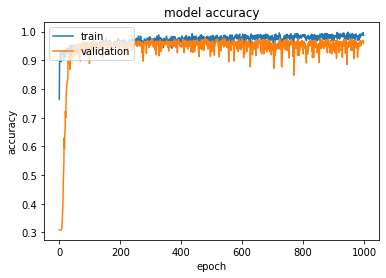

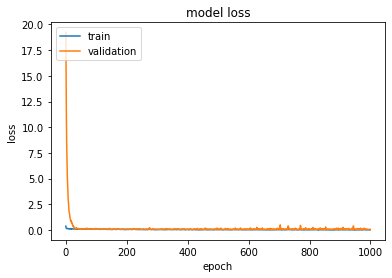

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Evaluación

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



In [45]:
p = test_preds1

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)

In [47]:
# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

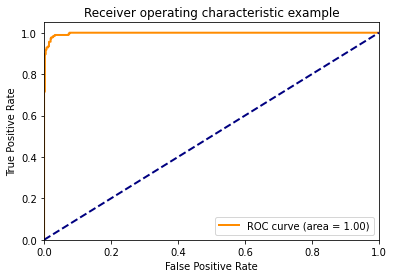

In [48]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

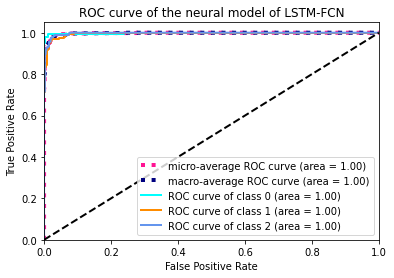

In [50]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(0,n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of the neural model of LSTM-FCN")
plt.legend(loc="lower right")
plt.show()


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)



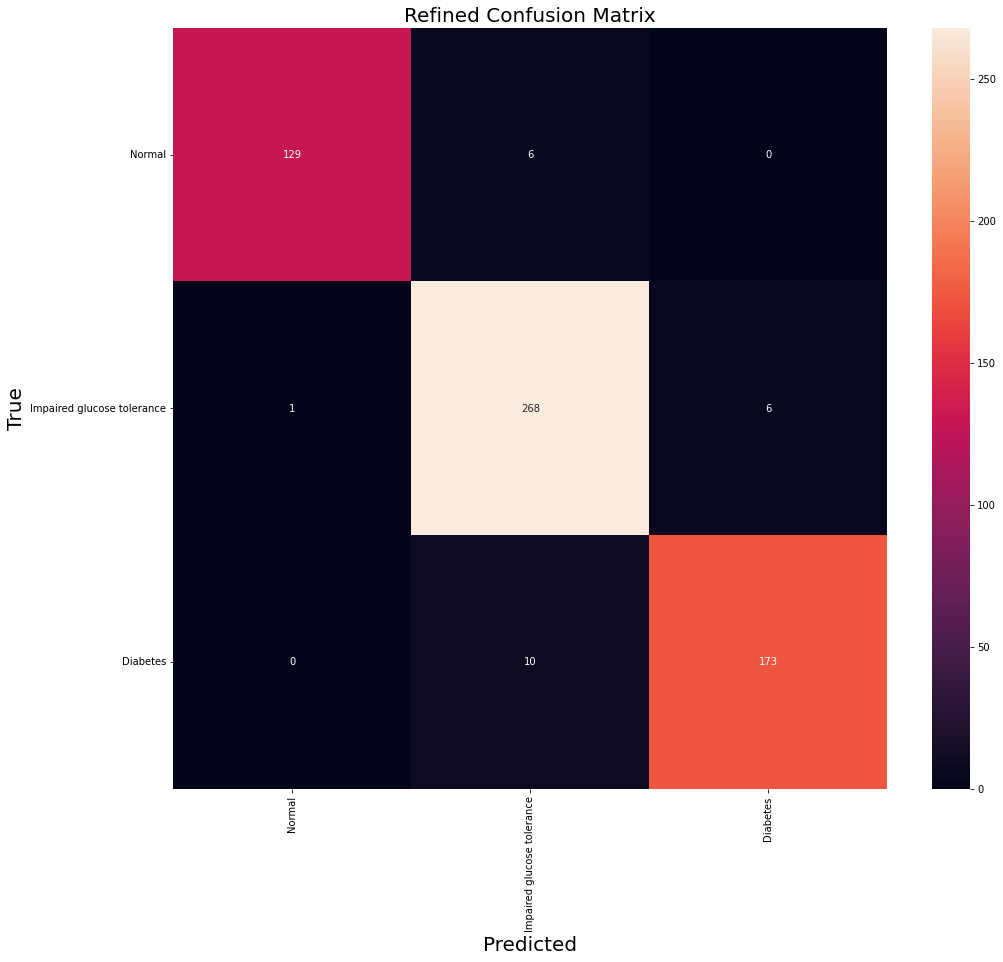

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
#labels = le.classes_
class_names = ['Normal','Impaired glucose tolerance','Diabetes']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [53]:
cm

array([[129,   6,   0],
       [  1, 268,   6],
       [  0,  10, 173]])

In [54]:
# Accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_true, y_pred )
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [55]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(y_true, y_pred, average=None)

In [56]:
print(ac,recall,precision,f1)

0.9612141652613828 [0.95555556 0.97454545 0.94535519] [0.99230769 0.94366197 0.96648045] [0.97358491 0.9588551  0.9558011 ]


#Test with real data

##healthy 0, glucose intolerance = 1, diabetes = 2

In [58]:
import numpy as np
import numpy as np
patient_test = np.array(([ 82., 155.,  141. , 103. ,  96. ,  89. ,  89. , 89. ,  89., 89. ],
                         [ 82.,   118.,  140. , 148., 147.,  146.,  146.,  146.,  146., 146. ],
                         [ 92. , 133.,  72. , 87., 92.,  92. , 92., 92., 92., 92.],
                         [ 157. , 185.,  232. , 216., 197.,  192. , 192., 192., 192., 192.],
                         [ 70, 70, 148, 148, 116, 97, 97, 97, 97, 97 ] ,
                         [ 79, 79, 157, 157, 116, 84, 84, 84, 84, 84 ],
                         [ 82, 82, 94, 94, 102, 102, 102, 102, 102, 102 ] ,
                         [ 95, 95, 180, 180, 155, 155, 140, 140, 140, 140 ],
                         [ 84, 84, 84, 84, 164, 164, 164, 164, 164, 164 ],
                         [ 73, 73, 99, 99, 82, 82, 82, 82, 82, 82 ] , 
                         [ 61, 61, 94, 94, 90, 90, 90, 90, 90, 90 ],
                         [ 100, 100, 100, 100, 149, 149, 149, 149, 149, 149 ],
                         [ 63, 63, 63, 63, 87, 87, 87, 87, 87, 87 ] ,
                         [ 75, 75, 75, 75, 91, 91, 91, 91, 91, 91 ], 
                         [ 117, 117, 145, 145, 98, 98, 98, 98, 98, 98 ],
                         [ 120, 120, 120, 120, 136, 136, 136,136, 136, 136 ]
                         ))
patient_test.shape

(16, 10)

In [59]:
patient_test = np.reshape(patient_test, (patient_test.shape[0], 1, patient_test.shape[1]))

In [60]:
predict = model.predict(patient_test)
print (predict)

1/1 [==============================] - 0s 71ms/step
[[9.9982244e-01 1.5573345e-04 2.1858516e-05]
 [3.8854414e-04 9.9961132e-01 8.4070479e-08]
 [7.8267527e-01 9.4810396e-02 1.2251429e-01]
 [0.0000000e+00 2.5898259e-13 1.0000000e+00]
 [5.4674281e-08 4.1335621e-08 9.9999988e-01]
 [9.3559338e-09 1.1602909e-14 1.0000000e+00]
 [9.9999988e-01 8.6329145e-08 2.0525499e-09]
 [1.2234305e-21 1.9695697e-06 9.9999797e-01]
 [2.3557181e-38 2.0303891e-18 1.0000000e+00]
 [1.0000000e+00 1.1775971e-13 9.7547740e-13]
 [1.0000000e+00 5.2529222e-12 2.5370821e-12]
 [4.9559353e-19 5.6380054e-06 9.9999440e-01]
 [1.0000000e+00 1.5812480e-10 9.8351216e-10]
 [1.0000000e+00 1.1181751e-08 1.2143689e-09]
 [1.0889969e-08 2.3300277e-02 9.7669971e-01]
 [1.6610484e-24 9.9999964e-01 3.1843459e-07]]


In [61]:
y_pred = np.argmax(predict, axis=-1)
y_pred 

array([0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1])

In [62]:
label = [0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [63]:

# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(label, y_pred, average=None)

In [64]:
print(ac,recall,precision,f1)

0.9612141652613828 [0.95555556 0.97454545 0.94535519] [0.99230769 0.94366197 0.96648045] [0.875 0.5   0.25 ]
